# Assessment 01 - Data Analysis

### Introduction | Methodology

### Introduction

Traffic collisions in urban environments are a significant public safety concern and present considerable challenges for emergency response services. In New York City, a metropolis with a complex and densely populated traffic network, the efficient allocation of emergency response resources is critical to minimizing the impact of these incidents. However, the unpredictable nature of traffic collisions, influenced by various factors, complicates this task.

Weather conditions have been hypothesized to substantially influence traffic collision rates (Becker, Rust and Ulbrich, 2022; Theofilatos and Yannis, 2014). Adverse weather can affect visibility, road surface conditions, and driver behaviour, potentially increasing the risk of collisions. Understanding the relationship between weather patterns and collision frequency is pivotal for strategic emergency response planning.

New York City's emergency services have recognized the need for a data-driven approach to predict the number of traffic collisions and optimize staffing and resource allocation. To this end, this case study aims to investigate the correlation between weather conditions—ranging from temperature, precipitation, and wind speed to visibility and fog—and daily traffic collision rates. By leveraging historical data, we seek to build a linear regression model and Deep Neural Network regression model that will serve as a benchmark for understanding the effects of weather on traffic collisions.

This model's outcomes will provide emergency services with actionable insights for proactive planning and contribute to the broader urban traffic safety research field. The predictive power of this model could not only optimize emergency staff deployment but also enhance public safety measures during adverse weather conditions, ultimately reducing the frequency and severity of traffic collisions in New York City.

This report will detail the data collection process, including the collation of extensive traffic and weather datasets, the methodology for model construction and evaluation, and the analysis of results.

[291 words]
---

### Methodology

  1. Data Collection and Storage:
> **BigQuery**: Utilize Google Cloud's BigQuery to access, query, and manage large datasets. Public datasets related to weather and traffic collisions can be found and queried within BigQuery. The necessary data will be extracted, including but not limited to weather conditions (temperature, precipitation, wind speed, visibility, fog) and traffic collision records.<br><br>**Data Export:** Export the queried data from BigQuery into a CSV file. This will be stored on a public [GitHub repository](https://github.com/LeeaDevine/12005304uhi_DataAnalytics).

2. Data Cleaning and Preprocessing:
>**R Kernel**: Load the data into R for cleaning and preprocessing. This may include handling missing values, correcting data types, filtering out outliers, and creating new features that may help in the predictive models.

3. Exploratory Data Analysis (EDA):
>**Visualization:** Use R to create visualizations to understand the data distribution and initial insights into the relationship between weather variables and collision numbers.<br><br>**Correlation Analysis**: Calculate correlation coefficients to identify any linear relationships between weather variables and the number of collisions.

4. Feature Engineering
> <strong>Creating New Variables:</strong> Derive new variables that have predictive power. For example, deriving the day of the week from dates for the traffic collision data might reveal weekly patterns.<br><br>
<strong>Variable Transformation:</strong> Apply logarithmic or square root transformations to continuous variables to deal with skewness or linear relationships.

5. Linear and DNN Model Preparation
>Build models that will be used for further investigation in the next assessment.


[247 words]

---

# Data Collection - Using BigQuery

Initial Traffic collision data is collated from these public datasets.

### Public Datasets

<ul>

<li>
<strong>NYC Collisions</strong> - [bigquery-public-data.new_york_mv_collisions]<br>

> This dataset includes details of Motor Vehicle Collisions in New York City provided by the Police Department (NYPD) from 2012 onwards.

> <strong>NOTE:</strong> the data collected ranges from 2012 to 2020
</li>

<li>
<strong>Weather Data</strong> - [bigquery-public-data.noaa_gsod]

> This public dataset was created by the National Oceanic and Atmospheric Administration (NOAA) and includes global data obtained from the USAF Climatology Center. This dataset covers GSOD data between 1929 and present (updated daily), collected from over 9000 stations.

> <strong>NOTE:</strong> the data collected is based only in New York ranging from 2012 to 2020.

</li>
</ul>

[100 words]

<hr>

### Querying BigData


The first query collected the necessary weather characteristics that would affect traffic collisions.

The public dataset contains columns [stn, wban] indicating the weather data's location. To analyze the weather data for the case study, we need to focus on New York. Therefore, we use stn='725060' and, in some cases, wban='14756' to retrieve all relevant weather data.

stn - Station number (WMO/DATSAV3 number) for the location

wban - WBAN number where applicable--this is the historical "Weather Bureau Air Force Navy" number - with WBAN being the acronym

~~~~sql
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
FROM `bigquery-public-data.noaa_gsod.gsod2012` WHERE stn='725060'
UNION ALL
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
FROM `bigquery-public-data.noaa_gsod.gsod2013` WHERE stn='725060'
UNION ALL
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
FROM `bigquery-public-data.noaa_gsod.gsod2014` WHERE stn='725060' AND wban='14756'
UNION ALL
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
FROM `bigquery-public-data.noaa_gsod.gsod2015` WHERE stn='725060'
UNION ALL
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
FROM `bigquery-public-data.noaa_gsod.gsod2016` WHERE stn='725060'
UNION ALL
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
FROM `bigquery-public-data.noaa_gsod.gsod2017` WHERE stn='725060'
UNION ALL
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
FROM `bigquery-public-data.noaa_gsod.gsod2018` WHERE stn='725060'
UNION ALL
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
FROM `bigquery-public-data.noaa_gsod.gsod2019` WHERE stn='725060'
UNION ALL
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
FROM `bigquery-public-data.noaa_gsod.gsod2020` WHERE stn='725060'
ORDER BY year, mo, da
~~~~

~~~~sql
SELECT * FROM `uhi-project-414216.12005304_assessment.weather_2012_to_2020` LIMIT 1000
~~~~

Selecting year, mo, da variables within the public dataset here would allow the traffic collision dataset to be joined later as a reference.

This data will be used in conjunction with the data collected on traffic accidents in New York.

Query for Traffic Collisions:<br>
COUNT[timestamp] this can be then be renamed as NUM_COLLISIONS

~~~~sql
SELECT CAST(timestamp as DATE) as collision_date, COUNT(CAST(timestamp as DATE)) AS NUM_COLLISIONS
FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions`
GROUP BY collision_date
~~~~

To ensure accuracy, a separate query was used to extract the day variable.

~~~~sql
SELECT FORMAT_DATE("%u", collision_date) as day, collision_date, NUM_COLLISIONS
FROM `uhi-project-414216.12005304_assessment.collision_data_count`
~~~~

After extracting both datasets as views, they can be conjoined into a table for easy export as CSV and storage in a GitHub repository to serve as the initial analysis dataset.

~~~~sql
CREATE TABLE `uhi-project-414216.12005304_assessment.collated_collision_data`
AS SELECT day, year, mo, da, collision_date, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, NUM_COLLISIONS
FROM `uhi-project-414216.12005304_assessment.weather_2012_to_2020` as weather,
`uhi-project-414216.12005304_assessment.collision_data_count_final` as complaints
WHERE complaints.collision_date = weather.date;
~~~~

After considering analyzing specific traffic collision locations using longitude and latitude variables (found within NYC Collisions dataset), it was concluded that focusing on weather characteristics would be more critical for the case study. Although it could be used for more in-depth localization analysis.

<hr>

# Data Analysis [R] - Loading Data<br>

1. Load CSV File.
2. head(), str(), summary()

<hr>

[GitHub Repo Link:] https://github.com/LeeaDevine/12005304uhi_DataAnalytics

In [1]:
collision_data <- read.csv('https://raw.githubusercontent.com/LeeaDevine/12005304uhi_DataAnalytics/main/collated_collision_data-v1.csv')

In [2]:
head(collision_data)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust max min 
1 2   2018 1   2 2018-01-02     14.7  2.0 1024.9 10.0  12.9 20.0  31.1 18   5.0
2 1   2018 1   1 2018-01-01      9.5 -0.5 1022.2 10.0  15.0 18.1  25.1 21   5.0
3 5   2014 1  24 2014-01-24     14.8 -0.5 1022.4 10.0  11.8 15.9  22.9 23   9.0
4 3   2015 1   7 2015-01-07     22.6 10.2 1011.8  9.4  12.1 26.0  35.9 27  17.1
5 6   2018 1   6 2018-01-06     13.2 -0.2 1013.5 10.0  22.4 28.0  39.0 27  10.9
6 4   2015 1   8 2015-01-08     13.1 -2.4 1022.7  9.9  14.8 21.0  29.9 27   6.1
  prcp sndp  fog NUM_COLLISIONS
1 0    999.9 0   654           
2 0    999.9 0   453           
3 0    999.9 0   705           
4 0    999.9 0   538           
5 0    999.9 0   599           
6 0    999.9 0   573

head() function in R is used to display the first several rows of a data object, such as a data frame, matrix, or vector. By default, it shows the first six rows.

In [3]:
str(collision_data)

'data.frame':	3106 obs. of  18 variables:
 $ day           : int  2 1 5 3 6 4 3 4 1 2 ...
 $ year          : int  2018 2018 2014 2015 2018 2015 2014 2014 2017 2015 ...
 $ mo            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ da            : int  2 1 24 7 6 8 29 30 9 6 ...
 $ collision_date: chr  "2018-01-02" "2018-01-01" "2014-01-24" "2015-01-07" ...
 $ temp          : num  14.7 9.5 14.8 22.6 13.2 13.1 20.3 22 18.3 20.8 ...
 $ dewp          : num  2 -0.5 -0.5 10.2 -0.2 -2.4 10.4 5.8 5.7 5.2 ...
 $ slp           : num  1025 1022 1022 1012 1014 ...
 $ visib         : num  10 10 10 9.4 10 9.9 6.3 10 10 8.8 ...
 $ wdsp          : num  12.9 15 11.8 12.1 22.4 14.8 8.1 8.1 11 10.3 ...
 $ mxpsd         : num  20 18.1 15.9 26 28 21 14 15.9 18.1 21 ...
 $ gust          : num  31.1 25.1 22.9 35.9 39 ...
 $ max           : num  18 21 23 27 27 27 27 27 28 28 ...
 $ min           : num  5 5 9 17.1 10.9 6.1 17.1 12.9 15.1 19 ...
 $ prcp          : num  0 0 0 0 0 0 0.02 0.01 0 0 ...
 $ sndp          : num  

In [4]:
#Just to double check that str() - observations (rows), and variables (columns) are correctly counted.
nrow(collision_data) #rows
ncol(collision_data) #columns

[1] 3106

[1] 18

Str () function is used to display the structure of an R object. It provides a compact, human-readable summary of an object's type, length, content, and attributes.

[117 words]

# **Clarifications**: Column Names:

**Detailed Notes**<br>

This is a copy of each column variable's official BigQuery Public dataset descriptions, saved here to clarify the data being used for analysis.

<hr>

day - day of the week [Monday]=1, [Tuesday]=2, [Wednesday]=3 ... [Sunday]=7

year - the year

mo - month of the year

da - day of the year

collision_date - date [timestamp] (yyyy-mm-dd)

temp - Mean temperature for the day in degrees Fahrenheit to tenths. Missing = 9999.9

dewp - Mean dew point for the day in degreesm Fahrenheit to tenths. Missing = 9999.9

slp - Mean sea level pressure for the day in millibars to tenths. Missing = 9999.9

visib - Mean visibility for the day in miles to tenths. Missing = 999.9

wdsp - Mean wind speed for the day in knots to tenths. Missing = 999.9

mxpsd - Maximum sustained wind speed reported for the day in knots to tenths. Missing = 999.9

gust - Maximum wind gust reported for the day in knots to tenths. Missing = 999.9

max - Maximum temperature reported during the day in Fahrenheit to tenths--time of max temp report varies by country and region, so this will sometimes not be the max for the calendar day. Missing = 9999.9

min - Minimum temperature reported during the day in Fahrenheit to tenths--time of min temp report varies by country and region, so this will sometimes not be the min for the calendar day. Missing = 9999.9

prcp - Total precipitation (rain and/or melted snow) reported during the day in inches and hundredths; will usually not end with the midnight observation--i.e., may include latter part of previous day. .00 indicates no measurable precipitation (includes a trace). Missing = 99.99 Note: Many stations do not report '0' on days with no precipitation--therefore, '99.99' will often appear on these days. Also, for example, a station may only report a 6-hour amount for the period during which rain fell. See Flag field for source of data

sndp - Snow depth in inches to tenths--last report for the day if reported more than once. Missing = 999.9 Note: Most stations do not report '0' ondays with no snow on the ground--therefore, '999.9' will often appear on these days

fog - Indicators (1 = yes, 0 = no/not reported) for the occurrence during the day

<hr>

[380 words]


In [ ]:
summary(collision_data)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.999   Mean   :2016   Mean   : 6.699   Mean   :15.74  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2020   Max.   :12.000   Max.   :31.00  
 collision_date          temp            dewp               slp       
 Length:3106        Min.   : 5.80   Min.   :   -6.70   Min.   :  989  
 Class :character   1st Qu.:41.20   1st Qu.:   32.60   1st Qu.: 1012  
 Mode  :character   Median :52.50   Median :   45.70   Median : 1017  
                    Mean   :52.25   Mean   :   47.88   Mean   : 1023  
                    3rd Qu.:64.70   3rd Qu.:   59.10   3rd Qu.: 1022  
                    Max.   :86.70   Max.   : 9999.90   Max.   :10000  
     visib             wdsp           mxpsd     

# Quick Clean - DataType [collision_date]

In [5]:
summary(collision_data)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.999   Mean   :2016   Mean   : 6.699   Mean   :15.74  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2020   Max.   :12.000   Max.   :31.00  
 collision_date          temp            dewp               slp       
 Length:3106        Min.   : 5.80   Min.   :   -6.70   Min.   :  989  
 Class :character   1st Qu.:41.20   1st Qu.:   32.60   1st Qu.: 1012  
 Mode  :character   Median :52.50   Median :   45.70   Median : 1017  
                    Mean   :52.25   Mean   :   47.88   Mean   : 1023  
                    3rd Qu.:64.70   3rd Qu.:   59.10   3rd Qu.: 1022  
                    Max.   :86.70   Max.   : 9999.90   Max.   :10000  
     visib             wdsp           mxpsd     

In [6]:
# Set collision_date -> DATE class.
collision_data$collision_date <- as.Date(collision_data$collision_date)

In [7]:
# class() function - double check the change has taken place.
class(collision_data$collision_date)

[1] "Date"

In [8]:
# Checking the Datatype for collision_date
# Changed "char" to DATE
head(collision_data)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust max min 
1 2   2018 1   2 2018-01-02     14.7  2.0 1024.9 10.0  12.9 20.0  31.1 18   5.0
2 1   2018 1   1 2018-01-01      9.5 -0.5 1022.2 10.0  15.0 18.1  25.1 21   5.0
3 5   2014 1  24 2014-01-24     14.8 -0.5 1022.4 10.0  11.8 15.9  22.9 23   9.0
4 3   2015 1   7 2015-01-07     22.6 10.2 1011.8  9.4  12.1 26.0  35.9 27  17.1
5 6   2018 1   6 2018-01-06     13.2 -0.2 1013.5 10.0  22.4 28.0  39.0 27  10.9
6 4   2015 1   8 2015-01-08     13.1 -2.4 1022.7  9.9  14.8 21.0  29.9 27   6.1
  prcp sndp  fog NUM_COLLISIONS
1 0    999.9 0   654           
2 0    999.9 0   453           
3 0    999.9 0   705           
4 0    999.9 0   538           
5 0    999.9 0   599           
6 0    999.9 0   573

The reason to convert the collision_date into a DATE type is based on how easily you a manipulate the DATE type more than CHAR type.

In [9]:
summary(collision_data)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.999   Mean   :2016   Mean   : 6.699   Mean   :15.74  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2020   Max.   :12.000   Max.   :31.00  
 collision_date            temp            dewp               slp       
 Min.   :2012-07-01   Min.   : 5.80   Min.   :   -6.70   Min.   :  989  
 1st Qu.:2014-08-16   1st Qu.:41.20   1st Qu.:   32.60   1st Qu.: 1012  
 Median :2016-09-30   Median :52.50   Median :   45.70   Median : 1017  
 Mean   :2016-09-30   Mean   :52.25   Mean   :   47.88   Mean   : 1023  
 3rd Qu.:2018-11-15   3rd Qu.:64.70   3rd Qu.:   59.10   3rd Qu.: 1022  
 Max.   :2020-12-31   Max.   :86.70   Max.   : 9999.90   Max.   :10000  
     visib             wdsp       

# Summary - Overview

---

## **Observations**

---

### Basic Assumptions and Insights:

- Visibility and weather conditions like fog and snow could directly correlate with the number of collisions.

- Seasonal trends might be visible, with potentially more accidents in winter due to snow and reduced visibility or during rainy months.

---

### Missing Data:
There are placeholder values (such as 9999.9 and 999.9) in several weather-related columns (dewp, slp, mxpsd, gust, prcp, sndp), indicating missing data or human error. These values must be handled by removing the corresponding rows or imputing data based on a chosen strategy.

- dewp (dew points)
- slp (sea level pressure)
- mxspd (max wind speed)
- gust (wind gust)
- prcp (total precipitation)
- sndp (snow depth)

These variables mentioned have questionable results based on the max value, which might need further investigation. Which will be explored within plots to visualise the data and, from there, decide how to deal with the outliers.

---

### Related Variables
Temperature (temp) has max (max) and min (min) associated with it.

Wind Elements also exist in tangent, which include (wdsp, mxpsd, gust)

---

[190 words]

# Install Packages


In [10]:
# Package [tidverse] -  which includes ggplot2, dplyr, tidyr, and readr,
install.packages("tidyverse")
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(corrplot)
library(lattice)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded



# Plot Graphs [Version 01] - Explore Data

The reason for the initial exploration of the loaded dataset was to get a better grasp of the relationships between the variables.

## Number of Collisions

Overview look at NUM_COLLISIONS Variable

In [12]:
summary(collision_data$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   94.0   498.0   580.0   561.8   651.0  1161.0 

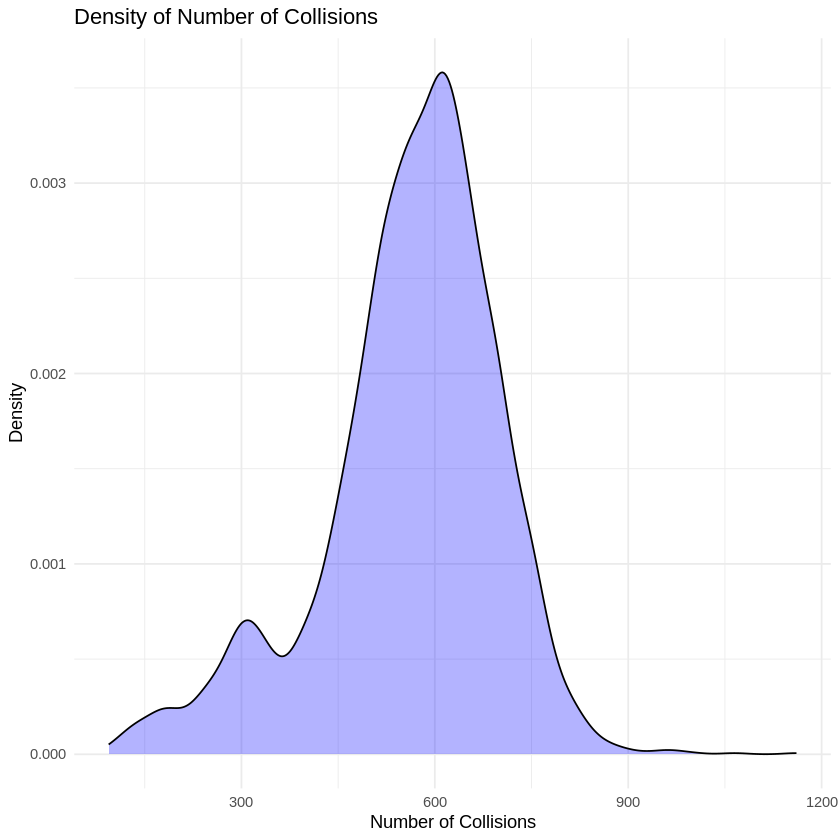

In [13]:
# ggplot2 -> density plot
# Overview for density of number of collisions
ggplot(collision_data, aes(x = NUM_COLLISIONS)) +
  geom_density(fill = "blue", alpha = 0.3) +
  labs(title = "Density of Number of Collisions", x = "Number of Collisions", y = "Density") +
  theme_minimal()

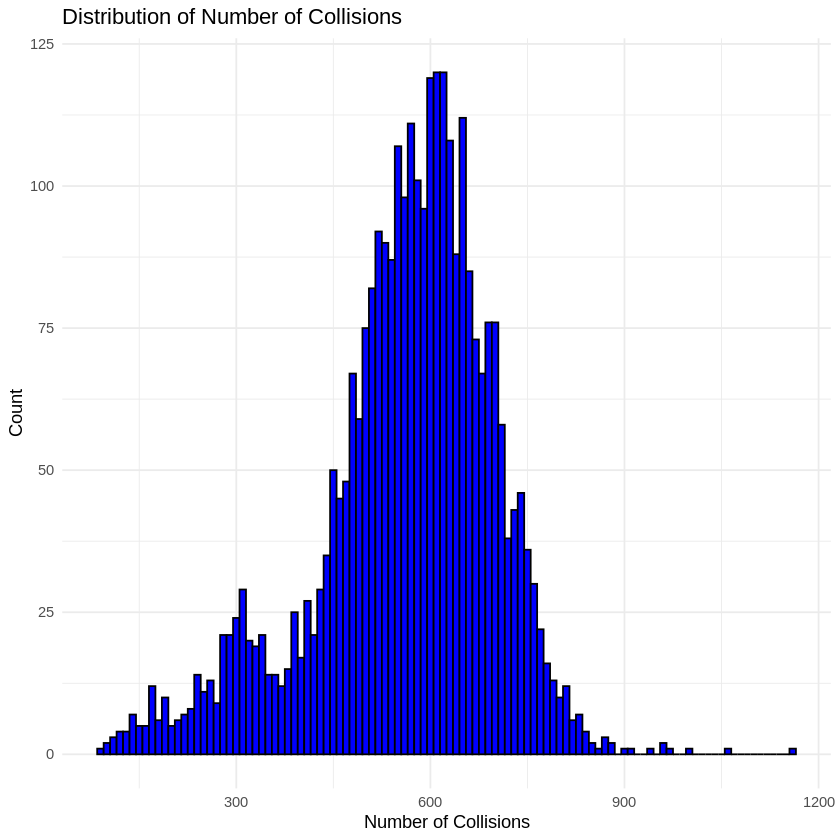

In [14]:
# histogram - visual density
ggplot(collision_data, aes(x = NUM_COLLISIONS)) +
  geom_histogram(binwidth = 10, fill = 'blue', color = 'black') +
  labs(title = "Distribution of Number of Collisions", x = "Number of Collisions", y = "Count") +
  theme_minimal()

Observations:

Average range of number of collisions is between 498 -> 651 [Highest density]

## Date Elements

### Day of the Week [day]

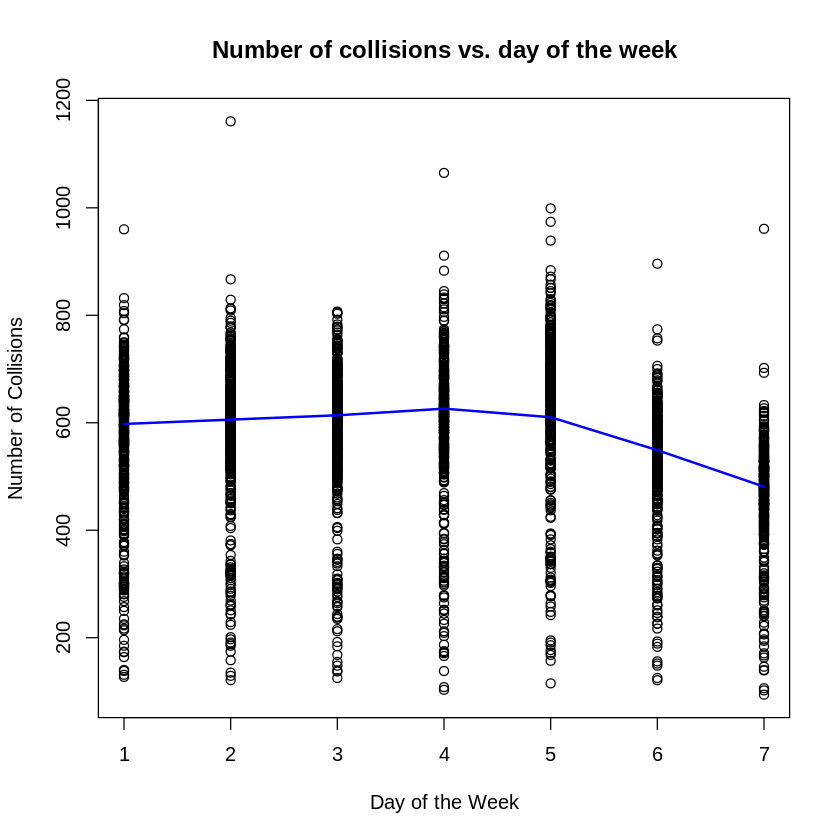

In [15]:
# Plot the data [day vs. NUM_COLLISIONS]
plot(collision_data$day, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. day of the week",
type = "p",
xlab="Day of the Week", ylab="Number of Collisions"
)

# Draw a line
lines(lowess(collision_data$day, collision_data$NUM_COLLISIONS), col = "blue", lwd = 2)

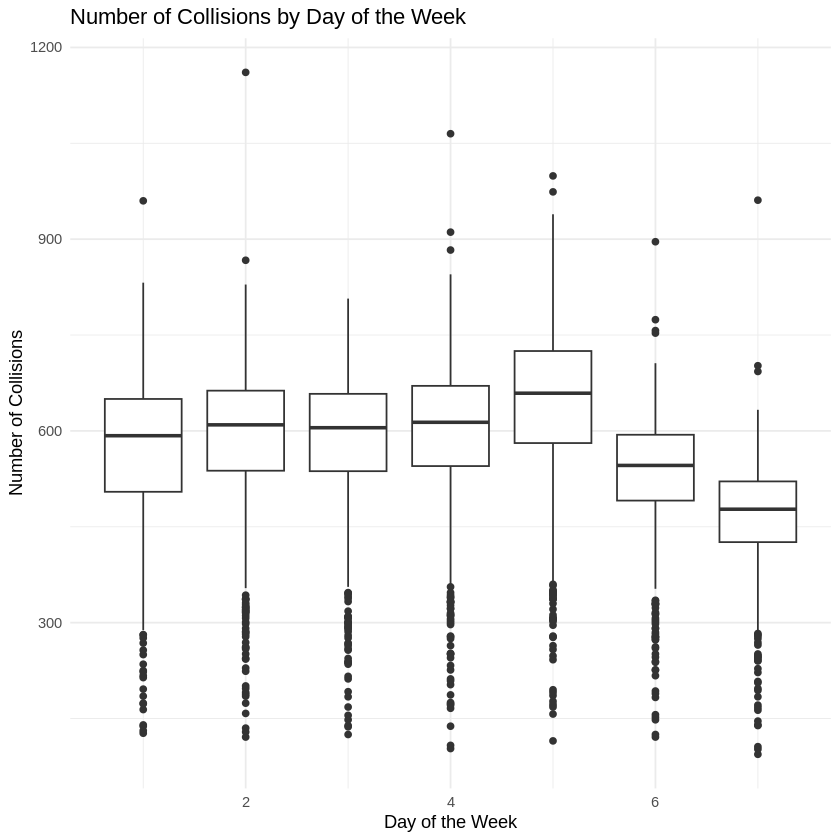

In [16]:
#ggplot boxplot - visual display - mean and median results
ggplot(collision_data, aes(x = day, y = NUM_COLLISIONS)) +
  geom_boxplot(aes(group = day)) +
  labs(title = "Number of Collisions by Day of the Week", x = "Day of the Week", y = "Number of Collisions") +
  theme_minimal()

**Observations:**

Weekdays have a higher average compared to the weekends.

Work days [rush hours] could be a leading factor. Either people are rushing to work or from work. It would be a reasonable assumption as Friday is the highest average, typically when the work week ends.


<hr>
<strong>Friday (5)</strong> seems to be the highest average<br>
<strong>Tuesday (2)</strong> had one highest Number of Collisions reported<br>
<strong>Sunday (7)</strong> had one lowest Number of Collisions reported<br>


In [17]:
cor(collision_data$day, collision_data$NUM_COLLISIONS)

[1] -0.1890949

NEGATIVE - Linear Progression [weak] -0.189 (-19%) Correlation

---

**Important Note:**

It appears that there is a negative linear trend. However, if the weekends (Saturday and Sunday) were to be shifted to the beginning of the week, it would be seen as a linear relationship. This observation can be explored further during the cleaning process.

### Year

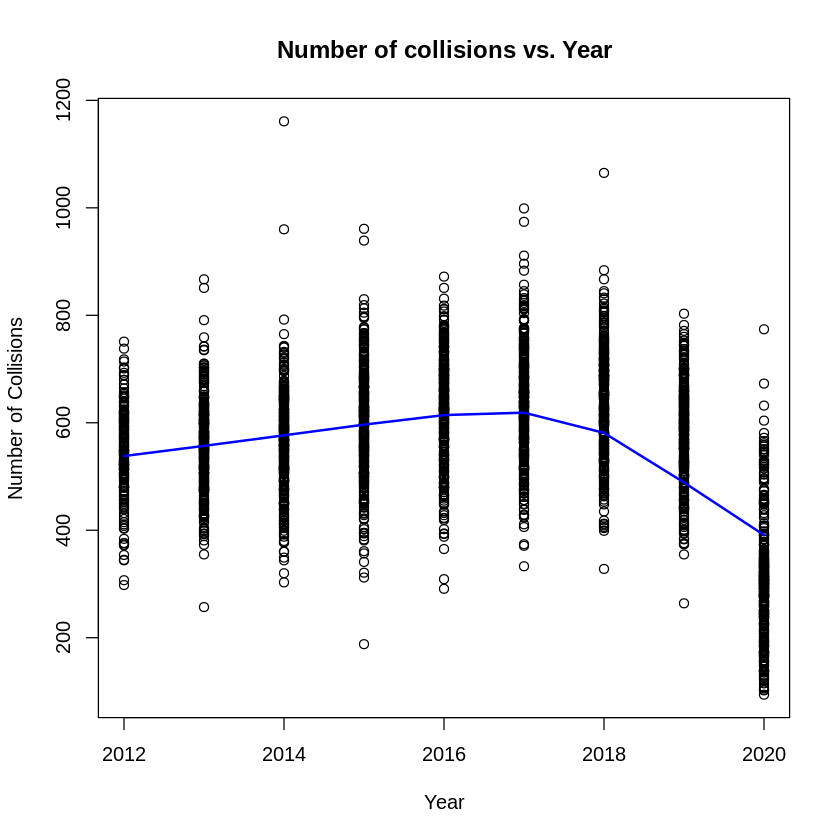

In [18]:
# Plot the data [year vs. NUM_COLLISIONS]
plot(collision_data$year, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Year",
type = "p",
xlab="Year", ylab="Number of Collisions"
)

# Draw a line
lines(lowess(collision_data$year, collision_data$NUM_COLLISIONS), col = "blue", lwd = 2)

In [19]:
sum(collision_data$year == 2012)
sum(collision_data$year == 2013)
sum(collision_data$year == 2014)
sum(collision_data$year == 2015)
sum(collision_data$year == 2016)
sum(collision_data$year == 2017)
sum(collision_data$year == 2018)
sum(collision_data$year == 2019)
sum(collision_data$year == 2020)

[1] 184

[1] 365

[1] 365

[1] 365

[1] 366

[1] 365

[1] 365

[1] 365

[1] 366

fewer records - 2012

In [20]:
# group years - subset and display results of each year
collisions_by_year <- collision_data %>%
  group_by(year) %>%
  summarise(total_collisions = sum(NUM_COLLISIONS))

collisions_by_year

year total_collisions
1 2012 100545          
2 2013 203742          
3 2014 206034          
4 2015 217694          
5 2016 229831          
6 2017 231007          
7 2018 231564          
8 2019 211486          
9 2020 112915

**Observations**

**Trend Line**: A blue trend line suggests the general pattern or trend in the number of collisions over the years. It shows that collisions peaked around 2016 and 2017 and decreased towards 2020.

**Outliers:** Some points stand well above the general cluster of data for some years, which might be considered outliers. These could represent particularly bad days for traffic collisions or errors in data recording.

(Liveris et al., 2021) states that COVID-19 officially hit on February 29th 2020. This would back up the massive drop in collisions recorded in 2020.

In [21]:
# Correlation function - year vs. number of collisions
cor(collision_data$year, collision_data$NUM_COLLISIONS)

[1] -0.2588776

### Month of the Calendar Year

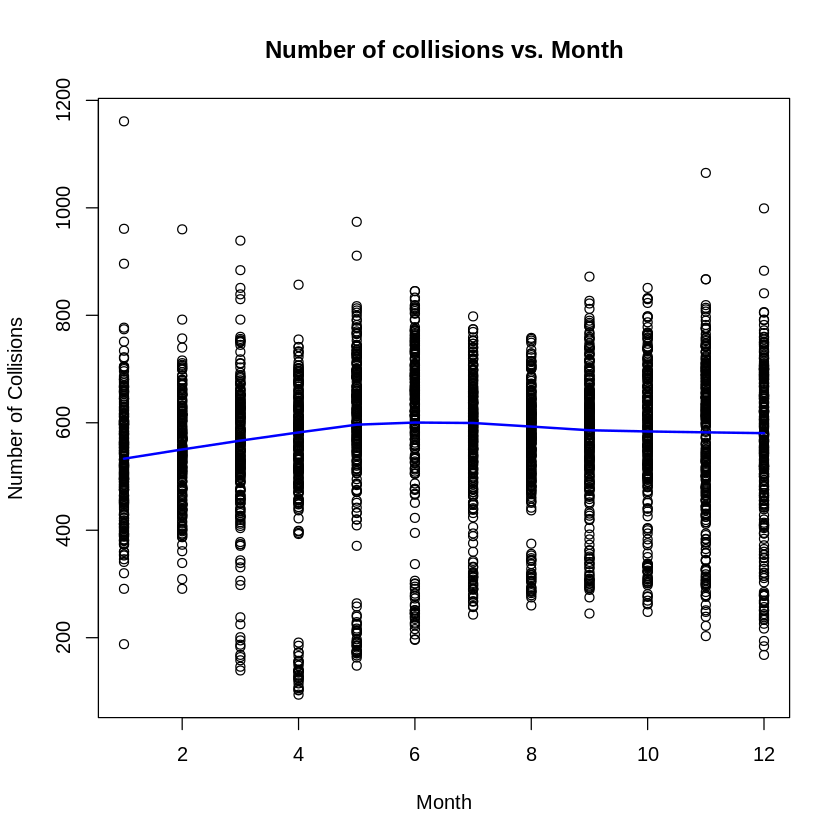

In [22]:
# Plot the data [Month vs. NUM_COLLISIONS]
plot(collision_data$mo, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Month",
type = "p",
xlab="Month", ylab="Number of Collisions"
)

# Draw a line
lines(lowess(collision_data$mo, collision_data$NUM_COLLISIONS), col = "blue", lwd = 2)

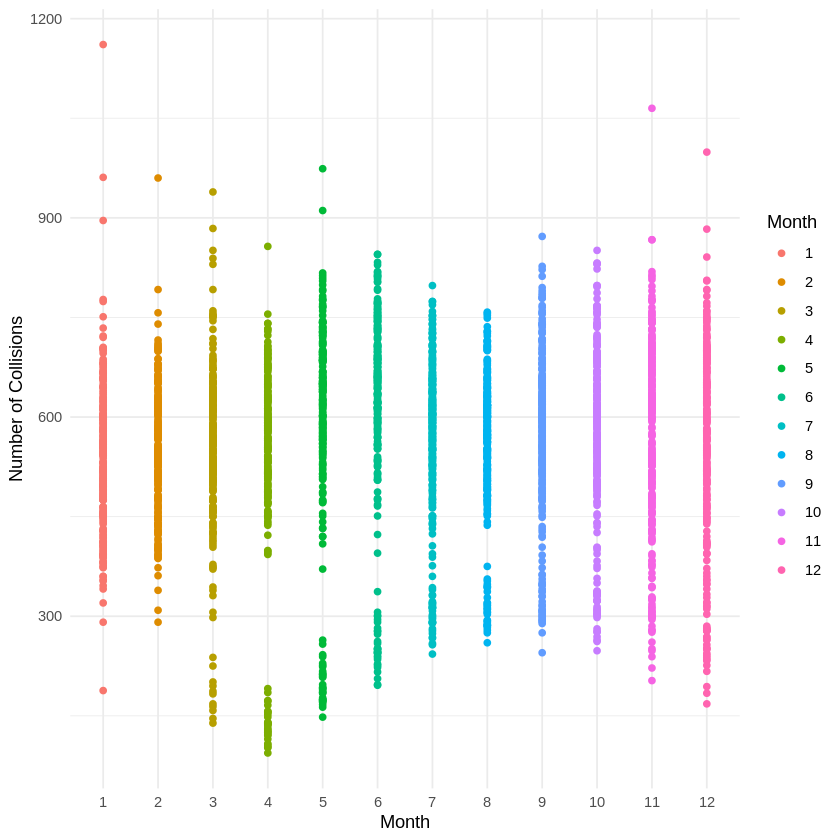

In [23]:
# coloured version - point graph
ggplot(collision_data, aes(x = factor(mo), y = NUM_COLLISIONS, colour = factor(mo))) +
  geom_point() +
  labs(x = "Month", y = "Number of Collisions", colour = "Month") +
  theme_minimal()

**Observations**

Line representation indicates more activity around May (5) and August (8). A slight bump around this period of the year reflects that summer vacations might be a factor, with more people travelling.

Higher variance is based around the winter months, which could correlate to lower temp levels being a factor to explore.

A few apparent outliers at the lower end of collisions are recorded between March (3) and August (8). This, again, would be the effect of COVID-19 mentioned in [YEAR] analysis previously.

In [24]:
# Correlation function - month vs. number of collisions
cor(collision_data$mo, collision_data$NUM_COLLISIONS)

[1] 0.05800395

POSITIVE - Linear Regression [WEAK] - 0.6 (6%) Correlation

### Day of the Calendar Year

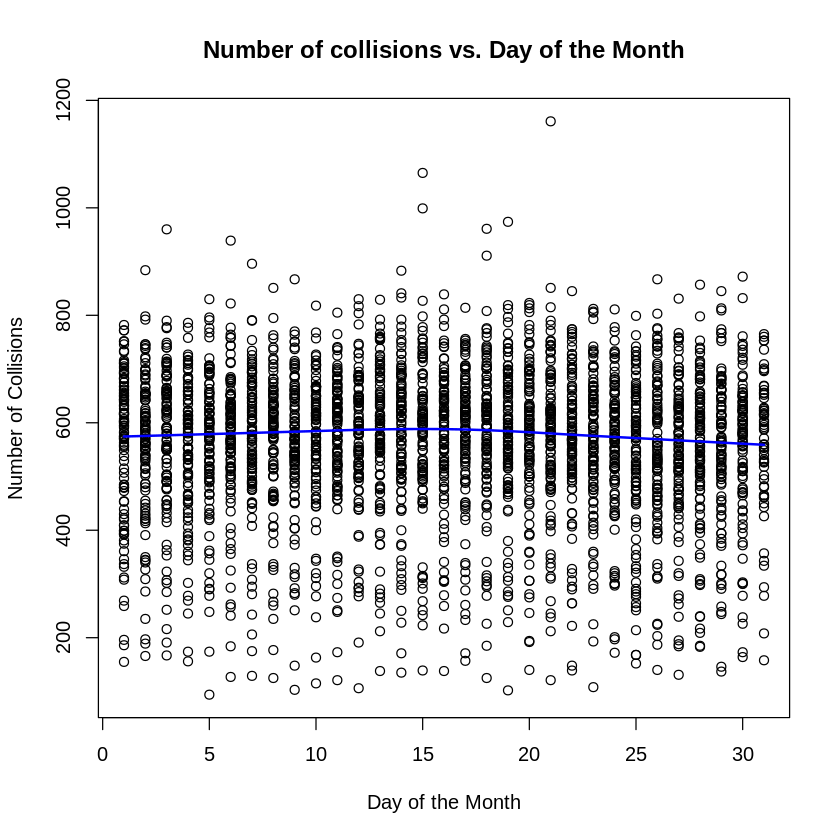

In [25]:
# Plot the data [Day of the Month vs. NUM_COLLISIONS]
plot(collision_data$da, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Day of the Month",
type = "p",
xlab="Day of the Month", ylab="Number of Collisions"
)

# Draw a line
lines(lowess(collision_data$da, collision_data$NUM_COLLISIONS), col = "blue", lwd = 2)

### Collision_Date

In [26]:
typeof(collision_data$collision_date)

[1] "double"

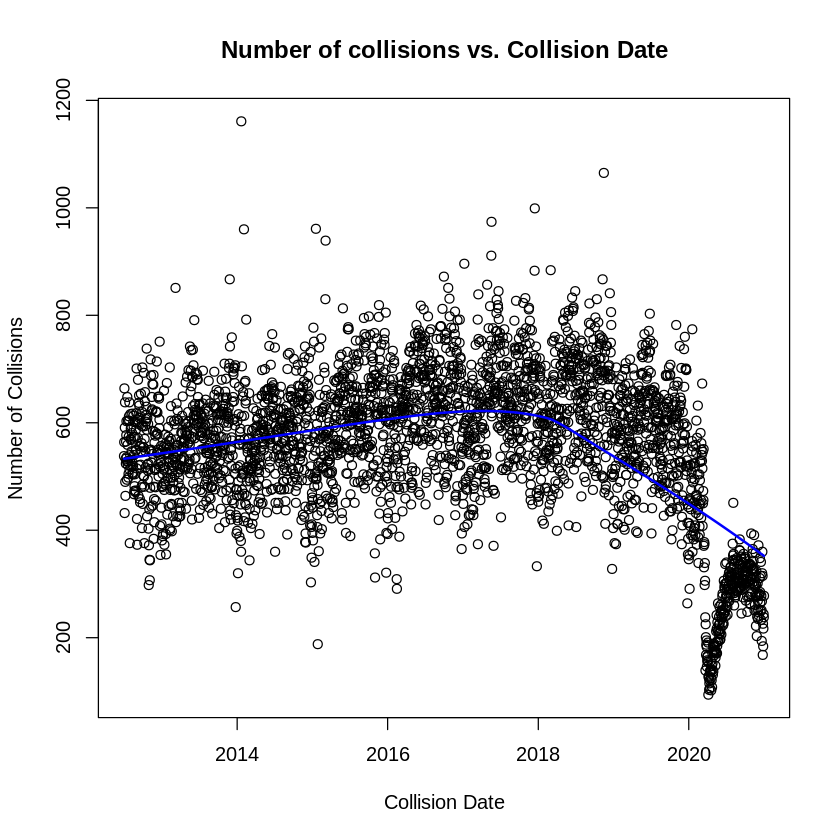

In [27]:
# Plot the data [DATE vs. NUM_COLLISIONS]
plot(collision_data$collision_date, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Collision Date",
type = "p",
xlab="Collision Date", ylab="Number of Collisions"
)

# Draw a line
lines(lowess(collision_data$collision_date, collision_data$NUM_COLLISIONS), col = "blue", lwd = 2)

**Observations**

The sudden drop in collisions in 2020 could affect the overall performance of a model. A reasonable solution would be to remove the year 2020 from the dataset, as it does not follow the same patterns as the previous years. This will be looked at in the cleaning process.



## Weather Variables

### Temperature [temp]

In [28]:
summary(collision_data$temp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.80   41.20   52.50   52.25   64.70   86.70 

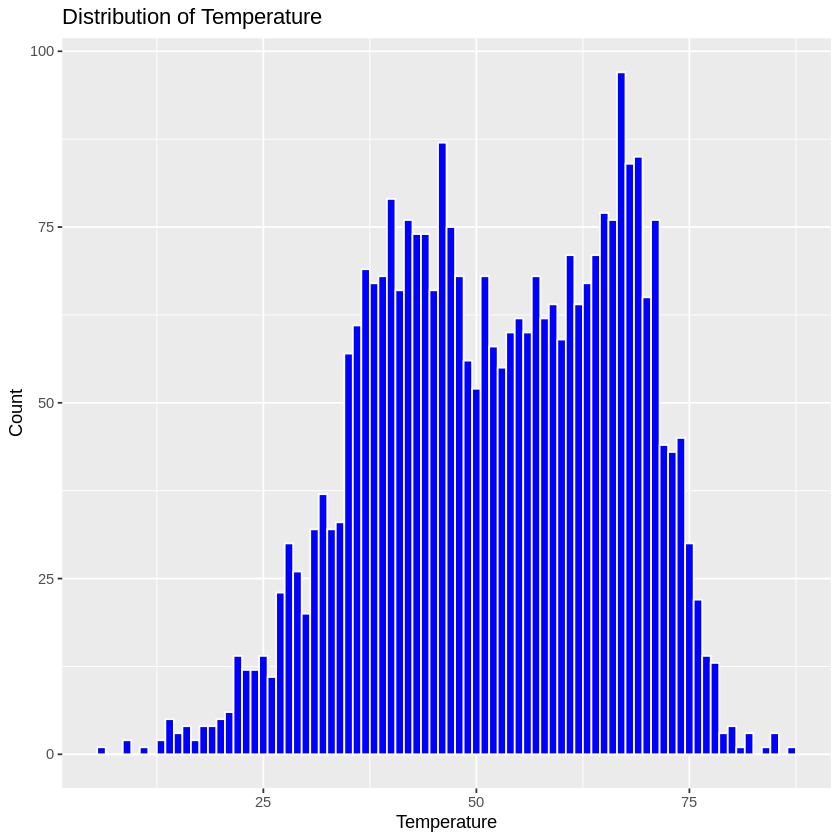

In [29]:
# Histogram visual - see the variance within temp variable
ggplot(collision_data, aes(x = temp)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "white") +
  labs(title = "Distribution of Temperature", x = "Temperature", y = "Count")

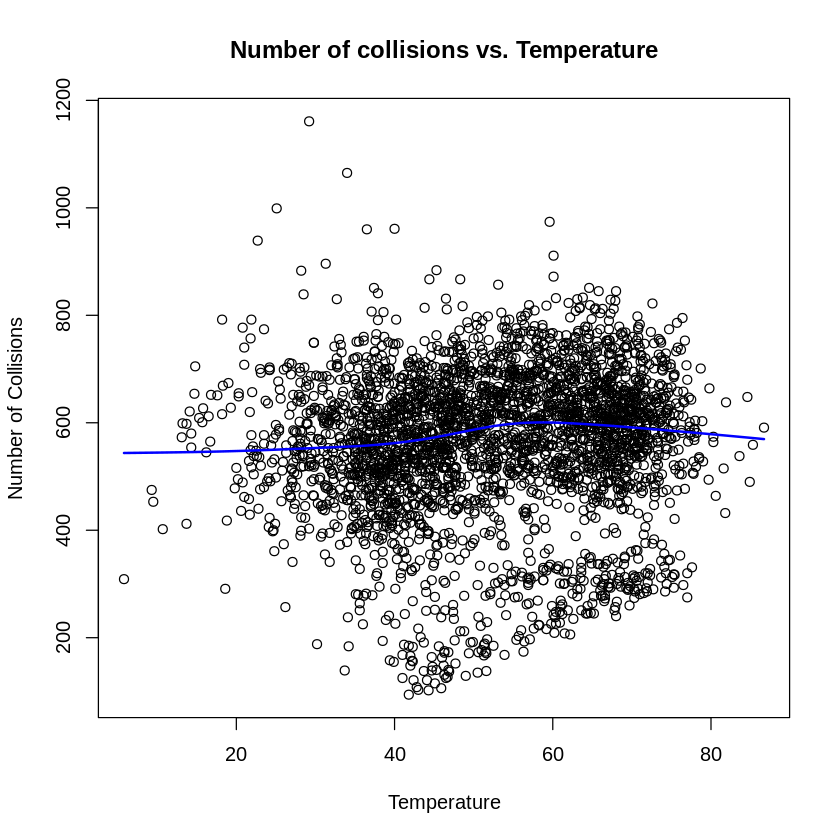

In [30]:
# Plot the data [temp vs. NUM_COLLISIONS]
plot(collision_data$temp, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Temperature",
type = "p",
xlab="Temperature", ylab="Number of Collisions"
)

lines(lowess(collision_data$temp, collision_data$NUM_COLLISIONS), col = "blue", lwd = 2)

In [31]:
cor(collision_data$temp, collision_data$NUM_COLLISIONS)

[1] 0.07496931

POSITIVE - Linear Regression [WEAK] - 0.0749 (7%) Correlation

**Observations**

Scatter Distribution: The data points are scattered throughout, suggesting a potential relationship between temperature and the number of collisions, but it does not appear to be strong or linear.

Trend Line: A blue trend line indicates a slight pattern or correlation. However, the trend line does not show an apparent increase or decrease; rather, it remains relatively flat across temperatures, with a slight increase in collisions at moderate temperatures.

### Dew Points [dewp]

In [32]:
summary(collision_data$dewp)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   -6.70    32.60    45.70    47.88    59.10  9999.90 

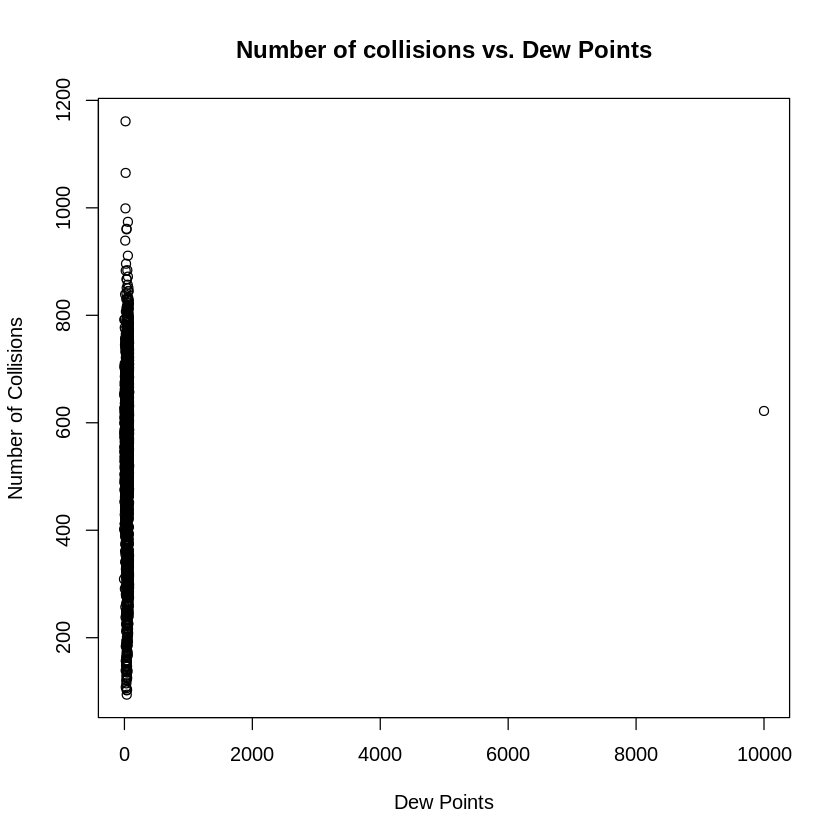

In [33]:
# Plot the data [dewp vs. NUM_COLLISIONS]
plot(collision_data$dewp, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Dew Points",
type = "p",
xlab="Dew Points", ylab="Number of Collisions"
)

In [34]:
cor(collision_data$dewp, collision_data$NUM_COLLISIONS)

[1] 0.01563553

POSITIVE - Linear Regression [WEAK] - 0.0156 (2%) Correlation

In [35]:
sum(collision_data$dewp == 9999.9)
sum(collision_data$dewp < 100)

[1] 1

[1] 3105

**Data Result** - shows a singular outlier [MISSING VALUE].

The limits can be determined by the 3rd Quarter (dewp) => 59.10
<br>

The placeholder for this metric is unreasonably large ("9999.9") compared to the values stored, where the range is between -10 and 100. Based on NOAA (US Department of Commerce, NOAA, National Weather Service, 2019) and the highest recorded dew point (Wikipedia Contributors, 2018). The value cannot exceed 100, as the highest recorded occurrence was 95 Fahrenheit.

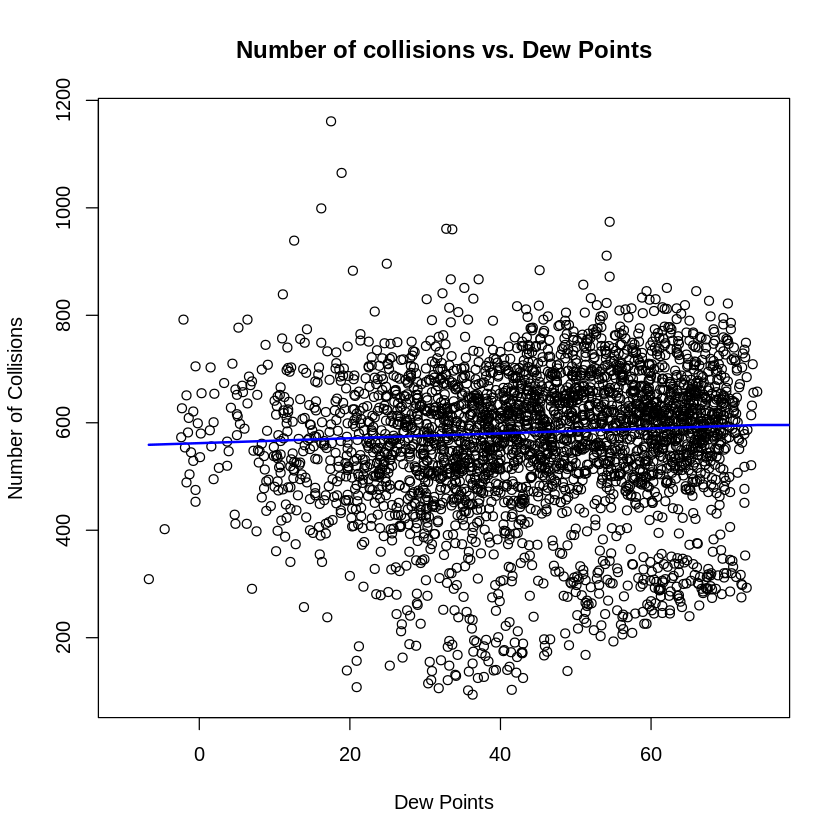

In [36]:
# Plot the data [dewp vs. NUM_COLLISIONS]
plot(collision_data$dewp, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Dew Points",
type = "p",
xlab="Dew Points", ylab="Number of Collisions",
xlim = c(-10, 75)
)

lines(lowess(collision_data$dewp, collision_data$NUM_COLLISIONS), col = "blue", lwd = 2)

### Sea Level Pressure [slp]

In [37]:
summary(collision_data$slp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    989    1012    1017    1023    1022   10000 

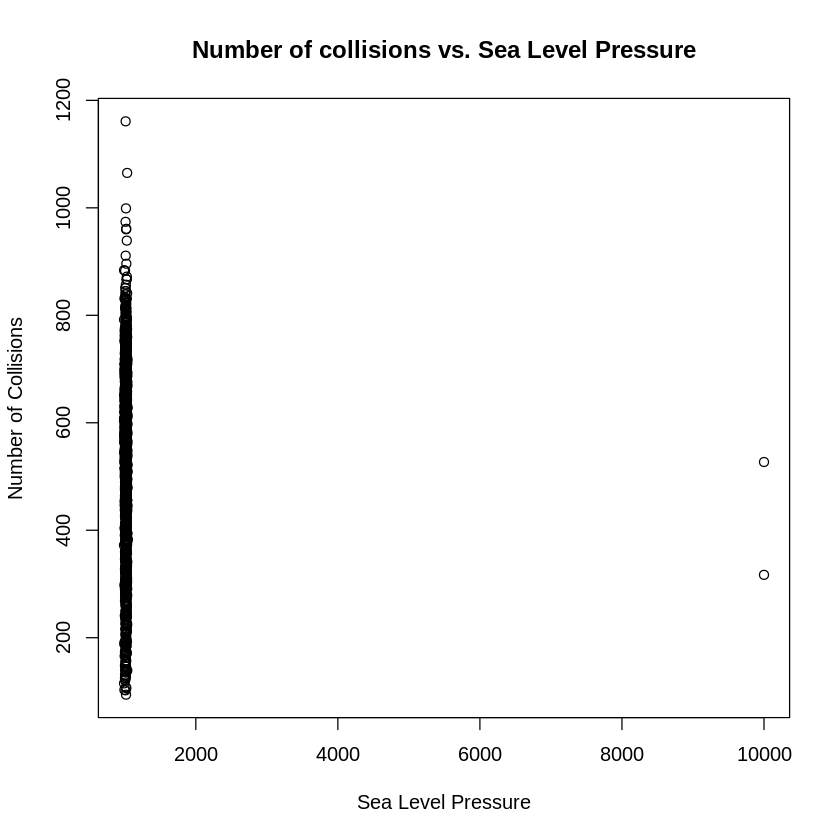

In [38]:
# Plot the data [slp vs. NUM_COLLISIONS]
plot(collision_data$slp, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Sea Level Pressure",
type = "p",
xlab="Sea Level Pressure", ylab="Number of Collisions",
)

In [39]:
# Checking the number of placeholders [missing values]
sum(collision_data$slp == 9999.9)
sum(collision_data$slp < 2000)

[1] 2

[1] 3104

Missing data = 2 records


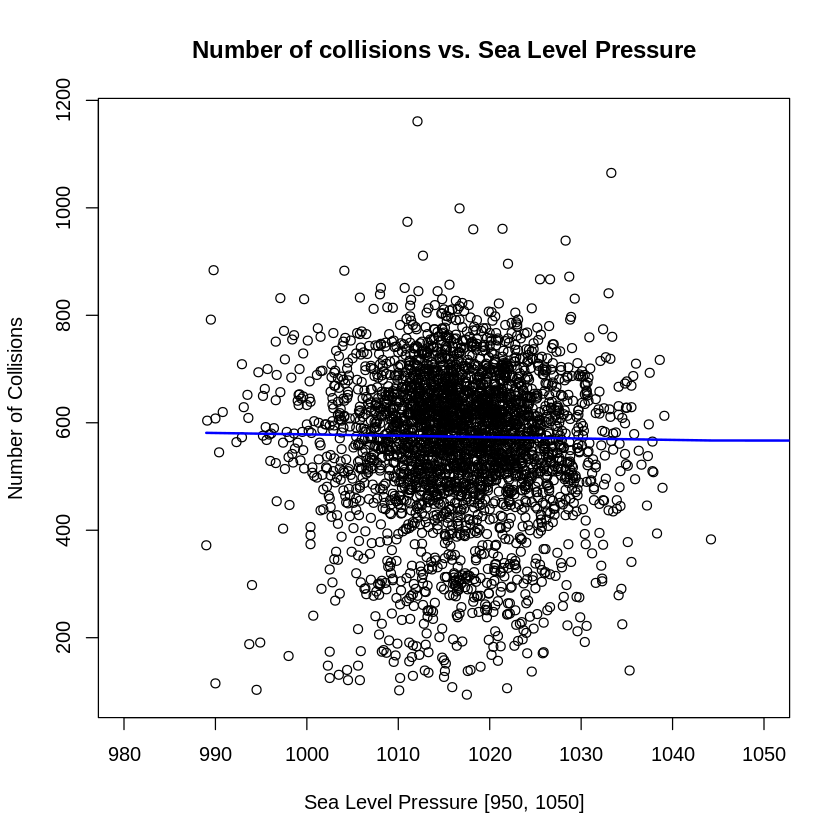

In [40]:
# Based on the missing data outliers we can reduce the limits to focus on the summary() results $slp<br>
# MIN : 989
# 3rd Quarter : 1022

# Plot the data [slp vs. NUM_COLLISIONS]
plot(collision_data$slp, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Sea Level Pressure",
type = "p",
#From this we can set an xlim = column(980, 1050)
xlab="Sea Level Pressure [950, 1050]", ylab="Number of Collisions",
xlim = c(980, 1050)
)

lines(lowess(collision_data$slp, collision_data$NUM_COLLISIONS), col = "blue", lwd = 2)

**Note:** Sea Level Pressure does not have vast variants (NOAA, 2023)<br>
Average being 1013.25

The placeholder for this metric is unreasonably large ("9999.9") compared to the values stored. This can be cleaned later.

In [41]:
cor(collision_data$slp, collision_data$NUM_COLLISIONS)

[1] -0.02639085

NEGATIVE - Linear Pregression [WEAK] - -0.026 (-3%) Correlation


### Visibility [visib]

In [43]:
summary(collision_data$visib)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.200   7.100   9.400   8.313  10.000  10.000 

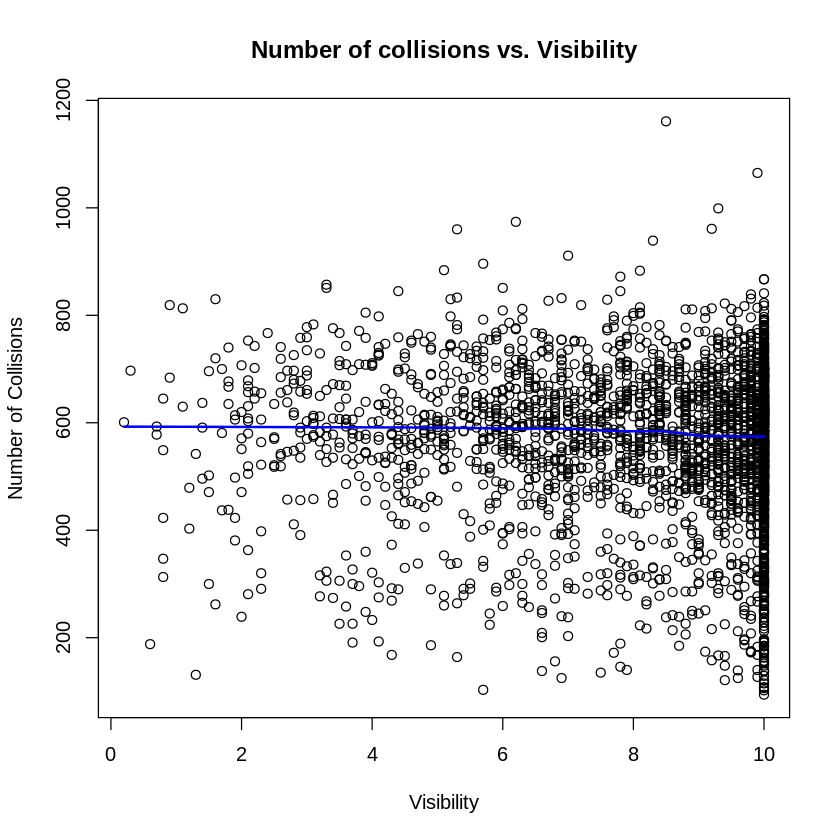

In [44]:
# Plot the data [Visibility vs. NUM_COLLISIONS]
plot(collision_data$visib, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Visibility",
type = "p",
xlab="Visibility", ylab="Number of Collisions",
)

lines(lowess(collision_data$visib, collision_data$NUM_COLLISIONS), col = "blue", lwd = 2)

In [45]:
cor(collision_data$visib, collision_data$NUM_COLLISIONS)

[1] -0.03990319

NEGATIVE - Linear Regression [WEAK] - -0.039 (-4%) Correlation

**Possible Relationship:**

The trend line seems to dip slightly as visibility increases, suggesting that there may be fewer collisions on days with higher visibility.

<hr>

**Trend Analysis:**

The overall trend shows that as visibility increases, collisions do not decrease significantly, as expected. This could suggest that factors other than visibility play a significant role in collisions or that visibility measurements are not precise indicators of driving conditions.

### Wind Speed [wdsp]

In [46]:
summary(collision_data$wdsp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.80    7.20    9.80   10.33   12.80   39.30 

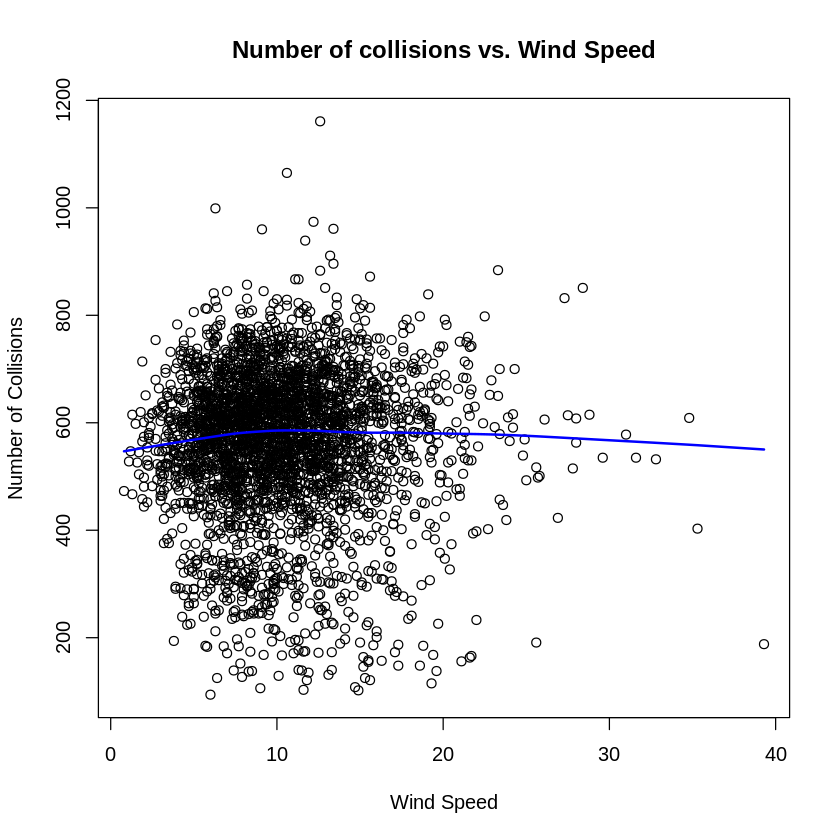

In [47]:
# Plot the data [Wind Speed vs. NUM_COLLISIONS]
plot(collision_data$wdsp, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Wind Speed",
type = "p",
xlab="Wind Speed", ylab="Number of Collisions",
)

lines(lowess(collision_data$wdsp, collision_data$NUM_COLLISIONS), col = "blue", lwd = 2)

In [48]:
cor(collision_data$wdsp, collision_data$NUM_COLLISIONS)

[1] -0.008040703

NEGATIVE - Linear Regression [WEAK] - -0.008 (-1%) Correlation<br>
<hr>

**Results** Very low correlation
- Means that Variation in Wind Speed does not correlate with the Number of Collisions
- High Density:
  - Wind Speed - (5, 15),
  - Number of Collisions - (400, 800)

### Maximum Sustained Wind Speed [mxspd]

In [49]:
summary(collision_data$mxpsd)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.10   13.00   15.90   18.07   20.00  999.90 

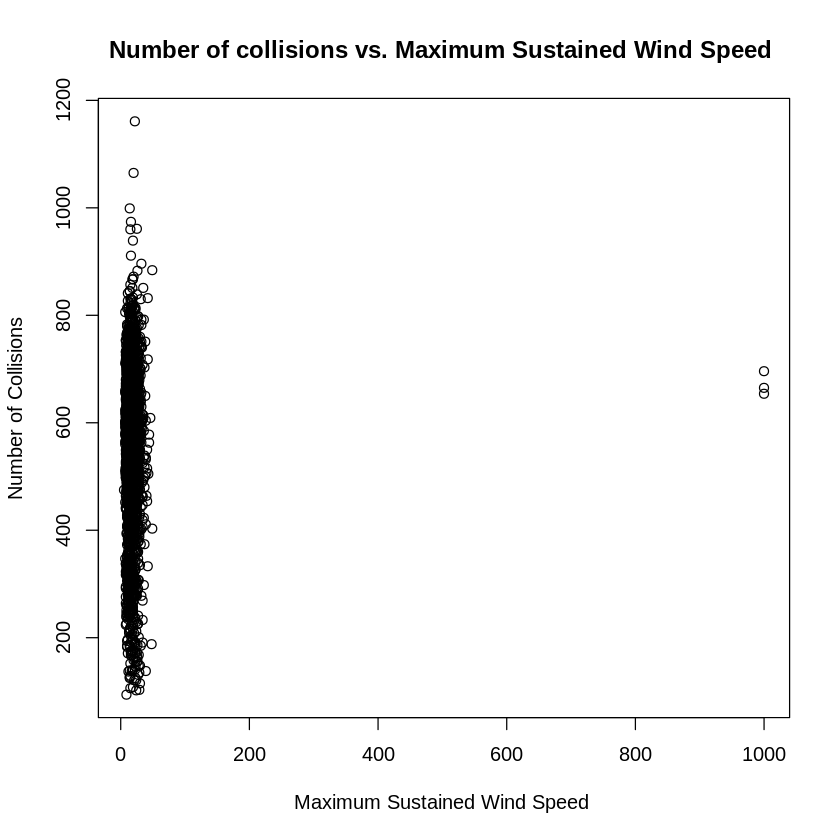

In [50]:
# Plot the data [Maximum Sustained Wind Speed vs. NUM_COLLISIONS]
plot(collision_data$mxpsd, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Maximum Sustained Wind Speed ",
type = "p",
xlab="Maximum Sustained Wind Speed ", ylab="Number of Collisions",
)

In [51]:
# Checking the number of placeholders [missing values]
sum(collision_data$mxpsd > 500)
sum(collision_data$mxpsd < 100)

[1] 3

[1] 3103

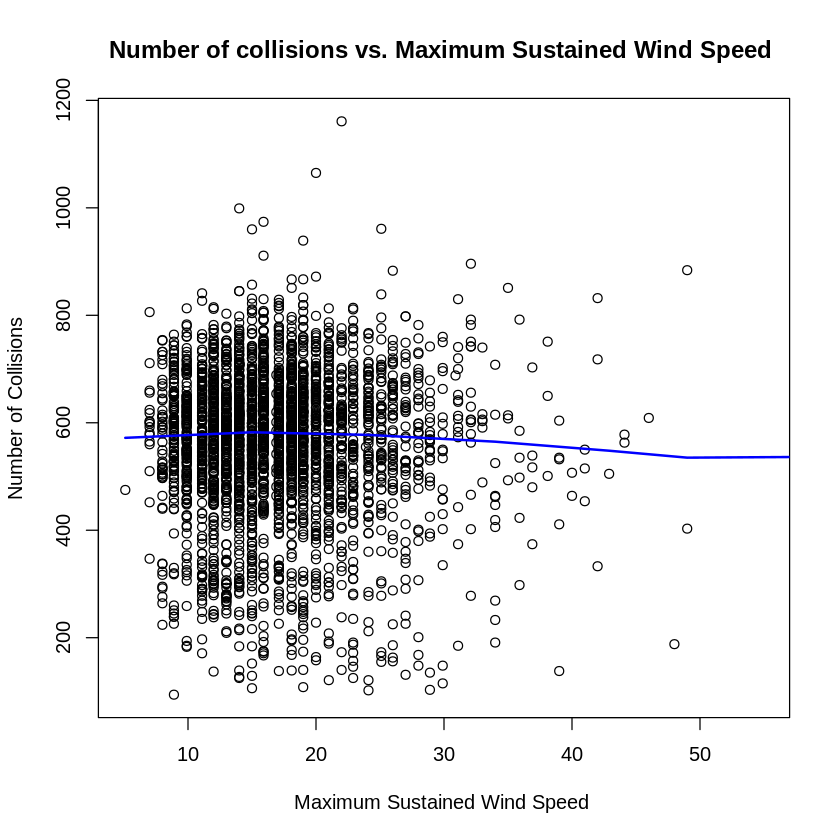

In [52]:
# Based on the missing data outliers
# we can reduce the limits to focus on the summary() results $mxpsd
#
# MIN : 5.10:
# 3rd Quarter : 20

# Plot the data [Maximum Sustained Wind Speed vs. NUM_COLLISIONS]
plot(collision_data$mxpsd, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Maximum Sustained Wind Speed ",
type = "p",
# From this we can set an xlim = column(5, 55/60) range
xlab="Maximum Sustained Wind Speed ", ylab="Number of Collisions",
xlim = c(5, 55)
)

lines(lowess(collision_data$mxpsd, collision_data$NUM_COLLISIONS), col = "blue", lwd = 2)

In [53]:
cor(collision_data$mxpsd, collision_data$NUM_COLLISIONS)

[1] 0.0210856

POSITIVE - Linear Regression [WEAK] - -0.021 (2%) Correlation<br>
<hr>

### Wind Gust [gust]

In [54]:
summary(collision_data$gust)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   14.0    24.1    32.1   383.4   999.9   999.9 

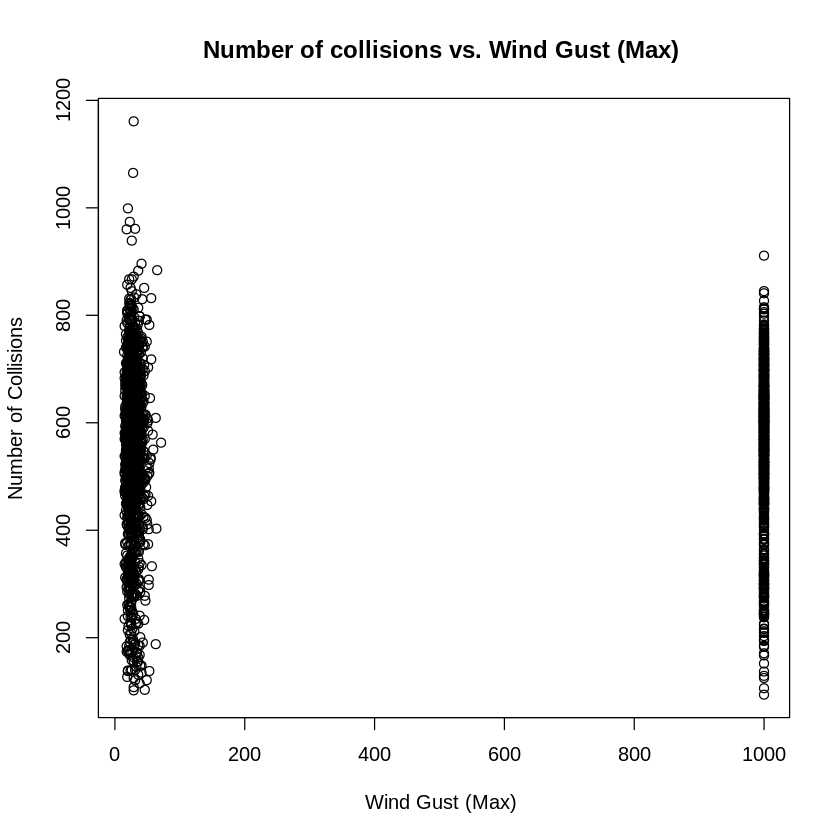

In [55]:
# Plot the data [Wind Gust (Max) vs. NUM_COLLISIONS]
plot(collision_data$gust, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Wind Gust (Max) ",
type = "p",
xlab="Wind Gust (Max) ", ylab="Number of Collisions",
)

In [56]:
# Checking the number of placeholders [missing values]
sum(collision_data$gust == 999.9)
sum(collision_data$gust < 100)

[1] 1137

[1] 1969

**Significant Proportion of Missing Data:**

The number of missing values constitutes a large portion of the dataset. With nearly 37% of the data missing (1137 out of 3106 total values).

<hr>

Imputation Consideration:

Given the substantial amount of missing data, imputation (replacing missing data with substituted values) might be considered. However, imputation should be approached with caution, as improper imputation can introduce its own biases, especially if the data is not missing at random.

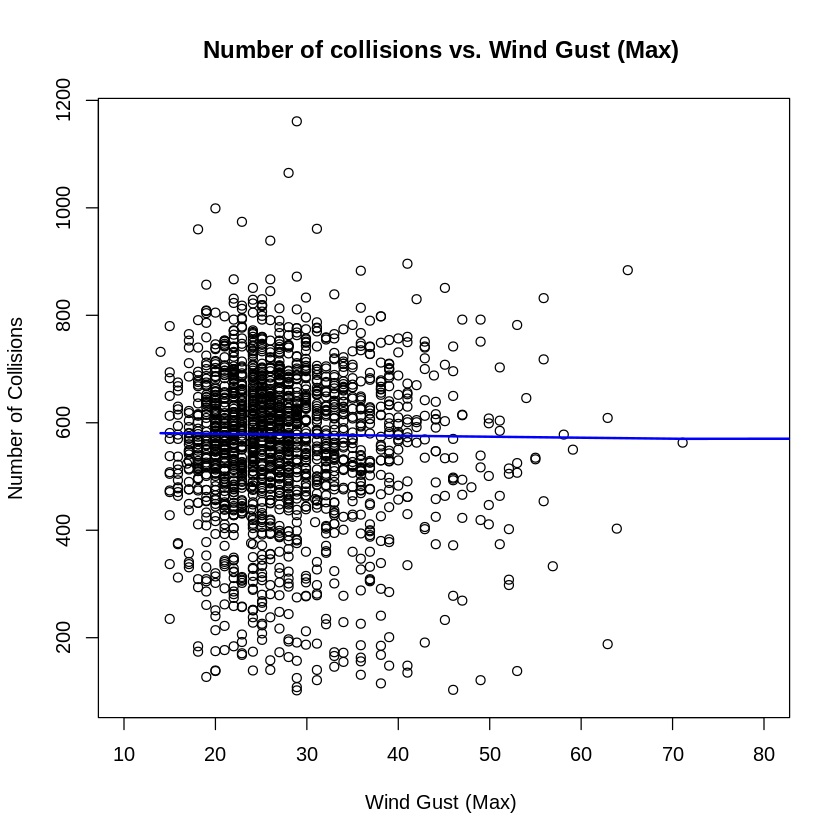

In [57]:
# Based on Missing Values = "999.9"
# We can focus the plot() on the lower numbers
# MIN : 14.0

# Plot the data [Wind Gust (Max) vs. NUM_COLLISIONS]
plot(collision_data$gust, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Wind Gust (Max) ",
type = "p",
xlab="Wind Gust (Max) ", ylab="Number of Collisions",
xlim = c(10, 80)
)

lines(lowess(collision_data$gust, collision_data$NUM_COLLISIONS), col = "blue", lwd = 2)

In [58]:
cor(collision_data$gust, collision_data$NUM_COLLISIONS)

[1] 0.003728972

POSITIVE - Linear Regression [WEAK] - -0.0037 (0.4%) Correlation<br>
<hr>

### Maximum temperature [max]

In [59]:
summary(collision_data$max)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   48.90   60.80   60.27   73.00  100.00 

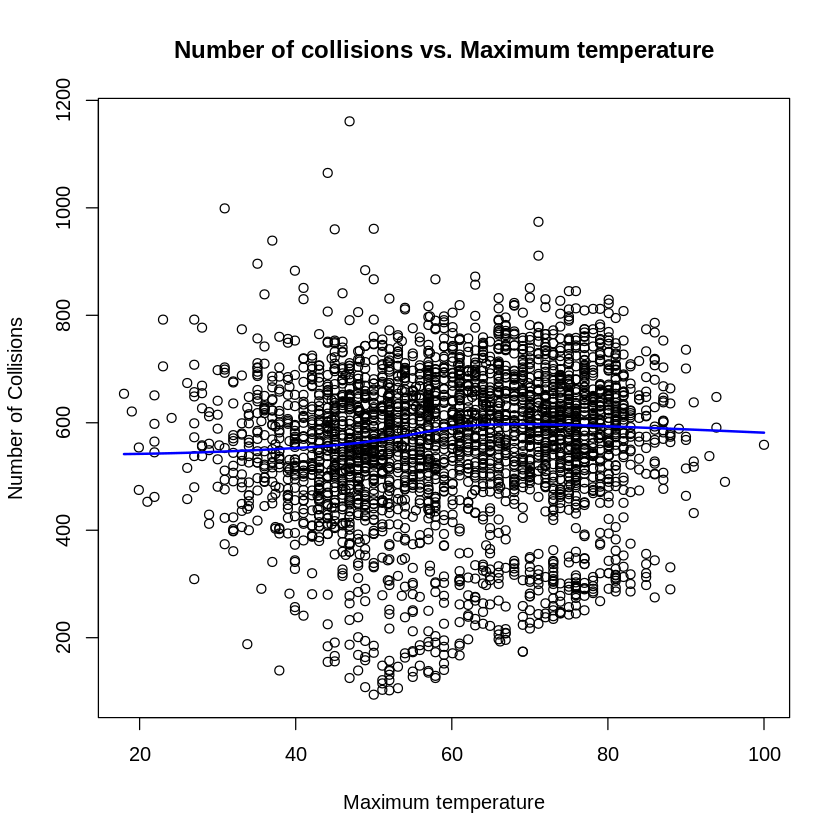

In [60]:
# Plot the data [Maximum temperature vs. NUM_COLLISIONS]
plot(collision_data$max, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Maximum temperature",
type = "p",
xlab="Maximum temperature", ylab="Number of Collisions",
)

lines(lowess(collision_data$max, collision_data$NUM_COLLISIONS), col = "blue", lwd = 2)

In [61]:
cor(collision_data$max, collision_data$NUM_COLLISIONS)

[1] 0.08157732

POSITIVE - Linear Regression [WEAK] - (0.081) 8% Correlation

### Minimum temperature [min]

In [62]:
summary(collision_data$min)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   -2.0    33.1    45.0    44.6    57.0    73.0 

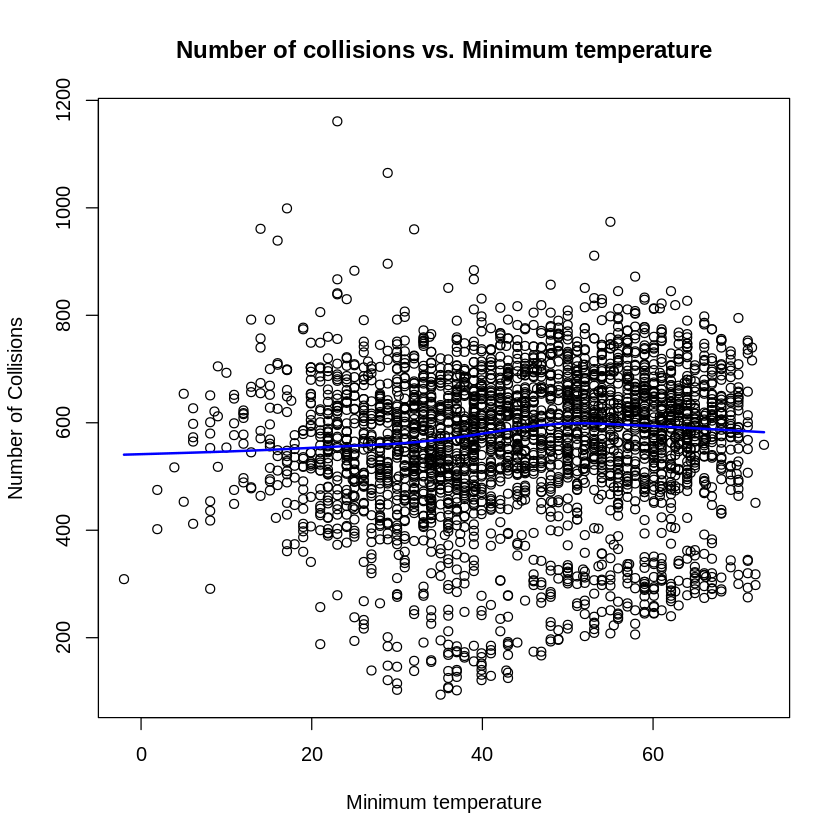

In [63]:
# Plot the data [Minimum temperature vs. NUM_COLLISIONS]
plot(collision_data$min, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Minimum temperature",
type = "p",
xlab="Minimum temperature", ylab="Number of Collisions",
)

lines(lowess(collision_data$min, collision_data$NUM_COLLISIONS), col = "blue", lwd = 2)

In [64]:
cor(collision_data$min, collision_data$NUM_COLLISIONS)

[1] 0.06899076

POSITIVE - Linear Regression [WEAK] - (0.068) 7% Correlation

### Total precipitation [prcp]

In [65]:
summary(collision_data$prcp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   0.893   0.060  99.990 

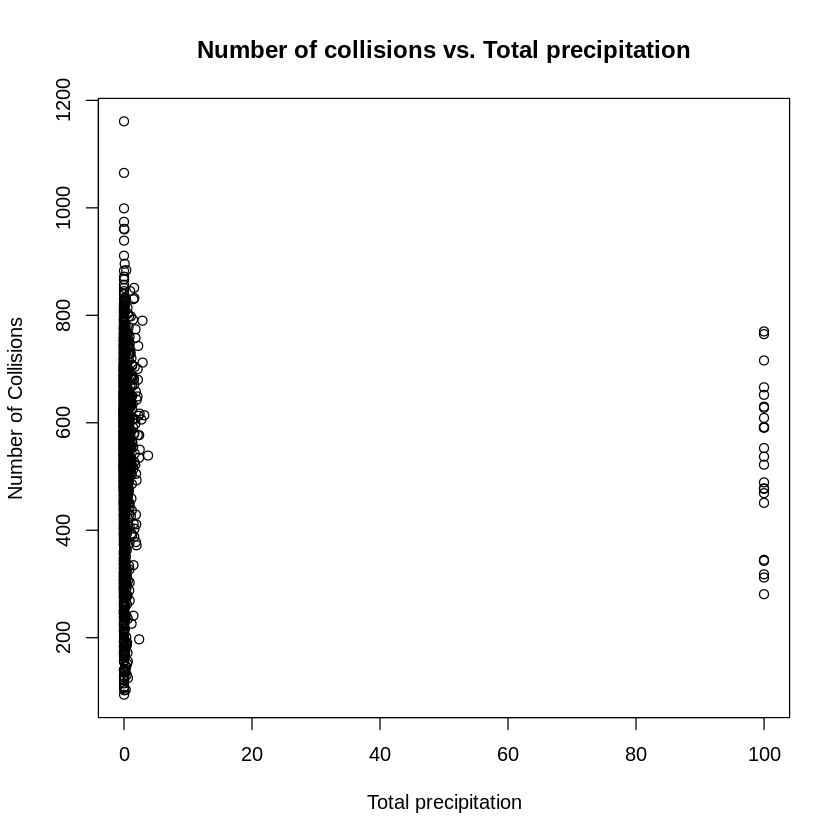

In [66]:
# Plot the data [Total precipitation vs. NUM_COLLISIONS]
plot(collision_data$prcp, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Total precipitation",
type = "p",
xlab="Total precipitation", ylab="Number of Collisions",
)

In [67]:
cor(collision_data$prcp, collision_data$NUM_COLLISIONS)

[1] -0.01812402

In [277]:
# Checking the number of placeholders [missing values]
sum(collision_data$prcp > 50)
sum(collision_data$prcp < 50)

[1] 24

[1] 3082

The number of missing values is 24 records.

Meaning PRCP can be cleaned - it could be reasonable to set these missing values to 0 as the other values in the dataset are close to 0.

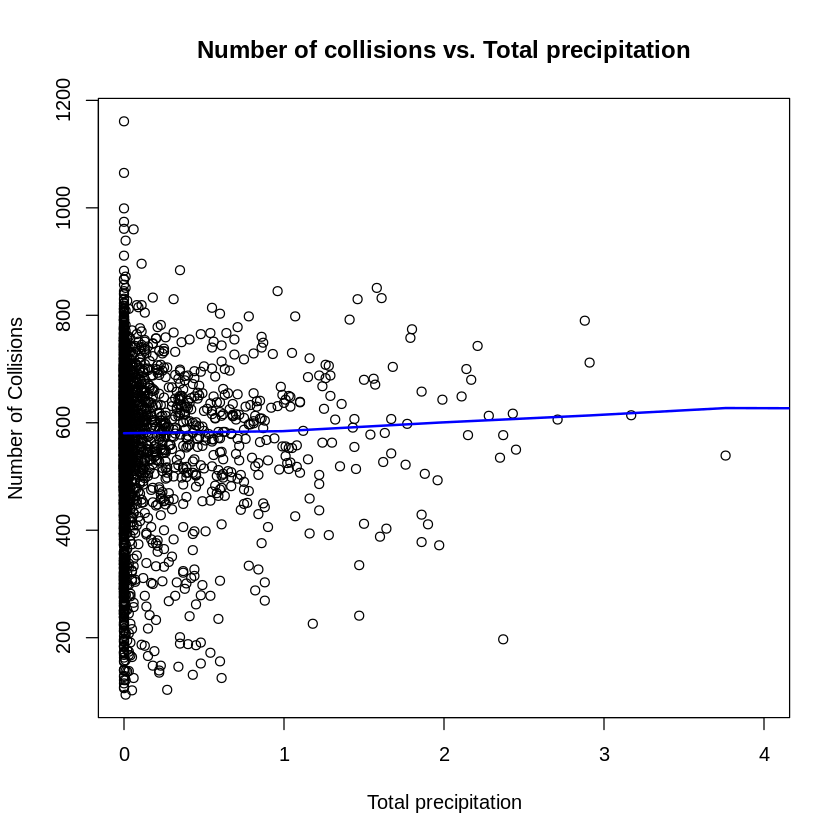

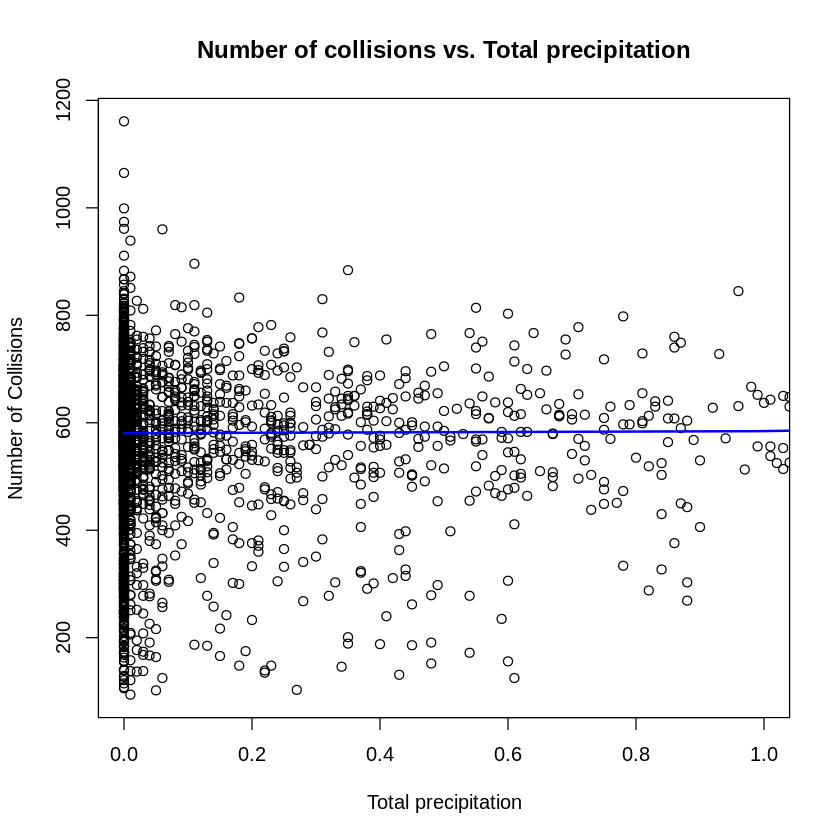

In [69]:
# Plot the data [Total precipitation vs. NUM_COLLISIONS]
plot(collision_data$prcp, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Total precipitation",
type = "p",
xlab="Total precipitation", ylab="Number of Collisions",
xlim = c(0, 4)
)

lines(lowess(collision_data$prcp, collision_data$NUM_COLLISIONS), col = "blue", lwd = 2)

# Plot the data [Total precipitation vs. NUM_COLLISIONS]
plot(collision_data$prcp, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Total precipitation",
type = "p",
xlab="Total precipitation", ylab="Number of Collisions",
xlim = c(0, 1)
)

lines(lowess(collision_data$prcp, collision_data$NUM_COLLISIONS), col = "blue", lwd = 2)

**Observations:**

**Data Density:**

A dense vertical band of points at the zero precipitation mark is consistent with the summary statistics showing that the median and the first two quartiles are 0. This suggests that there are many days with no precipitation recorded and potentially no strong correlation between precipitation and the number of collisions.

### Snow depth [sndp]

In [70]:
summary(collision_data$sndp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.9   999.9   999.9   999.6   999.9   999.9 

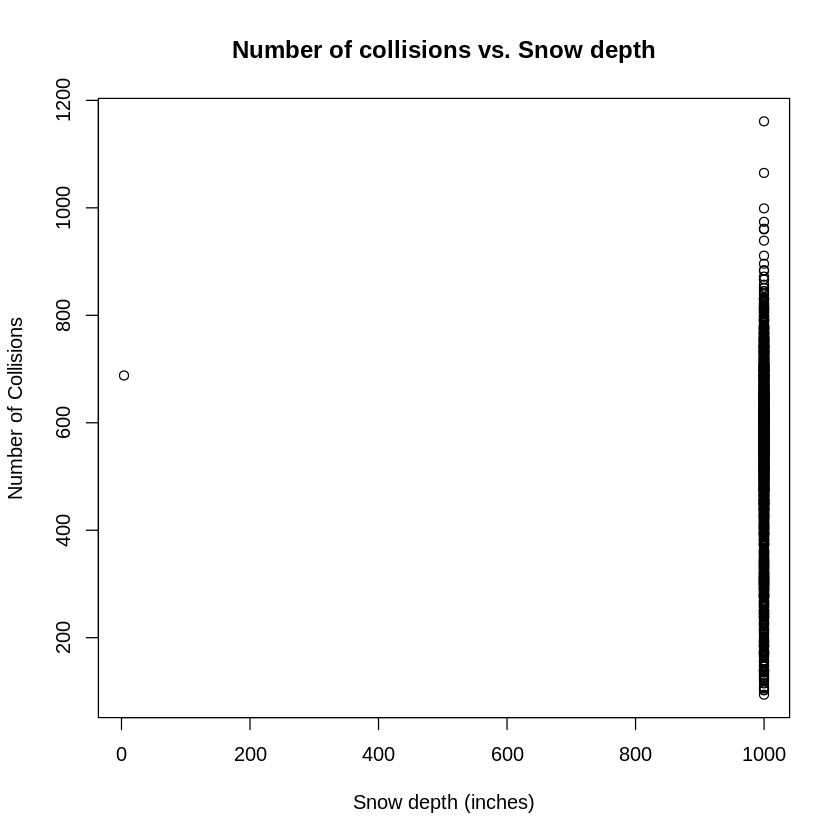

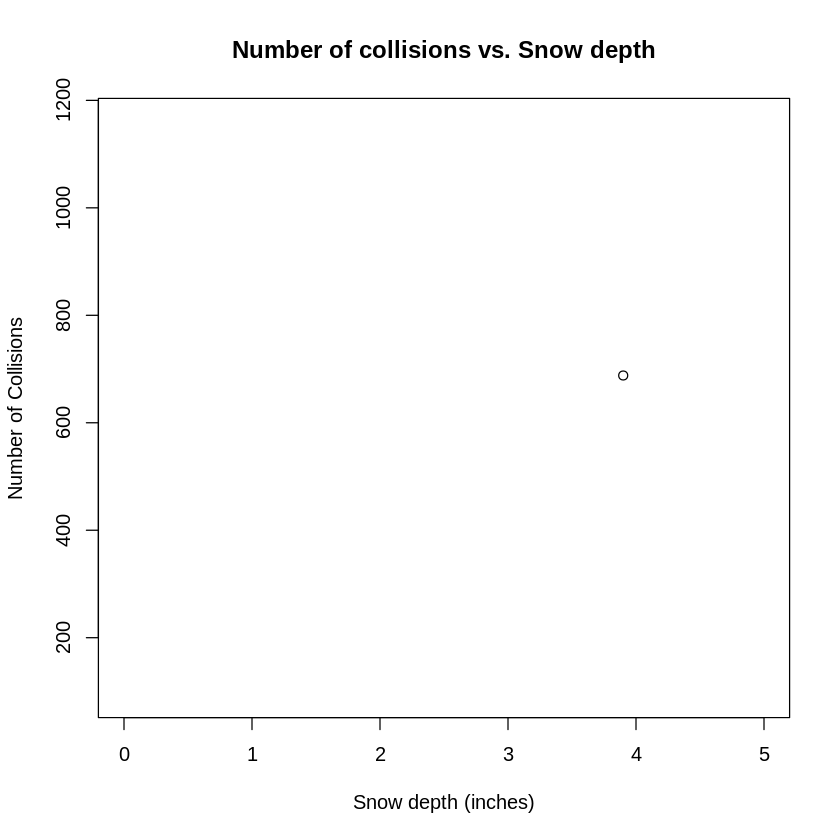

In [71]:
# Plot the data [Snow depth vs. NUM_COLLISIONS]
plot(collision_data$sndp, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Snow depth",
type = "p",
xlab="Snow depth (inches)", ylab="Number of Collisions",
)

# Plot the data [Snow depth vs. NUM_COLLISIONS] - focused
plot(collision_data$sndp, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Snow depth",
type = "p",
xlab="Snow depth (inches)", ylab="Number of Collisions",
xlim = c(0, 5)
)

In [72]:
cor(collision_data$sndp, collision_data$NUM_COLLISIONS)

[1] -0.01650635

NEGATIVE - Linear Regression - (-0.016) -2% Correlation
<hr>

In [73]:
# Counting the number of instances that have 999.9 = "Missing Data"
sum(collision_data$sndp == "999.9")
sum(collision_data$sndp != "999.9")

[1] 3105

[1] 1

**First: Missing Data** <br>
Number of missing values = 3105,<br>
Number of values recorded = 1

<hr>

**Based on results:**

Limited Usefulness: With only one actual value and the rest missing, the "snow depth" column provides little informative value for analysis or predictive modelling. It is unlikely that this single data point could offer any meaningful insight or contribute to the accuracy of a model.

# WC - [2425 words]

# Cleaning Dataset

Based on the intital visual plots and exploration of the dataset

Next Steps:
1. Missing Data
2. Patterns
3. Clean version of the dataset


## Check for Duplicates

In [74]:
# Check for duplicate rows
duplicates <- collision_data %>%
  # Add a row index before checking for duplicates
  mutate(row_index = row_number()) %>%
  # Check for duplicates across all columns
  filter(duplicated(select(., -row_index))) %>%
  # Remove the row index before inspecting the duplicates
  select(-row_index)

# Count the number of duplicate rows
num_duplicates <- nrow(duplicates)

# Print the number of duplicates
print(num_duplicates)

# see the duplicate rows
print(duplicates)

[1] 0
 [1] day            year           mo             da             collision_date
 [6] temp           dewp           slp            visib          wdsp          
[11] mxpsd          gust           max            min            prcp          
[16] sndp           fog            NUM_COLLISIONS
<0 rows> (or 0-length row.names)


In [75]:
# Check for duplicates
# collision_data[!duplicated(collision_data), ]

# Previous code block - reveals 0 duplicates.

#tidyverse version
collision_data %>%
  distinct() %>%
  View()

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust  max 
1    2   2018 1   2 2018-01-02     14.7  2.0 1024.9 10.0  12.9 20.0   31.1 18  
2    1   2018 1   1 2018-01-01      9.5 -0.5 1022.2 10.0  15.0 18.1   25.1 21  
3    5   2014 1  24 2014-01-24     14.8 -0.5 1022.4 10.0  11.8 15.9   22.9 23  
4    3   2015 1   7 2015-01-07     22.6 10.2 1011.8  9.4  12.1 26.0   35.9 27  
5    6   2018 1   6 2018-01-06     13.2 -0.2 1013.5 10.0  22.4 28.0   39.0 27  
6    4   2015 1   8 2015-01-08     13.1 -2.4 1022.7  9.9  14.8 21.0   29.9 27  
7    3   2014 1  29 2014-01-29     20.3 10.4 1021.2  6.3   8.1 14.0  999.9 27  
8    4   2014 1  30 2014-01-30     22.0  5.8 1027.2 10.0   8.1 15.9   24.1 27  
9    1   2017 1   9 2017-01-09     18.3  5.7 1035.5 10.0  11.0 18.1   22.9 28  
10   2   2015 1   6 2015-01-06     20.8  5.2 1025.2  8.8  10.3 21.0   31.1 28  
11   2   2019 1  22 2019-01-22     15.8 -2.3 1026.7 10.0  17.6 27.0   36.9 28  
12   6   2013 1  26 2013-01-26     24.4 16.6 1016.4  8.6  10.5 15.9   19.0 28  
13   6   2015 1  10 2015-01-10     26.9 10.0 1025.0 10.0  10.2 17.1   22.0 30  
14   6   2019 1  12 2019-01-12     23.1  3.7 1029.0 10.0  12.9 19.0   28.0 32  
15   1   2013 1  28 2013-01-28     27.3 10.8 1028.9  8.8   7.4 14.0   20.0 32  
16   5   2018 1  26 2018-01-26     25.3  7.0 1035.0 10.0  14.4 21.0   31.1 32  
17   3   2014 1   1 2014-01-01     28.2 10.4 1025.6 10.0  11.3 21.0   28.9 32  
18   2   2013 1  22 2013-01-22     26.3 18.1 1011.1  6.5  10.8 20.0   26.0 32  
19   6   2015 1  31 2015-01-31     24.5 12.9 1006.9  7.8  20.3 27.0   36.9 34  
20   2   2020 1  21 2020-01-21     27.8 15.2 1026.8 10.0  11.5 15.9  999.9 34  
21   3   2014 1   8 2014-01-08     18.2  5.0 1028.1 10.0  12.0 17.1   26.0 34  
22   5   2018 1  19 2018-01-19     28.9 21.4 1014.3 10.0  10.5 15.0   21.0 34  
23   3   2020 1  22 2020-01-22     27.1 14.3 1029.8 10.0   4.2  8.9  999.9 34  
24   4   2015 1  29 2015-01-29     29.2 20.9 1022.9 10.0   8.5 13.0   20.0 36  
25   7   2017 1  15 2017-01-15     33.6 24.8 1025.3  9.0  10.8 19.0   22.9 36  
26   3   2014 1  22 2014-01-22     25.0 20.3 1001.1  1.9  25.7 35.9   46.0 36  
27   5   2015 1   9 2015-01-09     35.2 22.5 1018.1  9.5  21.0 38.1   49.0 46  
28   4   2016 1  28 2016-01-28     35.0 24.4 1016.1 10.0   4.3  8.9  999.9 46  
29   3   2013 1   9 2013-01-09     39.9 37.6 1026.2  6.8   5.3 11.1  999.9 46  
30   1   2018 1  29 2018-01-29     40.3 37.7 1021.4  6.9  12.1 26.0   34.0 46  
⋮    ⋮   ⋮    ⋮  ⋮  ⋮              ⋮    ⋮    ⋮      ⋮     ⋮    ⋮     ⋮     ⋮   
3077 7   2012 12 30 2012-12-30     32.4 21.1 1011.1  8.8  11.9 39.0   49.9 44.6
3078 1   2014 12 15 2014-12-15     37.8 31.6 1014.5  9.9   5.8 11.1  999.9 44.6
3079 5   2013 12 13 2013-12-13     28.1 12.0 1019.3  9.9  12.7 24.1   31.1 35.1
3080 6   2013 12 14 2013-12-14     26.9 15.8 1029.8  8.1  10.7 15.0   22.0 35.1
3081 6   2017 12 16 2017-12-16     30.9 24.3 1013.6  8.0  12.4 22.0   28.0 35.1
3082 7   2017 12 17 2017-12-17     27.6 13.8 1022.8 10.0  10.1 17.1   28.0 35.1
3083 1   2013 12 16 2013-12-16     32.0 15.5 1012.3 10.0  12.5 17.1   27.0 35.1
3084 4   2013 12  5 2013-12-05     43.4 40.5 1021.5  8.3   7.4 13.0   20.0 51.1
3085 6   2014 12 27 2014-12-27     43.7 36.4 1021.8 10.0   7.4 11.1  999.9 51.1
3086 7   2018 12 16 2018-12-16     43.8 37.8 1017.9  8.4  15.2 20.0   28.9 51.1
3087 7   2014 12 28 2014-12-28     47.0 43.2 1014.0  9.5  10.7 15.9   22.0 51.1
3088 1   2014 12 29 2014-12-29     41.2 27.8 1017.9  9.9   8.4 12.0   18.1 51.1
3089 7   2018 12 23 2018-12-23     36.7 23.9 1015.1 10.0  11.6 20.0   32.1 51.1
3090 2   2013 12 10 2013-12-10     38.8 35.1 1012.4  6.7   9.1 17.1   25.1 51.1
3091 6   2018 12 15 2018-12-15     46.1 44.8 1022.3  5.7   6.8 18.1   27.0 51.1
3092 2   2014 12 23 2014-12-23     47.4 44.2 1022.0  6.6  11.1 15.0   22.0 51.1
3093 3   2017 12 13 2017-12-13     32.8 25.1  992.9  9.2  17.6 26.0   39.0 51.1
3094 2   2017 12 12 2017-12-12     42.6 38.1 1007.4  9.7  10.0 17.1   20.0 51.1
3095 

## Missing Data

- sndp (snow depth)
- dewp (dew points)
- slp (sea level pressure)
- mxspd (max wind speed)
- gust (wind gust)
- prcp (total precipitation)

In [76]:
# View function - Detailed 'view' of the datatset
View(collision_data)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust  max 
1    2   2018 1   2 2018-01-02     14.7  2.0 1024.9 10.0  12.9 20.0   31.1 18  
2    1   2018 1   1 2018-01-01      9.5 -0.5 1022.2 10.0  15.0 18.1   25.1 21  
3    5   2014 1  24 2014-01-24     14.8 -0.5 1022.4 10.0  11.8 15.9   22.9 23  
4    3   2015 1   7 2015-01-07     22.6 10.2 1011.8  9.4  12.1 26.0   35.9 27  
5    6   2018 1   6 2018-01-06     13.2 -0.2 1013.5 10.0  22.4 28.0   39.0 27  
6    4   2015 1   8 2015-01-08     13.1 -2.4 1022.7  9.9  14.8 21.0   29.9 27  
7    3   2014 1  29 2014-01-29     20.3 10.4 1021.2  6.3   8.1 14.0  999.9 27  
8    4   2014 1  30 2014-01-30     22.0  5.8 1027.2 10.0   8.1 15.9   24.1 27  
9    1   2017 1   9 2017-01-09     18.3  5.7 1035.5 10.0  11.0 18.1   22.9 28  
10   2   2015 1   6 2015-01-06     20.8  5.2 1025.2  8.8  10.3 21.0   31.1 28  
11   2   2019 1  22 2019-01-22     15.8 -2.3 1026.7 10.0  17.6 27.0   36.9 28  
12   6   2013 1  26 2013-01-26     24.4 16.6 1016.4  8.6  10.5 15.9   19.0 28  
13   6   2015 1  10 2015-01-10     26.9 10.0 1025.0 10.0  10.2 17.1   22.0 30  
14   6   2019 1  12 2019-01-12     23.1  3.7 1029.0 10.0  12.9 19.0   28.0 32  
15   1   2013 1  28 2013-01-28     27.3 10.8 1028.9  8.8   7.4 14.0   20.0 32  
16   5   2018 1  26 2018-01-26     25.3  7.0 1035.0 10.0  14.4 21.0   31.1 32  
17   3   2014 1   1 2014-01-01     28.2 10.4 1025.6 10.0  11.3 21.0   28.9 32  
18   2   2013 1  22 2013-01-22     26.3 18.1 1011.1  6.5  10.8 20.0   26.0 32  
19   6   2015 1  31 2015-01-31     24.5 12.9 1006.9  7.8  20.3 27.0   36.9 34  
20   2   2020 1  21 2020-01-21     27.8 15.2 1026.8 10.0  11.5 15.9  999.9 34  
21   3   2014 1   8 2014-01-08     18.2  5.0 1028.1 10.0  12.0 17.1   26.0 34  
22   5   2018 1  19 2018-01-19     28.9 21.4 1014.3 10.0  10.5 15.0   21.0 34  
23   3   2020 1  22 2020-01-22     27.1 14.3 1029.8 10.0   4.2  8.9  999.9 34  
24   4   2015 1  29 2015-01-29     29.2 20.9 1022.9 10.0   8.5 13.0   20.0 36  
25   7   2017 1  15 2017-01-15     33.6 24.8 1025.3  9.0  10.8 19.0   22.9 36  
26   3   2014 1  22 2014-01-22     25.0 20.3 1001.1  1.9  25.7 35.9   46.0 36  
27   5   2015 1   9 2015-01-09     35.2 22.5 1018.1  9.5  21.0 38.1   49.0 46  
28   4   2016 1  28 2016-01-28     35.0 24.4 1016.1 10.0   4.3  8.9  999.9 46  
29   3   2013 1   9 2013-01-09     39.9 37.6 1026.2  6.8   5.3 11.1  999.9 46  
30   1   2018 1  29 2018-01-29     40.3 37.7 1021.4  6.9  12.1 26.0   34.0 46  
⋮    ⋮   ⋮    ⋮  ⋮  ⋮              ⋮    ⋮    ⋮      ⋮     ⋮    ⋮     ⋮     ⋮   
3077 7   2012 12 30 2012-12-30     32.4 21.1 1011.1  8.8  11.9 39.0   49.9 44.6
3078 1   2014 12 15 2014-12-15     37.8 31.6 1014.5  9.9   5.8 11.1  999.9 44.6
3079 5   2013 12 13 2013-12-13     28.1 12.0 1019.3  9.9  12.7 24.1   31.1 35.1
3080 6   2013 12 14 2013-12-14     26.9 15.8 1029.8  8.1  10.7 15.0   22.0 35.1
3081 6   2017 12 16 2017-12-16     30.9 24.3 1013.6  8.0  12.4 22.0   28.0 35.1
3082 7   2017 12 17 2017-12-17     27.6 13.8 1022.8 10.0  10.1 17.1   28.0 35.1
3083 1   2013 12 16 2013-12-16     32.0 15.5 1012.3 10.0  12.5 17.1   27.0 35.1
3084 4   2013 12  5 2013-12-05     43.4 40.5 1021.5  8.3   7.4 13.0   20.0 51.1
3085 6   2014 12 27 2014-12-27     43.7 36.4 1021.8 10.0   7.4 11.1  999.9 51.1
3086 7   2018 12 16 2018-12-16     43.8 37.8 1017.9  8.4  15.2 20.0   28.9 51.1
3087 7   2014 12 28 2014-12-28     47.0 43.2 1014.0  9.5  10.7 15.9   22.0 51.1
3088 1   2014 12 29 2014-12-29     41.2 27.8 1017.9  9.9   8.4 12.0   18.1 51.1
3089 7   2018 12 23 2018-12-23     36.7 23.9 1015.1 10.0  11.6 20.0   32.1 51.1
3090 2   2013 12 10 2013-12-10     38.8 35.1 1012.4  6.7   9.1 17.1   25.1 51.1
3091 6   2018 12 15 2018-12-15     46.1 44.8 1022.3  5.7   6.8 18.1   27.0 51.1
3092 2   2014 12 23 2014-12-23     47.4 44.2 1022.0  6.6  11.1 15.0   22.0 51.1
3093 3   2017 12 13 2017-12-13     32.8 25.1  992.9  9.2  17.6 26.0   39.0 51.1
3094 2   2017 12 12 2017-12-12     42.6 38.1 1007.4  9.7  10.0 17.1   20.0 51.1
3095 

In [77]:
# ‘glimpse()’ is like a transposed version of ‘print()’: columns run
#  down the page, and data runs across. This makes it possible to see
#  every column in a data frame. It's a little like ‘str()’ applied
#  to a data frame but it tries to show you as much data as possible.
glimpse(collision_data)

Rows: 3,106
Columns: 18
$ day            <int> 2, 1, 5, 3, 6, 4, 3, 4, 1, 2, 2, 6, 6, 6, 1, 5, 3, 2, 6…
$ year           <int> 2018, 2018, 2014, 2015, 2018, 2015, 2014, 2014, 2017, 2…
$ mo             <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ da             <int> 2, 1, 24, 7, 6, 8, 29, 30, 9, 6, 22, 26, 10, 12, 28, 26…
$ collision_date <date> 2018-01-02, 2018-01-01, 2014-01-24, 2015-01-07, 2018-0…
$ temp           <dbl> 14.7, 9.5, 14.8, 22.6, 13.2, 13.1, 20.3, 22.0, 18.3, 20…
$ dewp           <dbl> 2.0, -0.5, -0.5, 10.2, -0.2, -2.4, 10.4, 5.8, 5.7, 5.2,…
$ slp            <dbl> 1024.9, 1022.2, 1022.4, 1011.8, 1013.5, 1022.7, 1021.2,…
$ visib          <dbl> 10.0, 10.0, 10.0, 9.4, 10.0, 9.9, 6.3, 10.0, 10.0, 8.8,…
$ wdsp           <dbl> 12.9, 15.0, 11.8, 12.1, 22.4, 14.8, 8.1, 8.1, 11.0, 10.…
$ mxpsd          <dbl> 20.0, 18.1, 15.9, 26.0, 28.0, 21.0, 14.0, 15.9, 18.1, 2…
$ gust           <dbl> 31.1, 25.1, 22.9, 35.9, 39.0, 29.9, 999.9, 24.1, 22.9, …
$ max           

In [78]:
summary(collision_data)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.999   Mean   :2016   Mean   : 6.699   Mean   :15.74  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2020   Max.   :12.000   Max.   :31.00  
 collision_date            temp            dewp               slp       
 Min.   :2012-07-01   Min.   : 5.80   Min.   :   -6.70   Min.   :  989  
 1st Qu.:2014-08-16   1st Qu.:41.20   1st Qu.:   32.60   1st Qu.: 1012  
 Median :2016-09-30   Median :52.50   Median :   45.70   Median : 1017  
 Mean   :2016-09-30   Mean   :52.25   Mean   :   47.88   Mean   : 1023  
 3rd Qu.:2018-11-15   3rd Qu.:64.70   3rd Qu.:   59.10   3rd Qu.: 1022  
 Max.   :2020-12-31   Max.   :86.70   Max.   : 9999.90   Max.   :10000  
     visib             wdsp       

In [79]:
# Setting the missing values to NA for now.
collision_data_NA <- collision_data %>%
  # Replace placeholder values with NA for each specified column
  mutate(across(c(temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp),
                ~na_if(., 9999.9))) %>%
  # missing value = 999.9
  mutate(across(c(visib, wdsp, mxpsd, gust, sndp),
                ~na_if(., 999.9))) %>%
  #missing value = 99.99
  mutate(prcp = na_if(prcp, 99.99))


In [80]:
# summary check - if NA values have been set
summary(collision_data_NA)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.999   Mean   :2016   Mean   : 6.699   Mean   :15.74  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2020   Max.   :12.000   Max.   :31.00  
                                                                
 collision_date            temp            dewp            slp      
 Min.   :2012-07-01   Min.   : 5.80   Min.   :-6.70   Min.   : 989  
 1st Qu.:2014-08-16   1st Qu.:41.20   1st Qu.:32.60   1st Qu.:1012  
 Median :2016-09-30   Median :52.50   Median :45.70   Median :1017  
 Mean   :2016-09-30   Mean   :52.25   Mean   :44.67   Mean   :1017  
 3rd Qu.:2018-11-15   3rd Qu.:64.70   3rd Qu.:59.10   3rd Qu.:1022  
 Max.   :2020-12-31   Max.   :86.70   Max.   :74.10   Max.   :1044

### Snow Depth [sndp]

Based on initial explorations of this variable.

I plan to remove the column 'sndp' due to the massive amounts of missing values.

It would reasonable to assume that the station recording the weather data does not record snow, for one reason or another. I am taking this approach because over 2012 -> 2020, only 1 value is recorded.

In [81]:
summary(collision_data_NA$sndp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    3.9     3.9     3.9     3.9     3.9     3.9    3105 

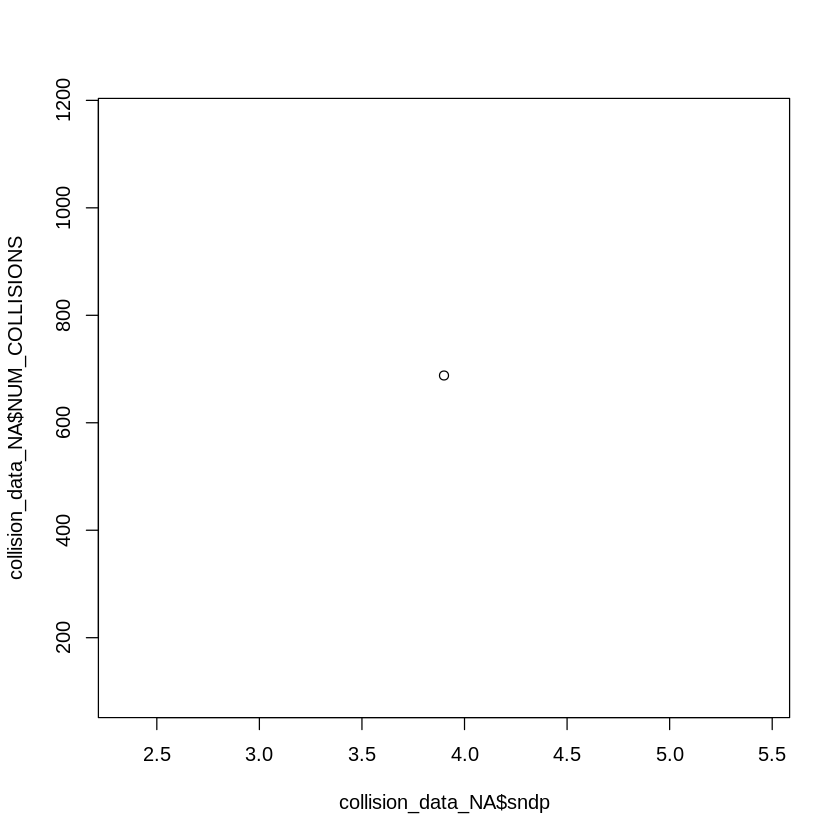

In [82]:
# plot - example of the data 'sndp' with NA included.
plot(collision_data_NA$sndp, collision_data_NA$NUM_COLLISIONS)

In [83]:
# Remove the column 'sndp' from the dataset
collision_data_NA <- collision_data_NA %>%
  select(-sndp)

In [84]:
# Check that column 'sndp' has been removed
# head() check
head(collision_data_NA)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust max min 
1 2   2018 1   2 2018-01-02     14.7  2.0 1024.9 10.0  12.9 20.0  31.1 18   5.0
2 1   2018 1   1 2018-01-01      9.5 -0.5 1022.2 10.0  15.0 18.1  25.1 21   5.0
3 5   2014 1  24 2014-01-24     14.8 -0.5 1022.4 10.0  11.8 15.9  22.9 23   9.0
4 3   2015 1   7 2015-01-07     22.6 10.2 1011.8  9.4  12.1 26.0  35.9 27  17.1
5 6   2018 1   6 2018-01-06     13.2 -0.2 1013.5 10.0  22.4 28.0  39.0 27  10.9
6 4   2015 1   8 2015-01-08     13.1 -2.4 1022.7  9.9  14.8 21.0  29.9 27   6.1
  prcp fog NUM_COLLISIONS
1 0    0   654           
2 0    0   453           
3 0    0   705           
4 0    0   538           
5 0    0   599           
6 0    0   573

### Dewp Points [dewp]


In [85]:
summary(collision_data_NA$dewp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -6.70   32.60   45.70   44.67   59.10   74.10       1 

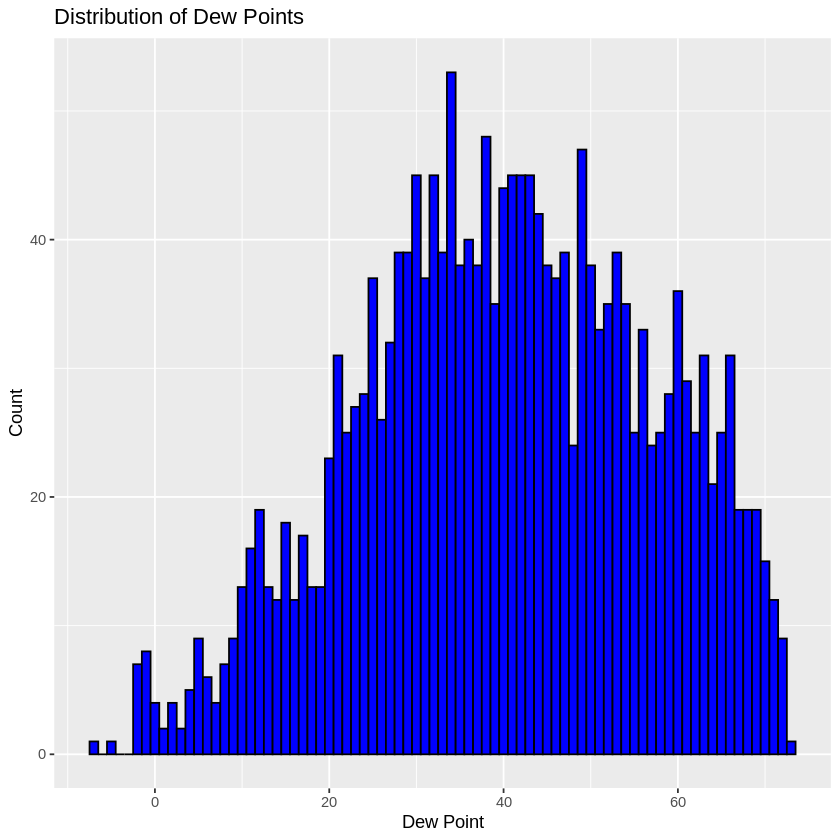

In [86]:
# ggplot - visual display with newer dataFrame (NA => missing values)
ggplot(na.omit(collision_data_NA), aes(x = dewp)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  labs(title = "Distribution of Dew Points", x = "Dew Point", y = "Count")

In [87]:
# Correlation - dewp vs. number of collisions
cor(collision_data_NA$dewp, collision_data_NA$NUM_COLLISIONS, use = "complete.obs")

[1] 0.08330694

In [88]:
# Correlation - temp vs. dewp
cor(collision_data_NA$temp, collision_data_NA$dewp, use = "complete.obs")

[1] 0.9610365

In [89]:
# Exlore of the dewp, in relation to other variables.
collision_data_NA %>%
  select(temp, dewp, prcp, visib, NUM_COLLISIONS) %>%
  filter(is.na(dewp)) %>%
  View()

# temp > 55
# visib 6.8

temp dewp prcp visib NUM_COLLISIONS
1 59.8 NA   0    6.8   622

In [90]:
summary(collision_data_NA$dewp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -6.70   32.60   45.70   44.67   59.10   74.10       1 

In [91]:
# I want to find the variables that have a close relation to the NA record.
collision_data_NA %>%
  select(day, year, mo, da, temp, dewp, prcp, visib, NUM_COLLISIONS) %>%
  filter(temp >= 55 & temp <= 60) %>%
  filter(visib >= 6.6 & visib <= 7) %>%
  filter (prcp == 0) %>%
  View()

# Look at the dewp closest
collision_data_NA %>%
  select(day, year, mo, da, temp, dewp, prcp, visib, NUM_COLLISIONS) %>%
  filter(temp >= 55 & temp <= 60) %>%
  filter(visib >= 6.6 & visib <= 7) %>%
  filter(dewp >= 54.6 & dewp < 55) %>%
  filter (prcp == 0) %>%
  View()

day year mo da temp dewp prcp visib NUM_COLLISIONS
1 5   2016  5 13 55.5 51.7 0    6.6   766           
2 1   2017  6  5 56.6 54.5 0    7.0   656           
3 6   2018  7 21 59.8   NA 0    6.8   622           
4 5   2016 10  7 55.6 49.7 0    6.9   754           
5 7   2013 10  6 59.1 54.8 0    6.9   404           
6 4   2020 11 26 55.7 53.3 0    7.0   203

day year mo da temp dewp prcp visib NUM_COLLISIONS
1 7   2013 10 6  59.1 54.8 0    6.9   404

Median (45.70), mean (44.67) values seem low compared to the filtered data above.

I could use Imputation to replace the NA with a logical guess from the values presented above. Which would be [dewp = 54.8]

In [92]:
# check year, month and day in relation to the dewp missing value.
# This is just to clarity whether it would be logical a conditional imputation.
 collision_data_NA %>%
   filter(mo == 7 & da == 21) %>%
   arrange(desc(temp)) %>%
   View()

# order by year
 collision_data_NA %>%
   filter(mo == 7 & da == 21) %>%
   arrange(year) %>%
   View()

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust max 
1 2   2020 7  21 2020-07-21     77.6 66.1 1014.3  8.3   8.6 11.1  17.1 88.0
2 7   2019 7  21 2019-07-21     76.7 72.4 1007.5  6.7  10.7 13.0    NA 87.1
3 5   2017 7  21 2017-07-21     75.6 69.6 1010.4  5.7   7.8 13.0    NA 84.9
4 7   2013 7  21 2013-07-21     72.8 69.1 1012.6  6.6   5.3 12.0    NA 77.0
5 2   2015 7  21 2015-07-21     72.6 69.7 1003.7  3.6   5.4  8.9    NA 82.0
6 4   2016 7  21 2016-07-21     70.4 63.4 1020.2 10.0   7.4 12.0    NA 80.1
7 6   2012 7  21 2012-07-21     68.1 58.5 1018.3  9.8   4.1 12.0    NA 77.0
8 1   2014 7  21 2014-07-21     65.9 63.3 1020.4  6.0  12.8 15.9  21.0 70.0
9 6   2018 7  21 2018-07-21     59.8   NA 1021.0  6.8   6.7 15.0  17.1 73.0
  min  prcp fog NUM_COLLISIONS
1 69.1 0.00 1   331           
2 70.0 0.00 0   477           
3 69.1 0.00 1   733           
4 66.9 0.04 0   447           
5 68.0 0.00 1   606           
6 60.1 0.00 0   731           
7 57.9 0.43 0   528           
8 62.6 0.40 0   557           
9 52.0 0.00 1   622

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust max 
1 6   2012 7  21 2012-07-21     68.1 58.5 1018.3  9.8   4.1 12.0    NA 77.0
2 7   2013 7  21 2013-07-21     72.8 69.1 1012.6  6.6   5.3 12.0    NA 77.0
3 1   2014 7  21 2014-07-21     65.9 63.3 1020.4  6.0  12.8 15.9  21.0 70.0
4 2   2015 7  21 2015-07-21     72.6 69.7 1003.7  3.6   5.4  8.9    NA 82.0
5 4   2016 7  21 2016-07-21     70.4 63.4 1020.2 10.0   7.4 12.0    NA 80.1
6 5   2017 7  21 2017-07-21     75.6 69.6 1010.4  5.7   7.8 13.0    NA 84.9
7 6   2018 7  21 2018-07-21     59.8   NA 1021.0  6.8   6.7 15.0  17.1 73.0
8 7   2019 7  21 2019-07-21     76.7 72.4 1007.5  6.7  10.7 13.0    NA 87.1
9 2   2020 7  21 2020-07-21     77.6 66.1 1014.3  8.3   8.6 11.1  17.1 88.0
  min  prcp fog NUM_COLLISIONS
1 57.9 0.43 0   528           
2 66.9 0.04 0   447           
3 62.6 0.40 0   557           
4 68.0 0.00 1   606           
5 60.1 0.00 0   731           
6 69.1 0.00 1   733           
7 52.0 0.00 1   622           
8 70.0 0.00 0   477           
9 69.1 0.00 1   331

The day compared to the other years have a drastic different in temp. So it might be better to just remove the NA and proceed with more analysis. As stated before, 1 record won't affect the overall model performance

In [93]:
# remove the 'NA' for the missing value [dewp]
collision_data_NA <- collision_data_NA %>%
  filter(!is.na(dewp))

# Check summary
summary(collision_data_NA$dewp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -6.70   32.60   45.70   44.67   59.10   74.10 

### Sea Level Pressure [slp]

In [94]:
#summary [slp]
summary(collision_data_NA$slp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    989    1012    1017    1017    1022    1044       2 

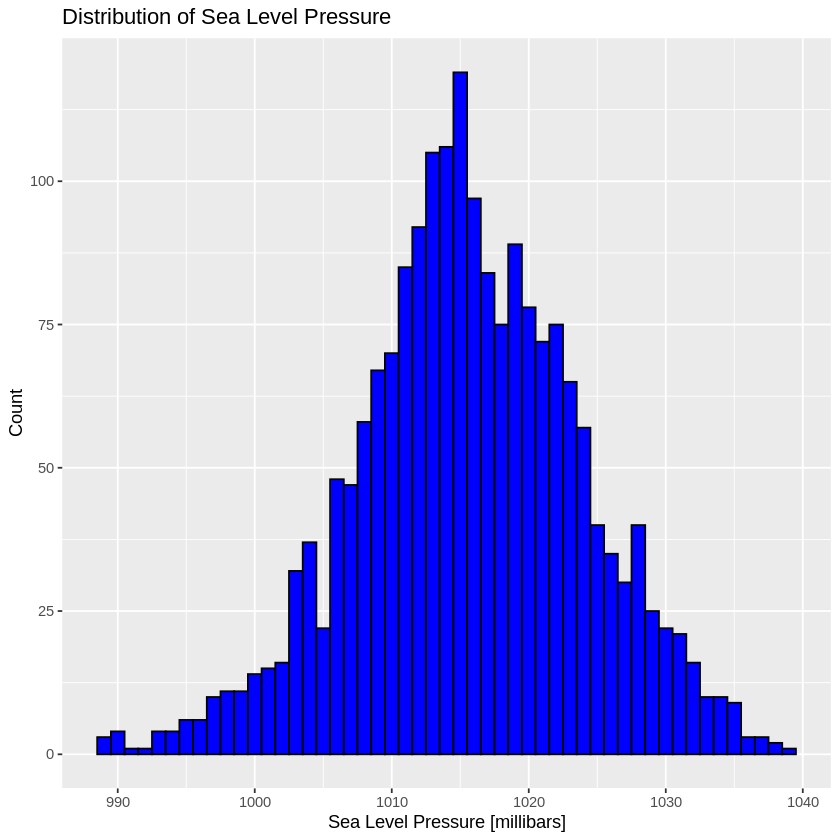

In [95]:
# ggplot - visual display with newer dataFrame (NA => missing values)
ggplot(na.omit(collision_data_NA), aes(x = slp)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  labs(title = "Distribution of Sea Level Pressure", x = "Sea Level Pressure [millibars]", y = "Count")

In [96]:
cor(collision_data_NA$slp, collision_data_NA$NUM_COLLISIONS, use = "complete.obs")

[1] -0.01671953

In [97]:
# Exlore of the dewp, in relation to other variables.
collision_data_NA %>%
  select(slp, temp, dewp, visib, wdsp, mxpsd, gust, max, min, prcp, NUM_COLLISIONS) %>%
  filter(is.na(slp)) %>%
  View()

slp temp dewp visib wdsp mxpsd gust max min prcp NUM_COLLISIONS
1 NA  67.5 65.8 6.1    5.5  8    NA   68  66  0    317           
2 NA  46.5 41.8 9.5   11.0 15    NA   48  45  0    527

In [98]:
# First check the slp value which has temp 67.5
collision_data_NA %>%
  select(slp, temp, dewp, visib, wdsp, mxpsd, gust, max, min, prcp, NUM_COLLISIONS) %>%
  filter(temp >= 67.0 & temp <= 68.0) %>%
  filter(visib >= 6.0 & visib <= 6.5) %>%
  View()

slp    temp dewp visib wdsp mxpsd gust max  min  prcp NUM_COLLISIONS
1 1012.0 67.1 62.7 6.2    6.2 12.0    NA 77.0 59.0 1.80 774           
2 1012.6 68.0 61.0 6.0   10.9 21.0  25.1 79.0 61.0 0.02 395           
3 1007.3 67.7 61.8 6.3   11.6 17.1  22.9 78.1 60.1 0.03 812           
4 1016.9 67.9 64.1 6.4    9.1 19.0  22.9 75.0 60.1 0.00 257           
5 1009.7 67.1 65.3 6.2    9.2 15.0    NA 75.9 64.0 0.62 663           
6 1016.3 67.5 64.7 6.5    7.3 12.0    NA 75.0 53.1 0.02 538           
7 1016.4 67.7 65.2 6.1    4.3  8.0    NA 80.1 61.0 0.00 602           
8     NA 67.5 65.8 6.1    5.5  8.0    NA 68.0 66.0 0.00 317

In [99]:
summary(collision_data_NA$slp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    989    1012    1017    1017    1022    1044       2 

In [100]:
# 2nd NA where temp = 46.5
collision_data_NA %>%
  select(slp, temp, dewp, visib, wdsp, mxpsd, gust, max, min, prcp, NUM_COLLISIONS) %>%
  filter(temp >= 46.4 & temp <= 46.6) %>%
  View()

slp    temp dewp visib wdsp mxpsd gust max  min  prcp NUM_COLLISIONS
1  1012.6 46.5 44.7  5.2  19.2 31.1  42.0 52.0 42.8 0.00 592           
2   995.5 46.5 40.3  5.9  23.1 28.0  39.0 54.0 39.0 0.02 592           
3   996.4 46.5 43.7  6.2  13.6 21.0  28.0 53.1 42.1 0.87 590           
4  1009.0 46.4 41.6  8.0  11.6 20.0  28.0 50.0 44.1 0.02 550           
5  1018.9 46.4 43.3  5.6  16.9 22.0  29.9 52.0 43.0 0.00 551           
6  1020.9 46.4 41.8  8.0   9.4 14.0    NA 55.0 37.9 0.00 660           
7  1016.1 46.5 37.2 10.0  13.7 20.0  24.1 52.0 41.0 0.01 597           
8  1014.1 46.5 42.0  7.6   8.8 15.9  17.1 54.0 41.0 0.12 580           
9  1028.1 46.5 37.3 10.0   8.8 17.1  24.1 54.0 35.1 0.00 553           
10 1021.9 46.6 42.4 10.0   7.6  9.9    NA 55.9 42.1 0.00 541           
11 1017.3 46.5 39.5 10.0  10.5 17.1  24.1 55.9 43.0 0.27 517           
12 1029.1 46.6 34.7  8.6   3.9  8.0    NA 55.9 35.1 0.00 517           
13 1030.7 46.4 33.6 10.0   7.1 12.0  15.9 57.9 35.1 0.00 675           
14 1002.5 46.5 43.0  9.6   6.4 14.0    NA 57.9 43.0 0.06 125           
15 1029.7 46.4 28.5 10.0   8.6 13.0  17.1 62.1 37.9 0.00 560           
16 1027.7 46.4 28.4 10.0  17.6 26.0  35.0 53.1 39.9 0.00 733           
17 1029.3 46.5 36.4  9.8   8.2 15.0  22.0 52.0 39.9 0.00 831           
18 1015.0 46.6 43.4  8.9  10.1 22.9  28.9 54.0 39.0 0.00 811           
19 1022.8 46.4 33.9 10.0   9.6 17.1  20.0 55.0 32.0 0.00 251           
20 1031.6 46.4 32.9 10.0   7.9 13.0    NA 55.0 37.0 0.00 302           
21 1030.4 46.5 41.4 10.0   3.7  8.9    NA 57.0 36.0 0.00 635           
22 1015.7 46.5 42.5 10.0   5.4  9.9    NA 55.9 35.1 0.00 702           
23 1005.8 46.5 43.1  8.4   7.5 19.0  27.0 51.1 43.0 0.38 630           
24 1021.7 46.5 32.7 10.0   4.2 16.9  22.0 53.6 41.0 0.00 689           
25     NA 46.5 41.8  9.5  11.0 15.0    NA 48.0 45.0 0.00 527           
26 1007.7 46.4 32.8 10.0  12.9 19.0  28.0 57.0 43.0 0.06 690           
27 1015.3 46.5 35.5 10.0  12.3 17.1  22.9 61.0 43.0 0.35 673

In [101]:
#checking correlation with weather variables - using correlation-matrix
weather_variables <- collision_data_NA %>%
  select(slp, temp, dewp, visib, wdsp, mxpsd, gust, max, min, prcp, fog)

# remove 'NA' values for now.
weather_variables_complete <- na.omit(weather_variables)

# calculate correlation matrix
cor_matrix <- cor(weather_variables_complete)

#formatted table view
cor_matrix_formatted <- as.data.frame(cor_matrix)

# print results
print(cor_matrix_formatted)

             slp        temp        dewp      visib        wdsp       mxpsd
slp    1.0000000 -0.16620295 -0.22514770  0.3193420 -0.25782589 -0.31153285
temp  -0.1662029  1.00000000  0.95439951 -0.2159342 -0.24645577 -0.27275765
dewp  -0.2251477  0.95439951  1.00000000 -0.3966625 -0.19615864 -0.21255719
visib  0.3193420 -0.21593423 -0.39666252  1.0000000 -0.17974985 -0.22642157
wdsp  -0.2578259 -0.24645577 -0.19615864 -0.1797498  1.00000000  0.78829513
mxpsd -0.3115329 -0.27275765 -0.21255719 -0.2264216  0.78829513  1.00000000
gust  -0.3308261 -0.27454787 -0.22291400 -0.2101923  0.74912129  0.93799697
max   -0.1356673  0.96363304  0.89780295 -0.1499107 -0.25292808 -0.26915159
min   -0.1845399  0.96274031  0.92001788 -0.2238508 -0.20460228 -0.26140795
prcp  -0.2762328  0.02863455  0.09024691 -0.2733169  0.30274272  0.34934241
fog   -0.2235441  0.21617214  0.32321632 -0.6896052 -0.00263674  0.06008131
             gust         max         min        prcp         fog
slp   -0.33082606 -0.1

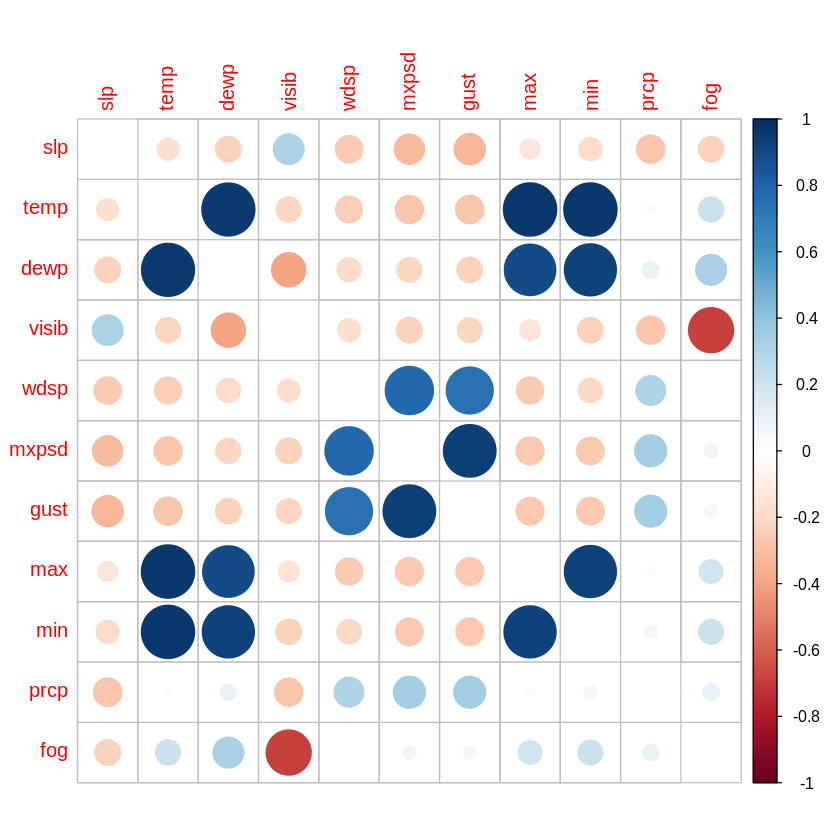

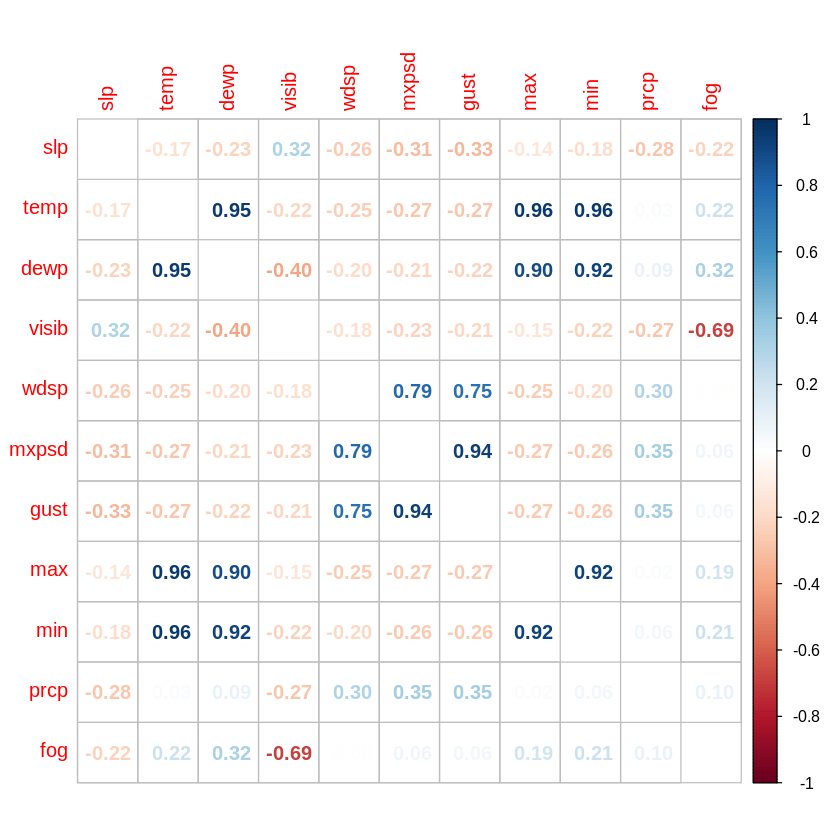

In [102]:
# diag = FALSE [removes correlation check against itself]
corrplot(cor_matrix, diag =  FALSE)
corrplot(cor_matrix, method = 'number', diag =  FALSE)

No clear correlation between slp and other weather variables (gust, mxspd, wdsp, visib, prcp)

In [103]:
cor(collision_data_NA$slp, collision_data_NA$gust, use = "complete.obs")
cor(collision_data_NA$slp, collision_data_NA$mxpsd, use = "complete.obs")
cor(collision_data_NA$slp, collision_data_NA$wdsp, use = "complete.obs")
cor(collision_data_NA$slp, collision_data_NA$visib, use = "complete.obs")
cor(collision_data_NA$slp, collision_data_NA$prcp, use = "complete.obs")


[1] -0.3311959

[1] -0.3253167

[1] -0.2884143

[1] 0.2998318

[1] -0.2861398

At this point, i will remove the 2 missing values from slp and proceed with cleaning the dataset.

In [104]:
# remove the 'NA' for the missing values [slp]
collision_data_NA <- collision_data_NA %>%
  filter(!is.na(slp))

# Check summary
summary(collision_data_NA$slp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    989    1012    1017    1017    1022    1044 

### Total precipitation [prcp]

In [105]:
summary(collision_data_NA$prcp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.1214  0.0600  3.7600      24 

Here we have a little more missing values [24 NA's] compared to the previous variables.

In [106]:
# Look at the NA's values, alongside other weather variables.
collision_data_NA %>%
  select(year, mo, da, temp, slp, visib, wdsp, mxpsd, gust, prcp, fog, NUM_COLLISIONS) %>%
  filter(is.na(prcp)) %>%
  View()

year mo da temp slp    visib wdsp mxpsd gust prcp fog NUM_COLLISIONS
1  2013 2  19 36.7 1019.0 10.0  10.6 15.9  26.0 NA   0   477           
2  2018 3   3 40.2 1005.3  6.2  34.8 46.0  62.9 NA   0   609           
3  2016 4   7 50.9 1013.6  7.6  21.9 32.1  40.0 NA   0   630           
4  2017 6   9 57.6 1006.0  9.1  13.2 22.9  31.1 NA   0   770           
5  2019 7  19 69.2 1011.4  4.7   8.1 15.0    NA NA   1   666           
6  2020 7  24 73.7 1017.4  7.8   6.3 11.1  15.9 NA   1   312           
7  2020 7  31 73.7 1009.8  6.3   5.1 12.0    NA NA   1   343           
8  2012 7   5 86.7 1007.4  9.4   3.8 15.0    NA NA   0   591           
9  2020 7  29 75.3 1012.7  7.5   6.3 11.1    NA NA   0   318           
10 2020 7  20 71.0 1011.6  2.1   9.5 13.0    NA NA   1   281           
11 2019 8  28 65.4 1015.1  9.2   7.7 20.0  27.0 NA   0   553           
12 2020 8   5 74.8 1015.9  8.9  11.5 17.1  22.0 NA   0   345           
13 2020 8   4 74.8 1016.2  3.4  11.4 24.1  33.0 NA   1   451           
14 2019 8  29 71.0 1009.4  6.3   9.5 18.1  22.9 NA   0   592           
15 2019 8  13 71.2 1011.2  7.9   8.4 12.0    NA NA   0   469           
16 2019 8  21 70.6 1016.2  8.1   7.2 21.0  26.0 NA   1   522           
17 2019 8  14 71.1 1009.9  8.6   6.8 12.0    NA NA   0   537           
18 2019 9   7 62.1 1003.1  7.4  20.3 33.0  44.1 NA   0   489           
19 2015 9  11 68.6 1005.8  9.5  12.6 21.0  24.1 NA   0   765           
20 2015 9  13 68.2 1008.0  8.8   8.4 11.1  15.9 NA   0   478           
21 2019 9   5 67.7 1016.7  9.5   9.7 14.0  19.0 NA   0   628           
22 2015 9  10 73.8 1011.3  5.6   5.6  9.9    NA NA   1   716           
23 2019 9   3 70.0 1016.3  8.9   6.8 13.0    NA NA   1   652           
24 2019 9   6 59.3 1016.1  9.1   9.3 17.1  27.0 NA   0   591

It seems that when temp is 70 or above, this is typically when 'gust' and 'prcp' both have NA values.

In [107]:
# Looking at the gust and prcp values when temp is 70 or higher.
# typically when both values have NA.
collision_data_NA %>%
  select(temp, slp, visib, wdsp, mxpsd, gust, prcp, fog, NUM_COLLISIONS) %>%
  filter(temp <= 70) %>%
  filter(is.na(prcp)) %>%
  View()

temp slp    visib wdsp mxpsd gust prcp fog NUM_COLLISIONS
1  36.7 1019.0 10.0  10.6 15.9  26.0 NA   0   477           
2  40.2 1005.3  6.2  34.8 46.0  62.9 NA   0   609           
3  50.9 1013.6  7.6  21.9 32.1  40.0 NA   0   630           
4  57.6 1006.0  9.1  13.2 22.9  31.1 NA   0   770           
5  69.2 1011.4  4.7   8.1 15.0    NA NA   1   666           
6  65.4 1015.1  9.2   7.7 20.0  27.0 NA   0   553           
7  62.1 1003.1  7.4  20.3 33.0  44.1 NA   0   489           
8  68.6 1005.8  9.5  12.6 21.0  24.1 NA   0   765           
9  68.2 1008.0  8.8   8.4 11.1  15.9 NA   0   478           
10 67.7 1016.7  9.5   9.7 14.0  19.0 NA   0   628           
11 70.0 1016.3  8.9   6.8 13.0    NA NA   1   652           
12 59.3 1016.1  9.1   9.3 17.1  27.0 NA   0   591

In [108]:
# I want to look at a few examples using 'wind' variables in correlation to prcp values.
collision_data_NA %>%
  select(visib, wdsp, mxpsd, gust, prcp, fog, NUM_COLLISIONS) %>%
  filter(wdsp >= 30 & wdsp <= 35 ) %>%
  View()

visib wdsp mxpsd gust prcp fog NUM_COLLISIONS
1 3.4   31.0 44.1  58.1 1.54 1   578           
2 4.1   31.6 39.0  55.0 0.80 0   535           
3 6.2   34.8 46.0  62.9   NA 0   609           
4 6.3   32.8 39.0  55.0 1.15 0   532

In [109]:
# Again generally difficult to gauge the logical value for NA in this instance.
collision_data_NA %>%
  select(visib, wdsp, mxpsd, gust, prcp, fog, NUM_COLLISIONS) %>%
  filter(gust >= 60) %>%
  View()

visib wdsp mxpsd gust prcp fog NUM_COLLISIONS
1 0.6   39.3 48.0  62.9 0.40 1   188           
2 1.2   35.3 49.0  63.9 1.64 1   403           
3 4.7   28.0 44.1  71.1 0.00 1   563           
4 5.1   23.3 49.0  65.1 0.35 0   884           
5 6.2   34.8 46.0  62.9   NA 0   609

Not clear what the logical value could be based of investigation. I will try to filter the variable further and see the mean, median values when prcp is not NA and is not equal to 0.

In [110]:
# checking prcp where values are low vs. when prcp is high.
# 1. Check prcp == 0
collision_data_NA %>%
  select(visib, wdsp, mxpsd, gust, prcp, fog, NUM_COLLISIONS) %>%
  filter(prcp == 0.00 ) %>%
  head(10)

visib wdsp mxpsd gust prcp fog NUM_COLLISIONS
1  10.0  12.9 20.0  31.1 0    0   654           
2  10.0  15.0 18.1  25.1 0    0   453           
3  10.0  11.8 15.9  22.9 0    0   705           
4   9.4  12.1 26.0  35.9 0    0   538           
5  10.0  22.4 28.0  39.0 0    0   599           
6   9.9  14.8 21.0  29.9 0    0   573           
7  10.0  11.0 18.1  22.9 0    0   669           
8   8.8  10.3 21.0  31.1 0    0   777           
9  10.0  17.6 27.0  36.9 0    0   627           
10  8.6  10.5 15.9  19.0 0    0   558

In [111]:
# checking prcp where values are low vs. when prcp is high.
# 1. Check prcp >= 0.00 & <= 1.0
collision_data_NA %>%
  select(visib, wdsp, mxpsd, gust, prcp, fog, NUM_COLLISIONS) %>%
  filter(prcp > 0.00 & prcp <= 1.0) %>%
  head(10)

visib wdsp mxpsd gust prcp fog NUM_COLLISIONS
1   6.3   8.1 14.0    NA 0.02 0   649           
2  10.0   8.1 15.9  24.1 0.01 0   657           
3   6.5  10.8 20.0  26.0 0.14 1   544           
4   7.8  20.3 27.0  36.9 0.06 0   526           
5   9.0  10.8 19.0  22.9 0.01 0   490           
6   1.9  25.7 35.9  46.0 0.01 1   498           
7  10.0   4.3  8.9    NA 0.09 0   681           
8   6.9  12.1 26.0  34.0 0.20 1   531           
9   4.4   9.5 18.1    NA 0.01 1   412           
10 10.0  13.0 19.0  26.0 0.01 0   413

In [112]:
# subset for prcp investigations
# prcp != 0
# don't include NA's
prcp_data <- collision_data_NA %>%
  select(prcp) %>%
  filter(prcp != 0) %>%
  filter(!is.na(prcp))

#summary of prcp_data
summary(prcp_data)

      prcp       
 Min.   :0.0100  
 1st Qu.:0.0200  
 Median :0.1100  
 Mean   :0.2937  
 3rd Qu.:0.3800  
 Max.   :3.7600  

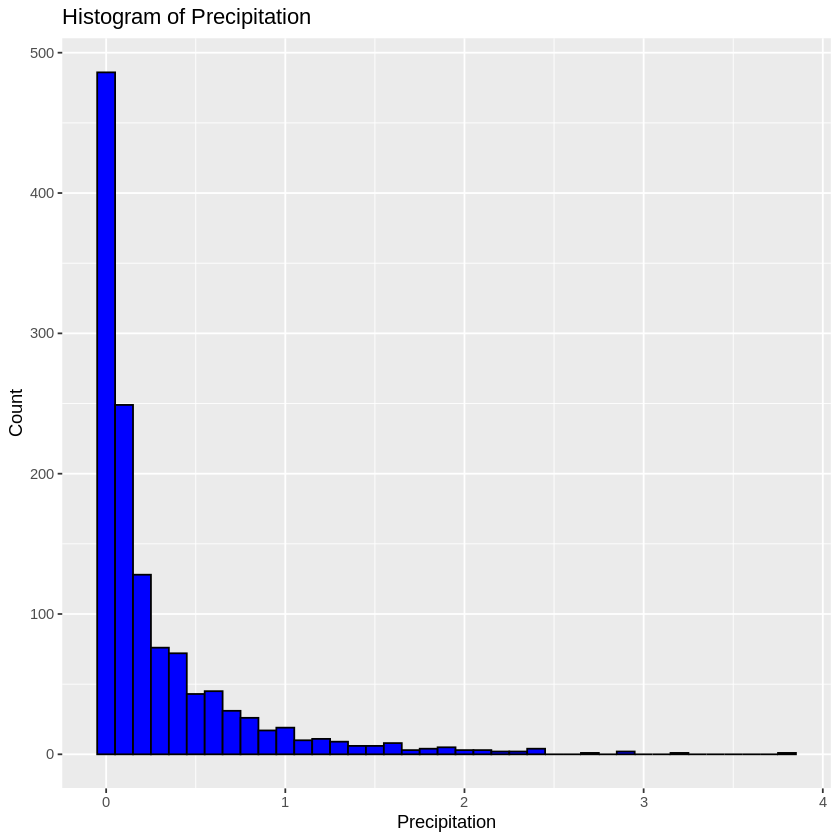

In [113]:
# histogram visual
ggplot(prcp_data, aes(x = prcp)) +
  geom_histogram(binwidth = 0.1, fill = "blue", color = "black") +
  labs(title = "Histogram of Precipitation", x = "Precipitation", y = "Count")

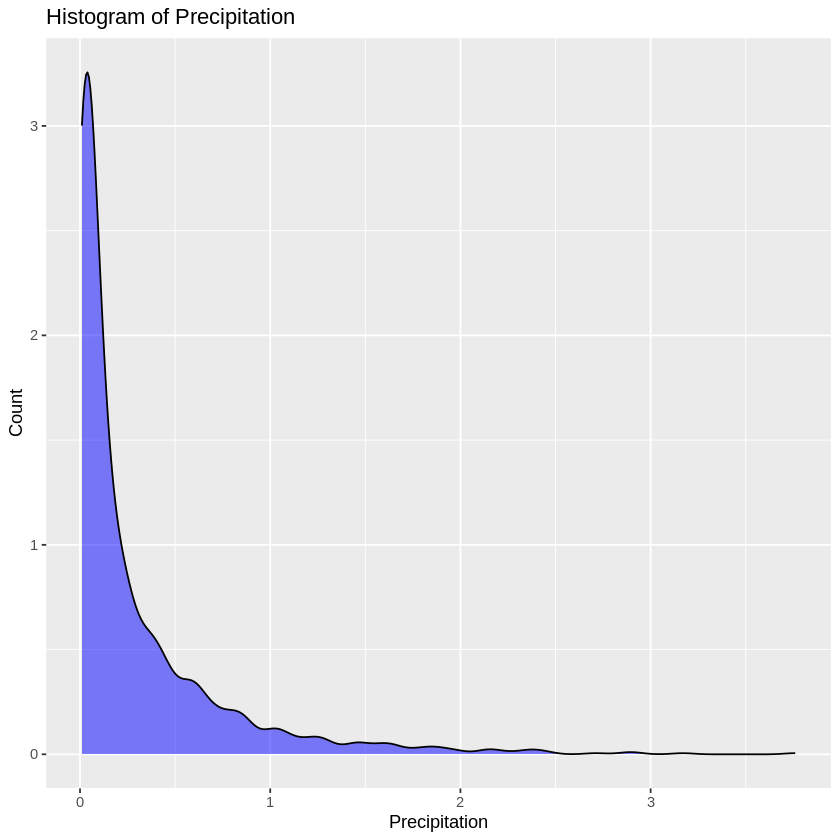

In [114]:
# density visual
ggplot(prcp_data, aes(x = prcp)) +
  geom_density(fill = "blue", alpha = 0.5) +
  labs(title = "Histogram of Precipitation", x = "Precipitation", y = "Count")

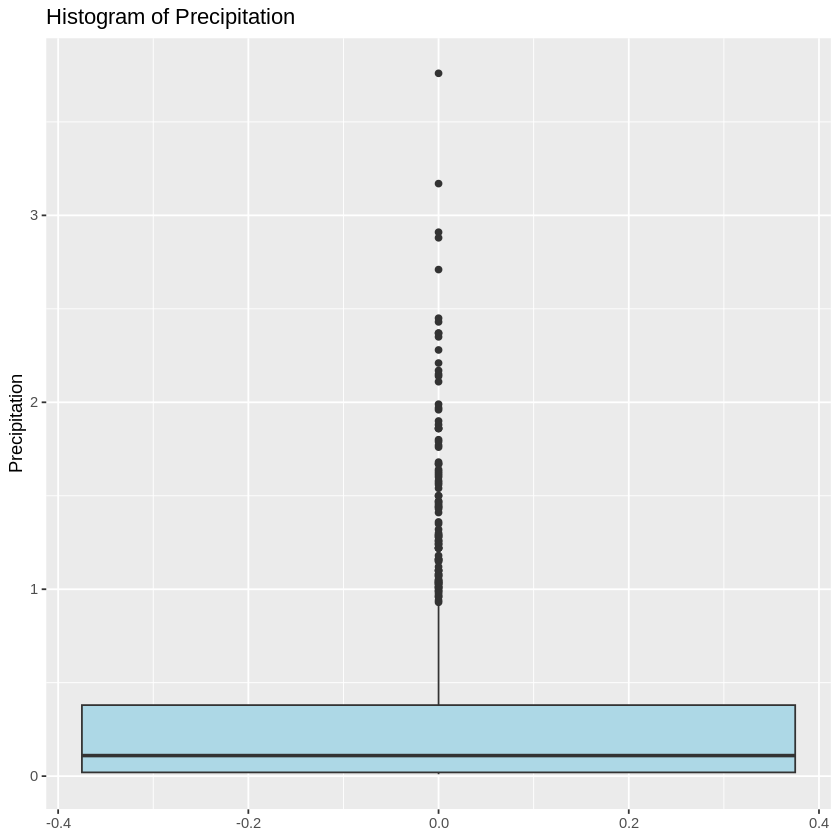

In [115]:
# boxplot visual
ggplot(prcp_data, aes(y = prcp)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Histogram of Precipitation", y = "Precipitation")
  #theme(axis.ticks.x=element_blank(), axis.text.x=element_blank())

Next i want to view the weather variables when prcp is higher than the mean (0.2937)

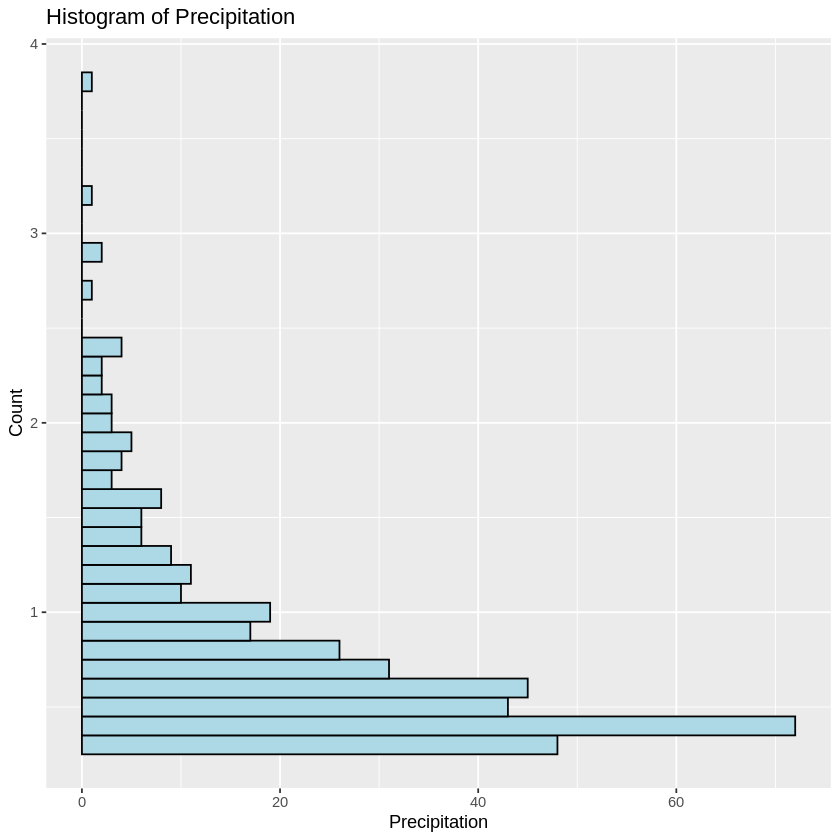

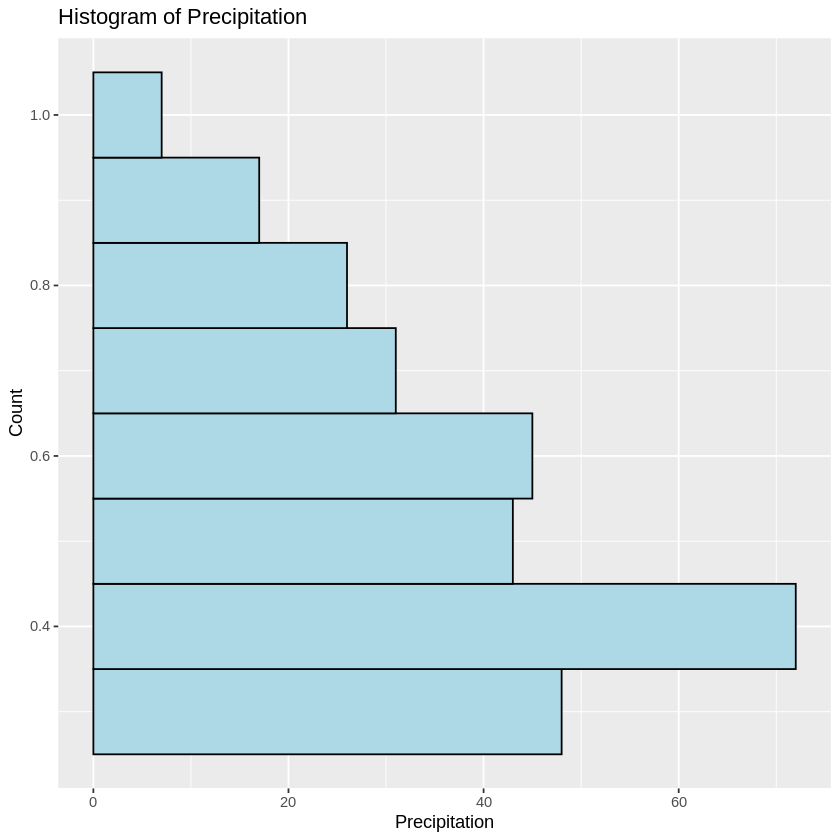

In [116]:
# reduce range of prcp values
prcp_data %>%
  filter(prcp > 0.2937) %>%
  ggplot(aes(y = prcp)) +
    geom_histogram(binwidth = 0.1, fill = "lightblue", color = "black") +
    labs(title = "Histogram of Precipitation", x = "Precipitation", y = "Count")

# reduce range of prcp values
prcp_data %>%
  filter(prcp > 0.2937 & prcp <= 1.0) %>%
  ggplot(aes(y = prcp)) +
    geom_histogram(binwidth = 0.1, fill = "lightblue", color = "black") +
    labs(title = "Histogram of Precipitation", x = "Precipitation", y = "Count")

In [117]:
# final check - testing the correlation between prcp and number of collisions.
cor(collision_data_NA$prcp, collision_data_NA$NUM_COLLISIONS, use = "complete.obs" )

[1] 0.01459926

Precipitation data (prcp) is often skewed, with many zeros and occasional high values. In such cases, the median is a more reliable measure of central tendency than the mean. The median is less influenced by outliers and extreme values, making it a better choice for imputing missing data in skewed distributions.

In [118]:
median_prcp <- 0.11

# setting NA values to median : 0.11
collision_data_NA <- collision_data_NA %>%
  mutate(prcp = if_else(is.na(prcp), median_prcp, prcp))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1213  0.0650  3.7600 

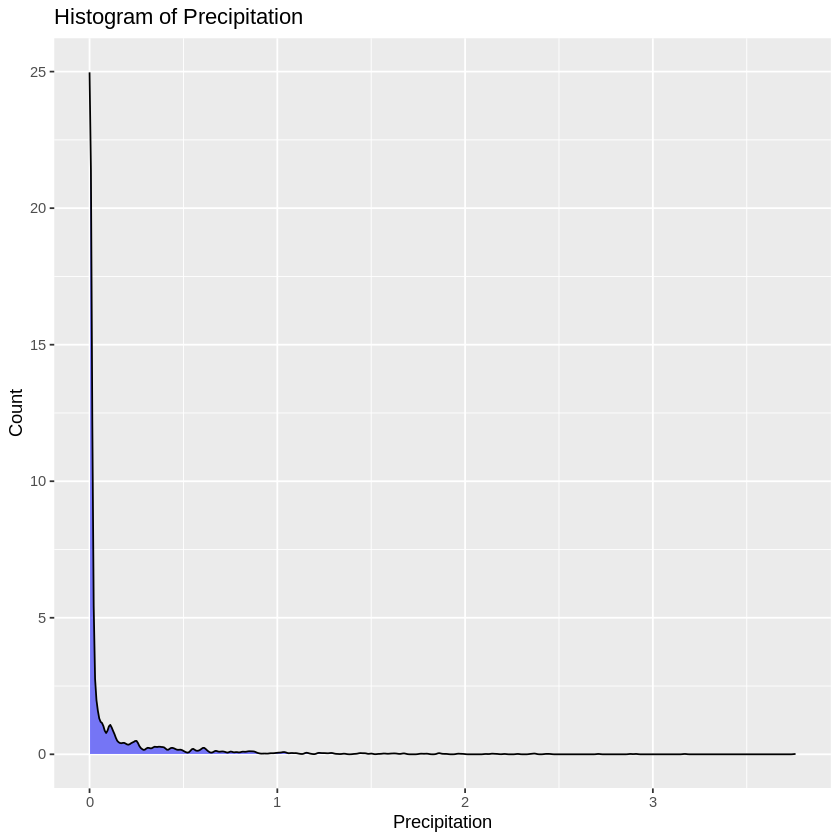

In [119]:
#summary check
summary(collision_data_NA$prcp)

# Plot of visual results.
ggplot(collision_data_NA, aes(x = prcp)) +
  geom_density(fill = "blue", alpha = 0.5) +
  labs(title = "Histogram of Precipitation", x = "Precipitation", y = "Count")

### Maximum sustained wind speed [mxspd]


In [120]:
summary(collision_data_NA$mxpsd)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   5.10   13.00   15.90   17.13   20.00   49.00       3 

Because the NA values are a very low result. I can remove the records and proceed.

In [121]:
# remove the 'NA' for the missing values [mxpsd]
collision_data_NA <- collision_data_NA %>%
  filter(!is.na(mxpsd))

# Check summary
summary(collision_data_NA$mxpsd)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.10   13.00   15.90   17.13   20.00   49.00 

### Gust


In [122]:
# summary of the gust variables -> check count for NA values.
summary(collision_data_NA$gust)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  14.00   22.00   26.00   27.44   31.10   71.10    1132 

In [123]:
# Initial View() - grasp the relationship between gust and other variables
collision_data_NA %>%
  select(temp, dewp, wdsp, mxpsd, gust, prcp, visib, NUM_COLLISIONS) %>%
  filter(is.na(gust)) %>%
  head(20)

temp dewp wdsp mxpsd gust prcp visib NUM_COLLISIONS
1  20.3 10.4  8.1 14.0  NA   0.02  6.3  649           
2  27.8 15.2 11.5 15.9  NA   0.00 10.0  556           
3  27.1 14.3  4.2  8.9  NA   0.00 10.0  489           
4  35.0 24.4  4.3  8.9  NA   0.09 10.0  681           
5  39.9 37.6  5.3 11.1  NA   0.00  6.8  487           
6  37.3 33.7  3.3  8.0  NA   0.00  6.5  524           
7  43.4 43.2  9.5 18.1  NA   0.01  4.4  412           
8  40.8 39.3  5.9 11.1  NA   0.00  4.6  521           
9  43.0 36.7  9.4 15.0  NA   0.00  7.5  670           
10 33.0 19.1  7.9 14.0  NA   0.00 10.0  637           
11 37.4 28.7  7.1 12.0  NA   0.03 10.0  449           
12 31.6 19.4  9.4 15.0  NA   0.00 10.0  525           
13 31.6 20.4 10.4 15.9  NA   0.09 10.0  598           
14 35.5 30.5  8.4 12.0  NA   0.13  8.4  508           
15 32.3 17.7  7.9 13.0  NA   0.00 10.0  495           
16 36.0 35.2  7.7 14.0  NA   0.17  5.5  611           
17 35.1 31.1  8.1 15.0  NA   0.00  8.4  622           
18 31.7 25.8  8.9 13.0  NA   0.03  6.1  600           
19 39.0 26.6  8.0 13.0  NA   0.00 10.0  408           
20 33.5 24.0  5.3 15.0  NA   0.01  9.9  459

Based on correlations with wdsp, mxpsd, and gust. These variables will be focal point in filtering and gaining knowledge.

In [124]:
# filter - get a better grasp of the relations.
collision_data_NA %>%
  select(temp, wdsp, mxpsd, gust, NUM_COLLISIONS) %>%
  filter(temp >= 20 & temp <= 25) %>%
  filter(is.na(gust)) %>%
  head(20)

temp wdsp mxpsd gust NUM_COLLISIONS
1 20.3 8.1  14.0  NA   649           
2 21.9 8.5  15.9  NA   517           
3 24.2 9.3  15.9  NA   703           
4 20.6 8.4  21.0  NA   436           
5 24.8 8.3  12.0  NA   532           
6 23.1 5.1   8.9  NA   693           
7 24.1 5.2  11.1  NA   497

In [125]:
# filter - get a better grasp of the relations.
collision_data_NA %>%
  select(temp, wdsp, mxpsd, gust, NUM_COLLISIONS) %>%
  filter(temp >= 30 & temp <= 35) %>%
  filter(is.na(gust)) %>%
  head(10)

temp wdsp mxpsd gust NUM_COLLISIONS
1  35.0  4.3  8.9  NA   681           
2  33.0  7.9 14.0  NA   637           
3  31.6  9.4 15.0  NA   525           
4  31.6 10.4 15.9  NA   598           
5  32.3  7.9 13.0  NA   495           
6  31.7  8.9 13.0  NA   600           
7  33.5  5.3 15.0  NA   459           
8  33.5  8.3 17.1  NA   625           
9  32.3  4.7 11.1  NA   451           
10 33.5  6.5  8.9  NA   658

In [126]:
# filter - get a better grasp of the relations.
collision_data_NA %>%
  select(temp, wdsp, mxpsd, gust, NUM_COLLISIONS) %>%
  filter(wdsp >= 5 & wdsp <= 10) %>%
  filter(is.na(gust)) %>%
  head(10)

# 2nd level - remove NA and focus on wdsp, mxpsd with similar values
collision_data_NA %>%
  select(temp, wdsp, mxpsd, gust, NUM_COLLISIONS) %>%
  filter(wdsp >= 5 & wdsp <= 10) %>%
  filter(!is.na(gust)) %>%
  head(10)

temp wdsp mxpsd gust NUM_COLLISIONS
1  20.3 8.1  14.0  NA   649           
2  39.9 5.3  11.1  NA   487           
3  43.4 9.5  18.1  NA   412           
4  40.8 5.9  11.1  NA   521           
5  43.0 9.4  15.0  NA   670           
6  33.0 7.9  14.0  NA   637           
7  37.4 7.1  12.0  NA   449           
8  31.6 9.4  15.0  NA   525           
9  35.5 8.4  12.0  NA   508           
10 32.3 7.9  13.0  NA   495

temp wdsp mxpsd gust NUM_COLLISIONS
1  22.0 8.1  15.9  24.1 657           
2  27.3 7.4  14.0  20.0 507           
3  29.2 8.5  13.0  20.0 519           
4  42.3 7.5  17.1  20.0 475           
5  44.3 9.7  18.1  24.1 563           
6  45.9 9.3  15.9  21.0 554           
7  40.9 6.3  14.0  29.9 580           
8  27.1 8.8  13.0  17.1 341           
9  32.1 9.6  13.0  22.9 506           
10 39.4 8.6  14.0  20.0 491

Here i will use subsets to determine the best correlation between gust and number of collisions

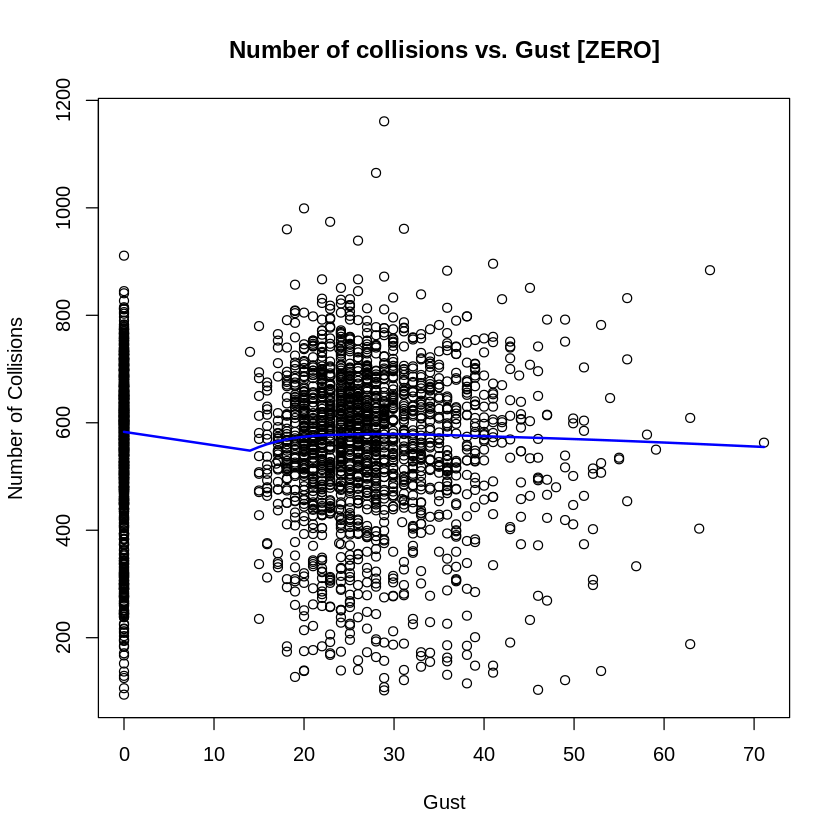

In [127]:
# Create gust = 0 subset for testing the importance towards number of collisions.
gust_NA_zero <- collision_data_NA %>%
  mutate(gust = if_else(is.na(gust), 0, gust))

#plot graph - show results of dataset
plot(gust_NA_zero$gust, gust_NA_zero$NUM_COLLISIONS,
main="Number of collisions vs. Gust [ZERO]",
type = "p",
xlab="Gust", ylab="Number of Collisions",
)

lines(lowess(gust_NA_zero$gust, gust_NA_zero$NUM_COLLISIONS), col = "blue", lwd = 2)

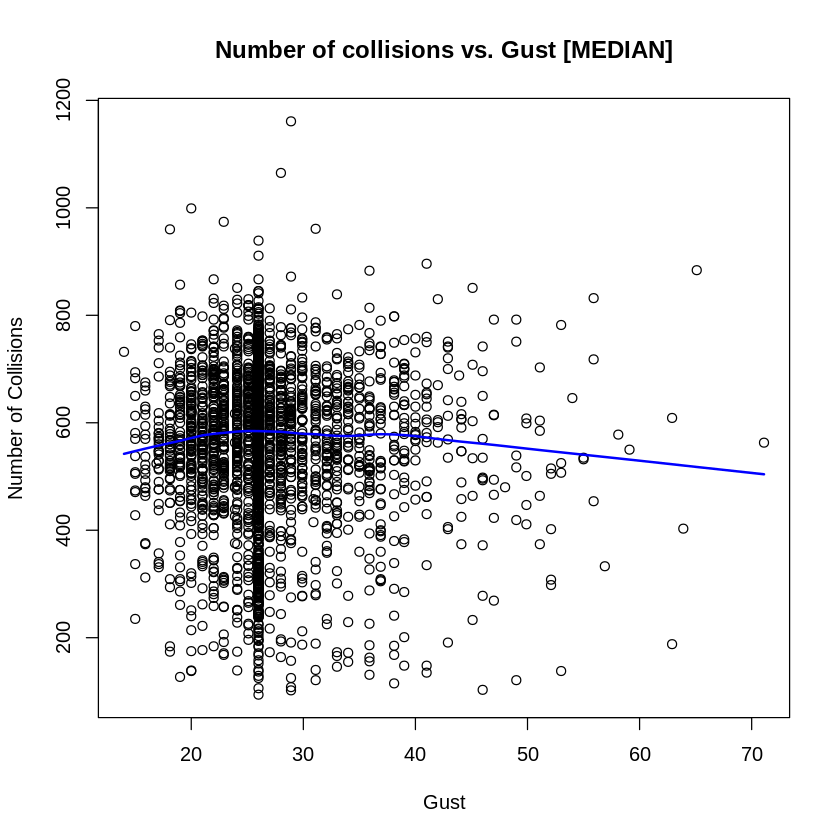

In [128]:
# Create gust = median (26.00) subset for testing the importance towards number of collisions.
gust_NA_median <- collision_data_NA %>%
  mutate(gust = if_else(is.na(gust), 26.00, gust))

#plot graph - show results of dataset
plot(gust_NA_median$gust, gust_NA_median$NUM_COLLISIONS,
main="Number of collisions vs. Gust [MEDIAN]",
type = "p",
xlab="Gust", ylab="Number of Collisions",
)

lines(lowess(gust_NA_median$gust, gust_NA_median$NUM_COLLISIONS), col = "blue", lwd = 2)

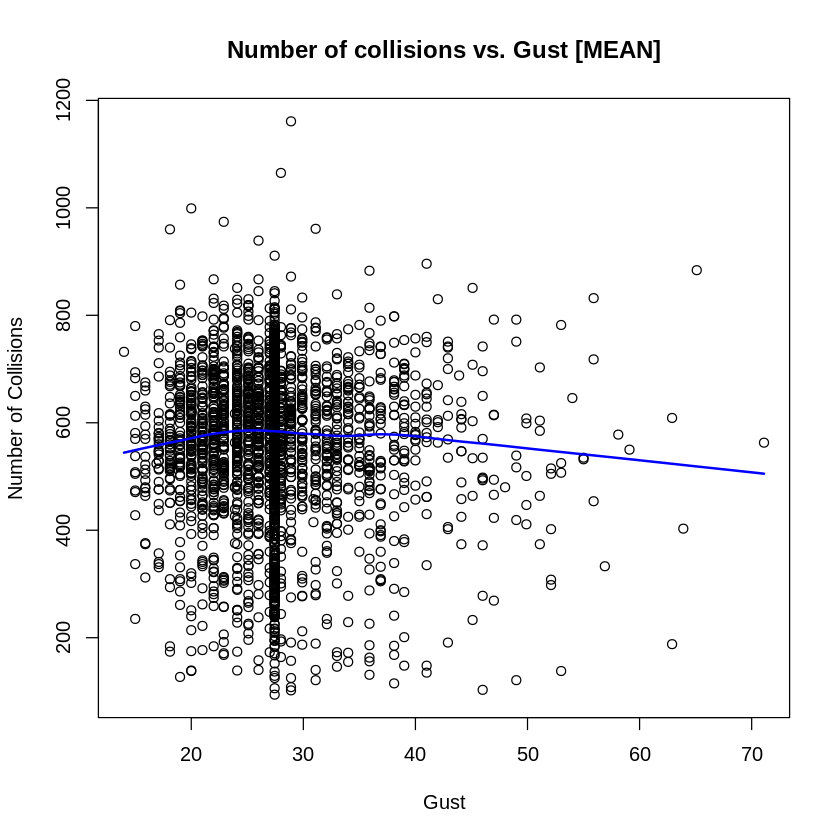

In [129]:
# Create gust = mean (27.44) subset for testing the importance towards number of collisions.
gust_NA_mean <- collision_data_NA %>%
  mutate(gust = if_else(is.na(gust), 27.44, gust))

#plot graph - show results of dataset
plot(gust_NA_mean$gust, gust_NA_mean$NUM_COLLISIONS,
main="Number of collisions vs. Gust [MEAN]",
type = "p",
xlab="Gust", ylab="Number of Collisions",
)

lines(lowess(gust_NA_mean$gust, gust_NA_mean$NUM_COLLISIONS), col = "blue", lwd = 2)

In [130]:
cor(collision_data$gust, collision_data$NUM_COLLISIONS, use = "complete.obs")
cor(collision_data_NA$gust, collision_data_NA$NUM_COLLISIONS, use = "complete.obs")

[1] 0.003728972

[1] -0.03867614

In [131]:
# compare gust values with impuatation methods.
cor(gust_NA_zero$gust, gust_NA_zero$NUM_COLLISIONS, use = "complete.obs")
cor(gust_NA_median$gust, gust_NA_median$NUM_COLLISIONS, use = "complete.obs")
cor(gust_NA_mean$gust, gust_NA_mean$NUM_COLLISIONS, use = "complete.obs")

[1] -0.01657675

[1] -0.03148892

[1] -0.03122619

Very little significance - highest correlation being NA values dataset (-0.4%)

However, i could test whether 'gust' variable can be calculated from having 'wdsp' and 'mxpsd' available.

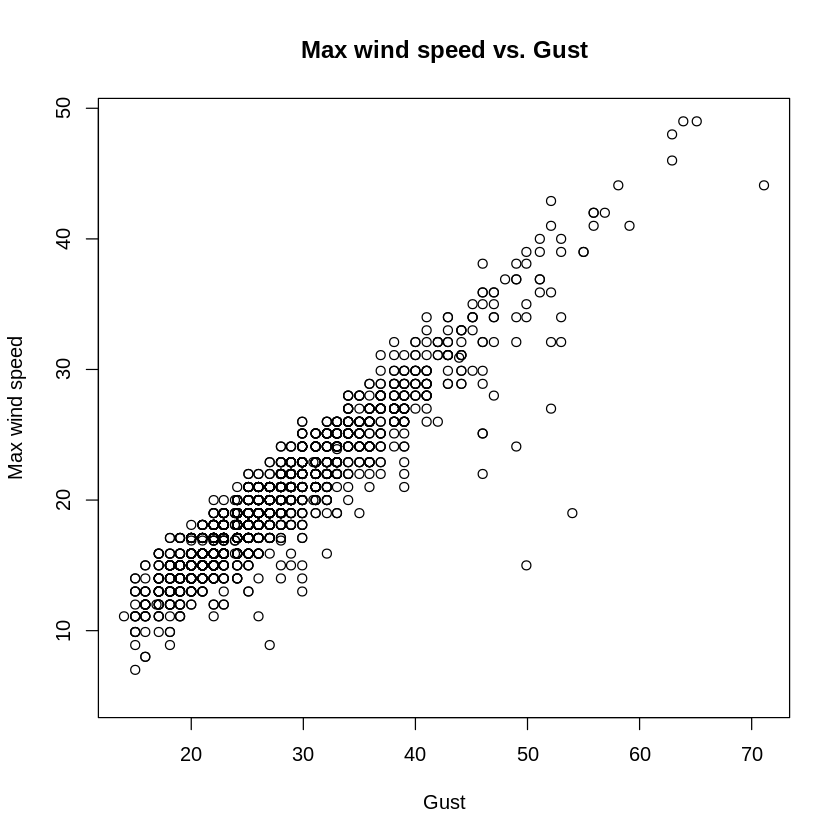

In [132]:
# determine whether setting mxpsd as value for gust NA's
plot(collision_data_NA$gust, collision_data_NA$mxpsd,
main="Max wind speed vs. Gust",
type = "p",
xlab="Gust", ylab="Max wind speed",
)

In [133]:
collision_data_NA %>%
  select(wdsp, mxpsd, gust) %>%
  head()

wdsp mxpsd gust
1 12.9 20.0  31.1
2 15.0 18.1  25.1
3 11.8 15.9  22.9
4 12.1 26.0  35.9
5 22.4 28.0  39.0
6 14.8 21.0  29.9

It seems the gust value is always larger than the maximum sustained wind speed. Therefore setting the gust variable equal to that of its mxpsd counterpart would be the incorrect solution.

sustained wind is typically the average over 2 minutes. Gust is a measure that last less than 20 seconds (Adame, 2020).

Yadav (2020) notes that gusts are around 30% stronger.

In [134]:
# check whether mxpsd has a greater value -> gust value.
mxpsd_gust_check <- collision_data_NA %>%
  select(wdsp, mxpsd, gust) %>%
  filter(!is.na(gust)) %>%
  filter(mxpsd > gust) %>%
  summary()

#print result
mxpsd_gust_check

      wdsp         mxpsd          gust    
 Min.   : NA   Min.   : NA   Min.   : NA  
 1st Qu.: NA   1st Qu.: NA   1st Qu.: NA  
 Median : NA   Median : NA   Median : NA  
 Mean   :NaN   Mean   :NaN   Mean   :NaN  
 3rd Qu.: NA   3rd Qu.: NA   3rd Qu.: NA  
 Max.   : NA   Max.   : NA   Max.   : NA  

The NA values within the summary indicates that mxpsd never is greater than gust. Therefore setting gust to 0 might not be the best solution.

In [135]:
# testing 30% gust increase.
gust_test_30percentage <- collision_data_NA %>%
  mutate(gust = if_else(is.na(gust), mxpsd * 1.3, gust))

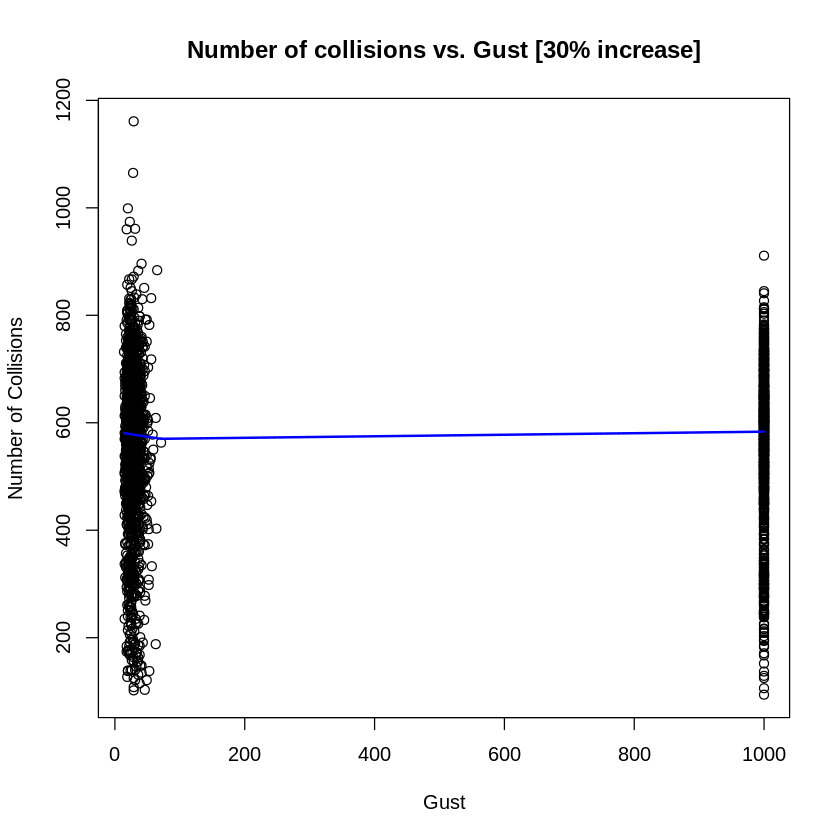

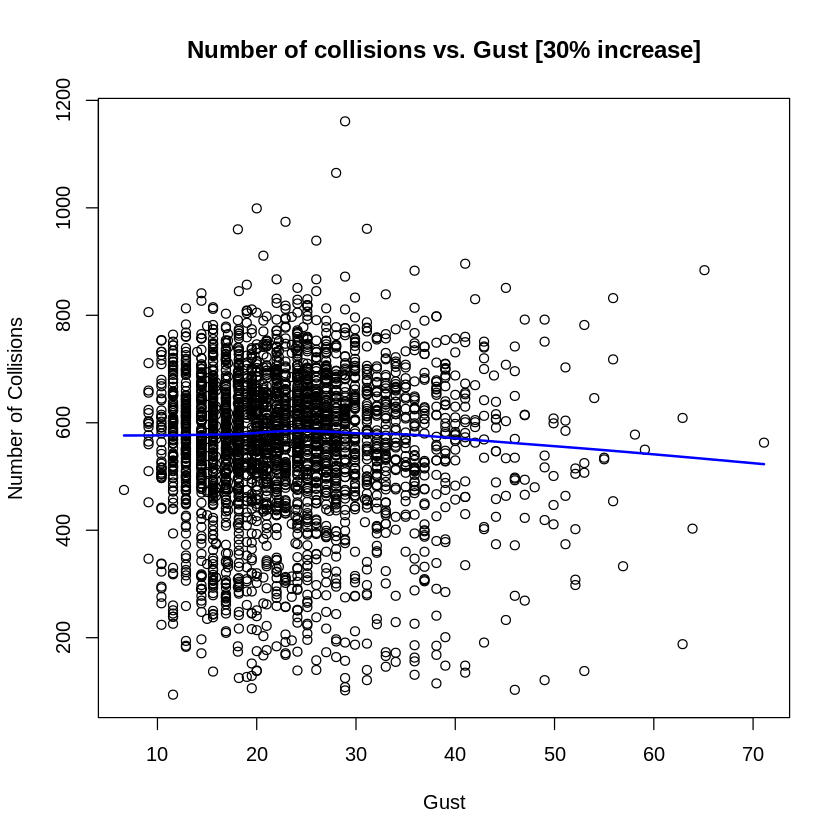

In [136]:
#plot graph - show results of dataset [1st DATESET] - Collision_data
plot(collision_data$gust, collision_data$NUM_COLLISIONS,
main="Number of collisions vs. Gust [30% increase]",
type = "p",
xlab="Gust", ylab="Number of Collisions",
)

lines(lowess(collision_data$gust, collision_data$NUM_COLLISIONS), col = "blue", lwd = 2)

#plot graph - show results of dataset
plot(gust_test_30percentage$gust, gust_test_30percentage$NUM_COLLISIONS,
main="Number of collisions vs. Gust [30% increase]",
type = "p",
xlab="Gust", ylab="Number of Collisions",
)

lines(lowess(gust_test_30percentage$gust, gust_test_30percentage$NUM_COLLISIONS), col = "blue", lwd = 2)

In [137]:
summary(collision_data_NA$gust)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  14.00   22.00   26.00   27.44   31.10   71.10    1132 

In [138]:
summary(gust_test_30percentage$gust)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.63   16.90   22.00   23.21   28.00   71.10 

In [139]:
# testing cor() results of testing 30% solution
cor(gust_test_30percentage$gust, gust_test_30percentage$NUM_COLLISIONS, use = "complete.obs")

# zero values
cor(gust_NA_zero$gust, gust_NA_zero$NUM_COLLISIONS, use = "complete.obs")

[1] -0.02025023

[1] -0.01657675

Setting gust 30% seems logical from investigation on data

In [140]:
# setting final gust value -> proceed with analysis
collision_data_NA <- collision_data_NA %>%
  mutate(gust = if_else(is.na(gust), mxpsd * 1.3, gust))

In [141]:
summary(collision_data_NA)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.999   Mean   :2016   Mean   : 6.694   Mean   :15.73  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2020   Max.   :12.000   Max.   :31.00  
 collision_date            temp            dewp            slp      
 Min.   :2012-07-01   Min.   : 5.80   Min.   :-6.70   Min.   : 989  
 1st Qu.:2014-08-14   1st Qu.:41.20   1st Qu.:32.50   1st Qu.:1012  
 Median :2016-10-01   Median :52.50   Median :45.70   Median :1017  
 Mean   :2016-09-30   Mean   :52.24   Mean   :44.66   Mean   :1017  
 3rd Qu.:2018-11-16   3rd Qu.:64.70   3rd Qu.:59.00   3rd Qu.:1022  
 Max.   :2020-12-31   Max.   :86.70   Max.   :74.10   Max.   :1044  
     visib             wdsp           mxpsd            gust   

### Patterns - Year

In [142]:
summary(collision_data_NA$year)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2012    2014    2016    2016    2018    2020 

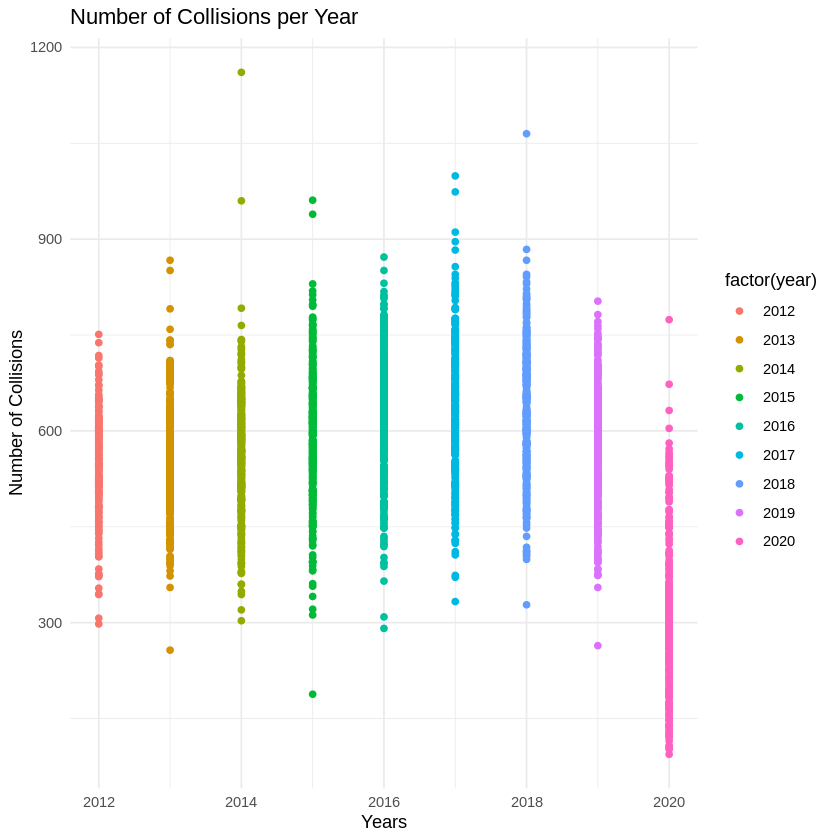

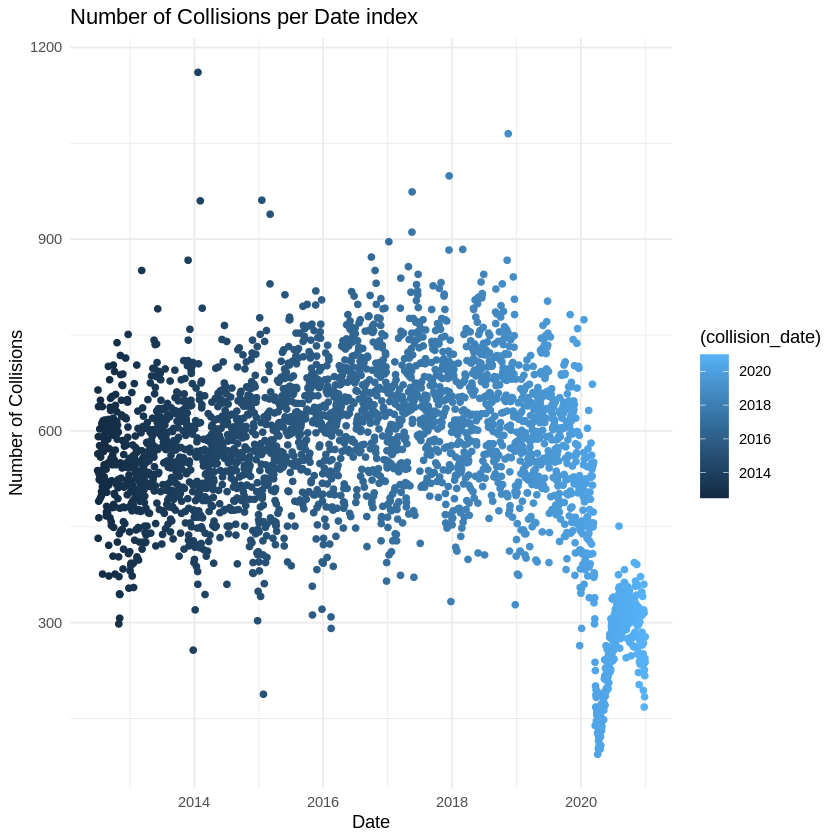

In [143]:
# visual display - clarity for removing year 2020 from dataset
ggplot(collision_data_NA, aes(x = year, y = NUM_COLLISIONS, color = factor(year))) +
  geom_point() +
  labs(title = "Number of Collisions per Year", x ="Years", y = "Number of Collisions") +
  theme_minimal()

# dates
ggplot(collision_data_NA, aes(x = collision_date, y = NUM_COLLISIONS, color = (collision_date))) +
  geom_point() +
  labs(title = "Number of Collisions per Date index", x ="Date", y = "Number of Collisions") +
  theme_minimal()

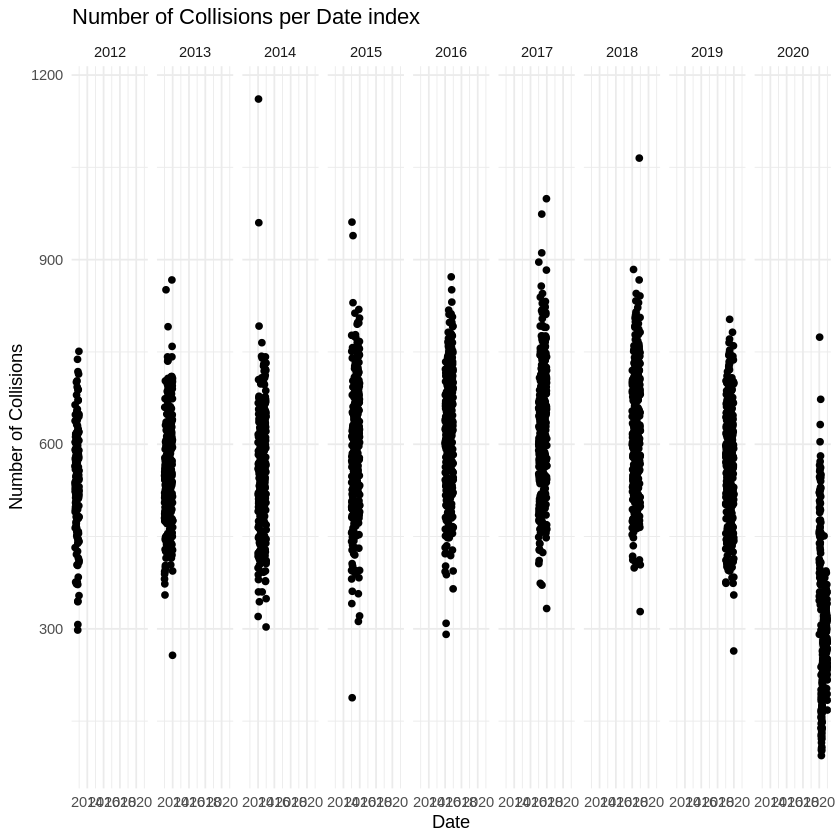

In [144]:
# dates - split
ggplot(collision_data_NA, aes(x = collision_date, y = NUM_COLLISIONS)) +
  geom_point() +
  facet_wrap(~ year, nrow = 1) +
  labs(title = "Number of Collisions per Date index", x ="Date", y = "Number of Collisions") +
  theme_minimal()

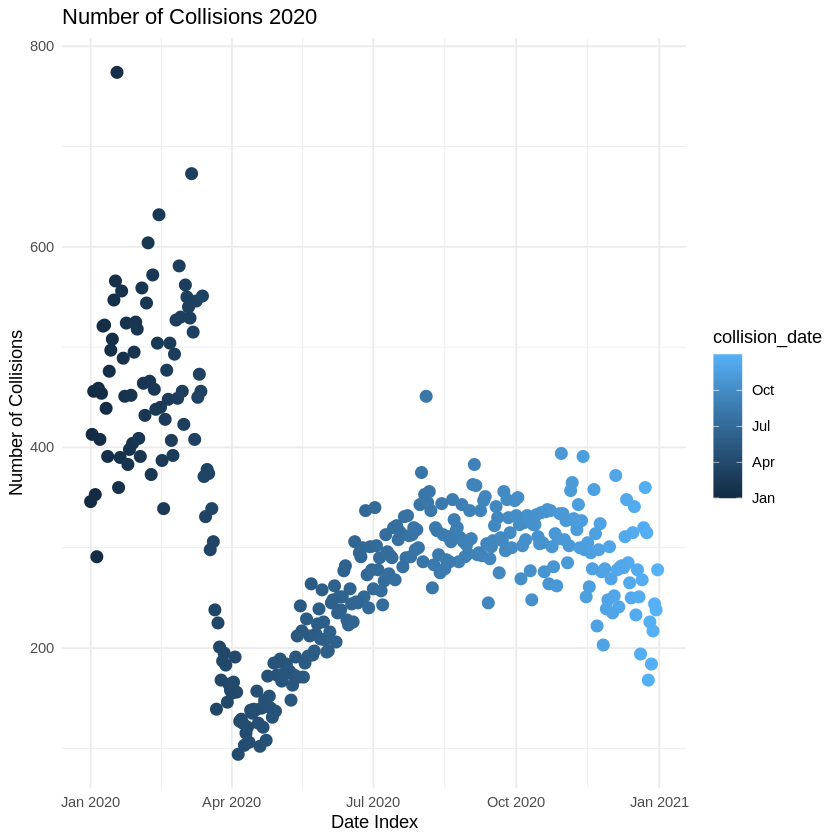

In [145]:
#2020
y2020 <- collision_data_NA %>%
  filter(year == 2020)

# 2020 - plot display
ggplot(y2020, aes(x = collision_date, y = NUM_COLLISIONS, color = collision_date)) +
  geom_point(size = 3) +
  labs(title = "Number of Collisions 2020", x ="Date Index", y = "Number of Collisions") +
  theme_minimal()

Next, compare against last year [2019]

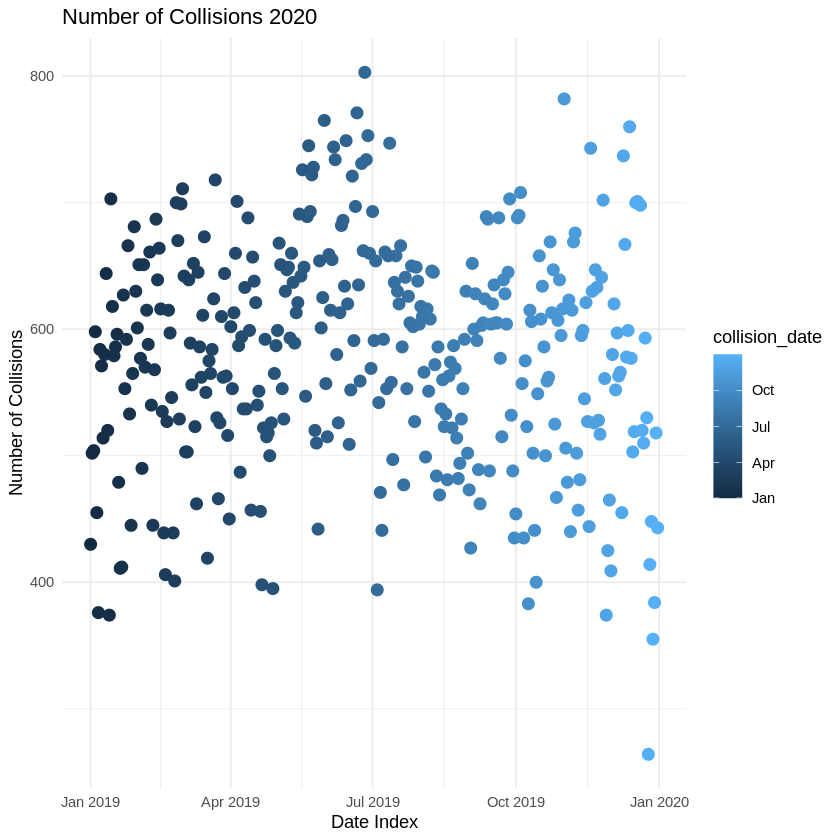

In [146]:
#2019
y2019 <- collision_data_NA %>%
  filter(year == 2019)

#2019
ggplot(y2019, aes(x = collision_date, y = NUM_COLLISIONS, color = collision_date)) +
  geom_point(size = 3) +
  labs(title = "Number of Collisions 2020", x ="Date Index", y = "Number of Collisions") +
  theme_minimal()

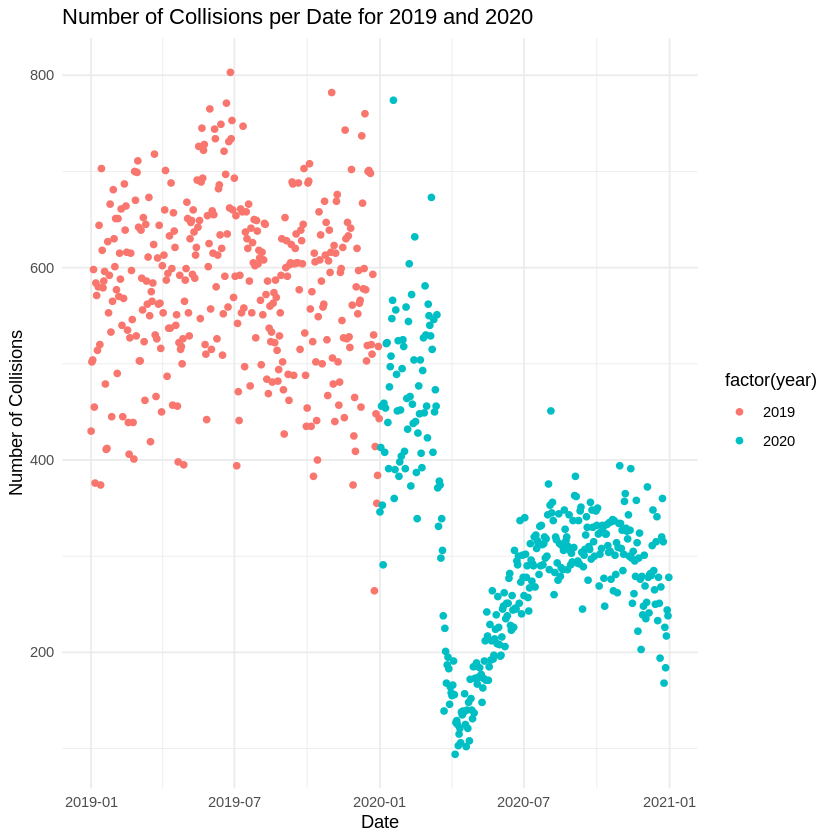

In [147]:
y2019_2020_joined <- rbind(y2019, y2020)

# visual display of difference
ggplot(y2019_2020_joined, aes(x = collision_date, y = NUM_COLLISIONS, color = factor(year))) +
  geom_point() +
  labs(title = "Number of Collisions per Date for 2019 and 2020",
       x = "Date",
       y = "Number of Collisions") +
  theme_minimal()

Here you can clearly see the pattern change during these 2 years. Therefore, the best solution to help maintain a linear pattern is to remove the year 2020 from the dataset.

In [148]:
# remove 2020 from data
collision_data_rm_2020 <- collision_data_NA %>%
  filter(year != 2020)

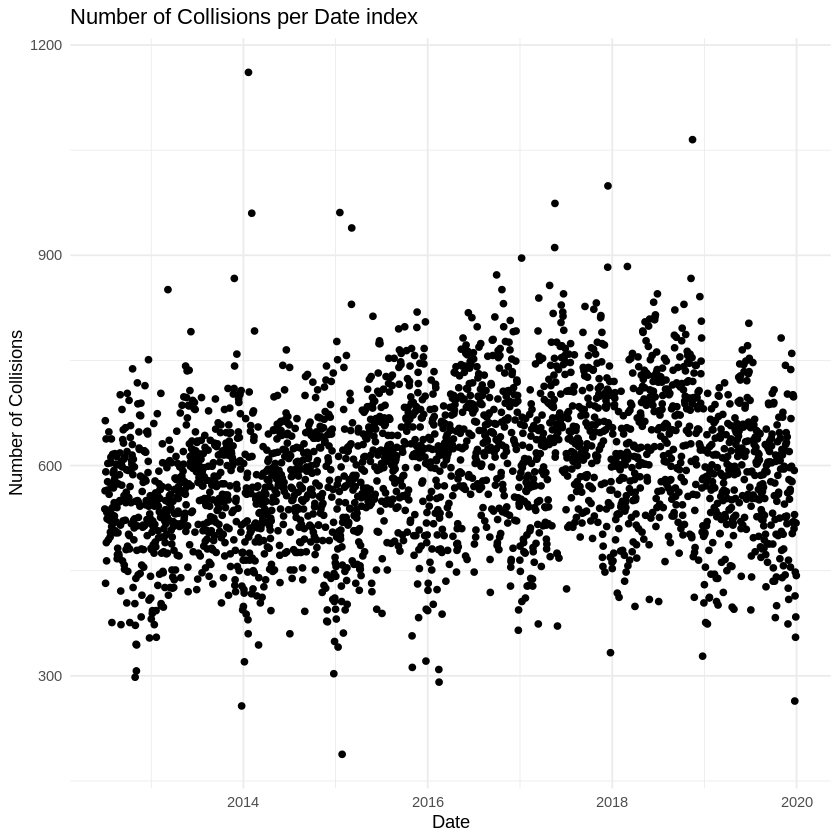

In [149]:
# display - 2020 excluded
ggplot(collision_data_rm_2020, aes(x = collision_date, y = NUM_COLLISIONS)) +
  geom_point() +
  labs(title = "Number of Collisions per Date index", x ="Date", y = "Number of Collisions") +
  theme_minimal()

#### Subset each Year

In [150]:
#2012
y2012 <- collision_data_rm_2020 %>%
  filter(year == 2012)
#2013
y2013 <- collision_data_rm_2020 %>%
  filter(year == 2013)
#2014
y2014 <- collision_data_rm_2020 %>%
  filter(year == 2014)
#2015
y2015 <- collision_data_rm_2020 %>%
  filter(year == 2015)
#2016
y2016 <- collision_data_rm_2020 %>%
  filter(year == 2016)
#2017
y2017 <- collision_data_rm_2020 %>%
  filter(year == 2017)
#2018
y2018 <- collision_data_rm_2020 %>%
  filter(year == 2018)

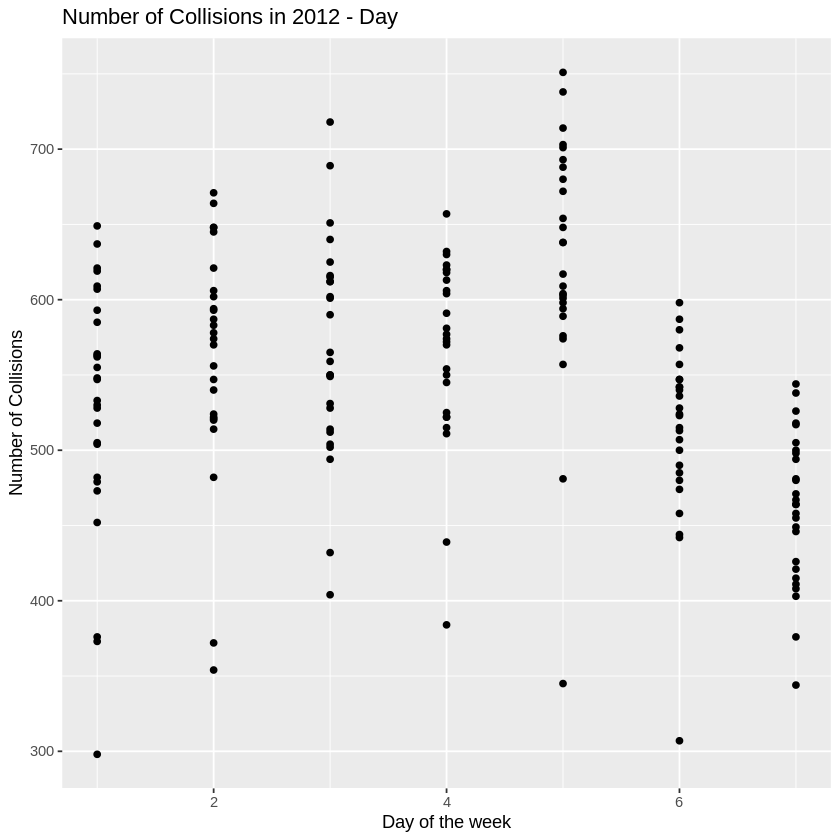

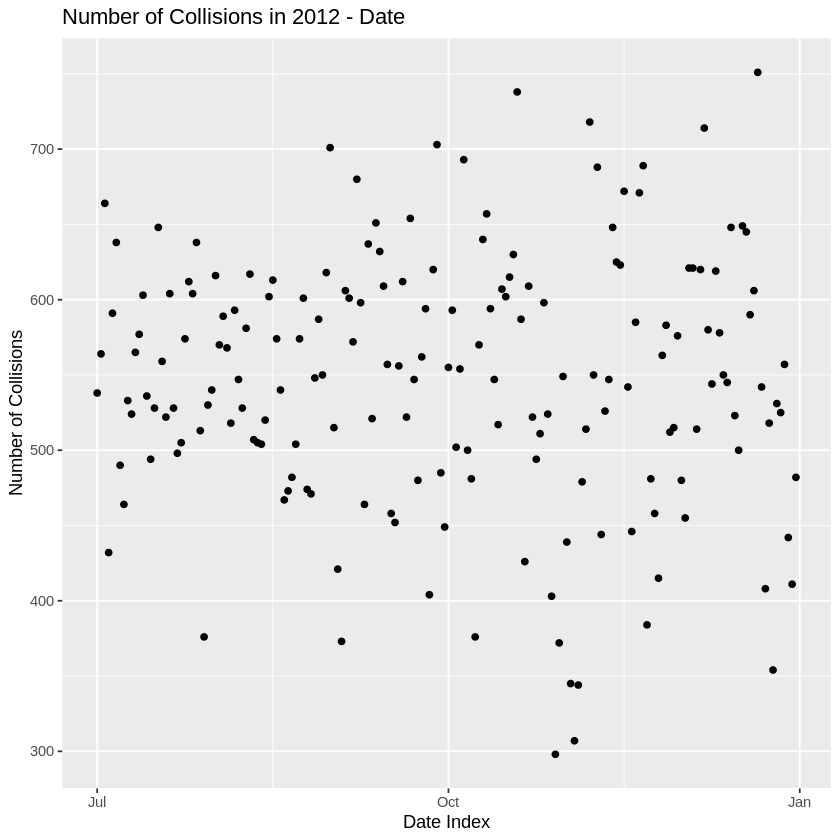

In [151]:
# closer look at 2012
ggplot(y2012, aes(x = day, y = NUM_COLLISIONS)) +
  geom_point() +
  labs(title = "Number of Collisions in 2012 - Day", x ="Day of the week", y = "Number of Collisions")

#date index
ggplot(y2012, aes(x = collision_date, y = NUM_COLLISIONS)) +
  geom_point() +
  labs(title = "Number of Collisions in 2012 - Date ", x ="Date Index", y = "Number of Collisions")

In [152]:
# correlation for day, and number of collisions.
cor(y2012$day, y2012$NUM_COLLISIONS, use = "complete.obs")
cor(y2013$day, y2013$NUM_COLLISIONS, use = "complete.obs")
cor(y2014$day, y2014$NUM_COLLISIONS, use = "complete.obs")
cor(y2015$day, y2015$NUM_COLLISIONS, use = "complete.obs")
cor(y2016$day, y2016$NUM_COLLISIONS, use = "complete.obs")
cor(y2017$day, y2017$NUM_COLLISIONS, use = "complete.obs")
cor(y2018$day, y2018$NUM_COLLISIONS, use = "complete.obs")
cor(y2019$day, y2019$NUM_COLLISIONS, use = "complete.obs")


[1] -0.2106745

[1] -0.2659763

[1] -0.3287367

[1] -0.2912656

[1] -0.334233

[1] -0.2910482

[1] -0.3301688

[1] -0.3207047

All results are negative correlations

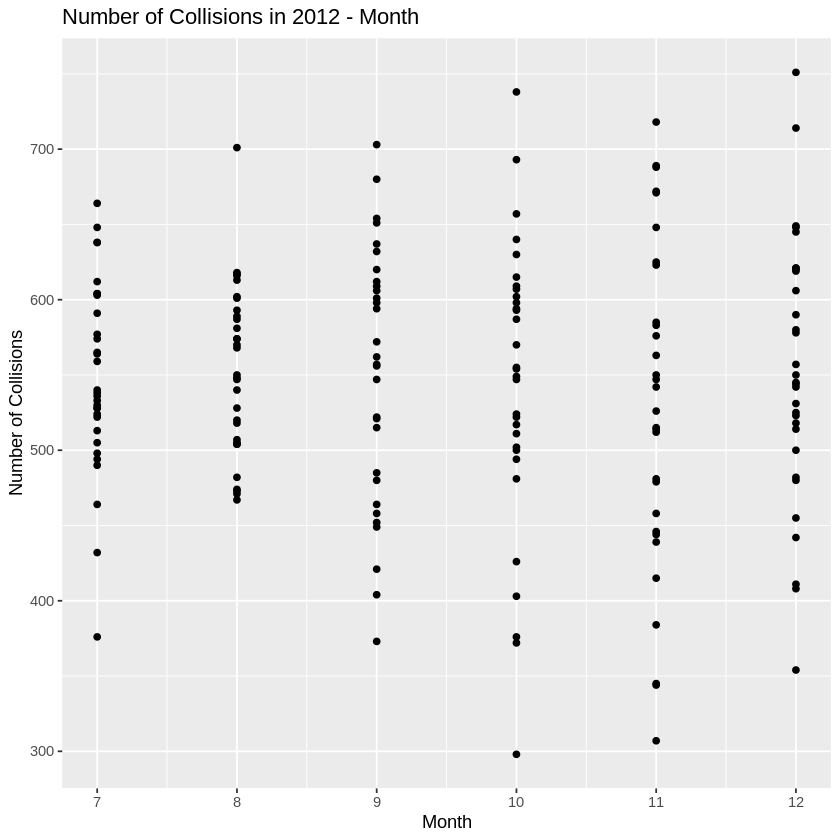

In [153]:
#month
ggplot(y2012, aes(x = mo, y = NUM_COLLISIONS)) +
  geom_point() +
  labs(title = "Number of Collisions in 2012 - Month", x ="Month", y = "Number of Collisions")

2012 Month - Graph results indicate starting month in 2012 is July (7).

In [154]:
# summary check
summary(y2012$mo)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  7.000   8.000   9.500   9.495  11.000  12.000 

In [155]:
# filter check for data before July (7)
y2012 %>%
  select(mo) %>%
  filter(mo < 7) %>%
  head()

mo

Because 2012 is not a full year worth of data. I will remove this year as well.

In [156]:
# remove 2020 from data
collision_data_rm_2020 <- collision_data_rm_2020 %>%
  filter(year != 2012)

`geom_smooth()` using formula = 'y ~ x'


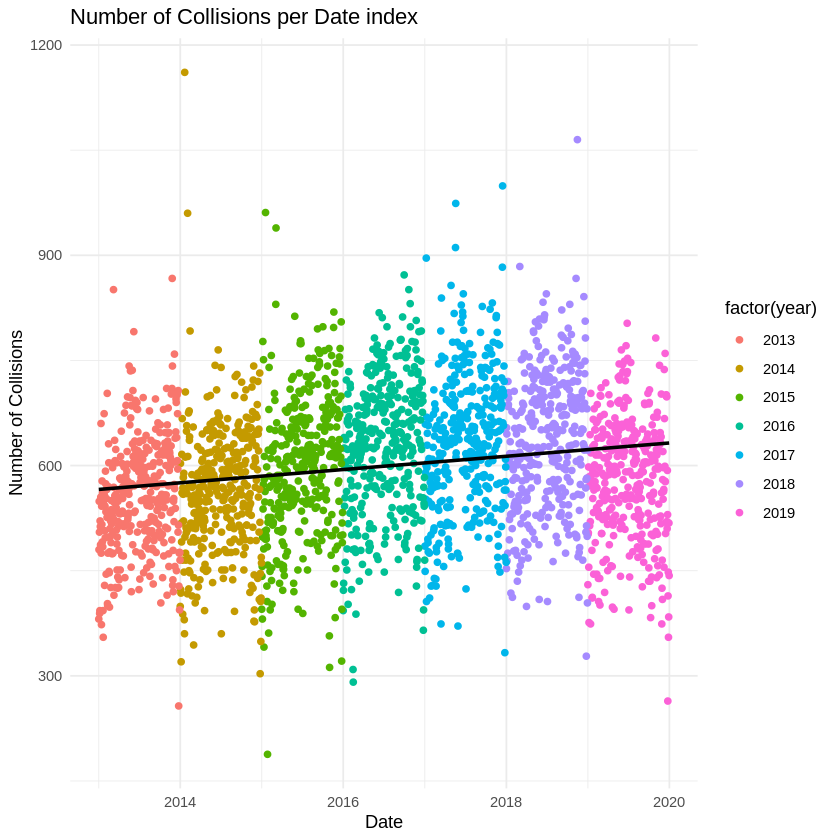

In [157]:
# removed both 2012 and 2020 from the dataset
# visual display of result.
ggplot(collision_data_rm_2020, aes(x = collision_date, y = NUM_COLLISIONS, color = factor(year))) +
  geom_point() +
  # create linear line to showcase the pattern
  geom_smooth(method = "lm", color = "black", se = FALSE) +
  labs(title = "Number of Collisions per Date index", x ="Date", y = "Number of Collisions") +
  theme_minimal()

The result - shows a positive linear line from 2013 to 2019.

# Cleaned Data - Weather

Determine best weather variable for model.

In [174]:
summary(collision_data_rm_2020)

      day             year            mo               da       
 Min.   :1.000   Min.   :2013   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.999   Mean   :2016   Mean   : 6.518   Mean   :15.73  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2019   Max.   :12.000   Max.   :31.00  
 collision_date            temp            dewp            slp        
 Min.   :2013-01-01   Min.   : 5.80   Min.   :-6.70   Min.   : 989.5  
 1st Qu.:2014-09-30   1st Qu.:40.40   1st Qu.:32.10   1st Qu.:1012.2  
 Median :2016-07-03   Median :52.00   Median :45.30   Median :1016.7  
 Mean   :2016-07-01   Mean   :51.47   Mean   :44.15   Mean   :1016.8  
 3rd Qu.:2018-04-01   3rd Qu.:63.90   3rd Qu.:58.50   3rd Qu.:1021.8  
 Max.   :2019-12-31   Max.   :77.50   Max.   :74.10   Max.   :1044.2  
     visib             wdsp           mxpsd     

In [175]:
#corrleation matrix - numeric values
cor_df_numeric <- collision_data_rm_2020 %>%
  select(-collision_date) %>%
  select_if(is.numeric)

# cor() -> uses method="pearson" by default

# HELP DOC :  method: a character string indicating which correlation coefficient
#               (or covariance) is to be computed.  One of ‘"pearson"’
#               (default), ‘"kendall"’, or ‘"spearman"’: can be abbreviated.
cor(cor_df_numeric, use = "complete.obs")

day           year          mo            da           
day             1.0000000000 -0.0005870839  0.0007699147 -0.0003744771
year           -0.0005870839  1.0000000000  0.0010482187 -0.0006058564
mo              0.0007699147  0.0010482187  1.0000000000  0.0110293254
da             -0.0003744771 -0.0006058564  0.0110293254  1.0000000000
temp           -0.0076322983 -0.0049287381  0.3975759204  0.0158022550
dewp           -0.0137101689  0.0282645079  0.3562791985  0.0095338435
slp            -0.0042593044  0.0042639576  0.0690309600 -0.0229450323
visib           0.0194335155 -0.0137924859  0.0668107625  0.0155190363
wdsp           -0.0079001104  0.0364240121 -0.1438850261 -0.0214941305
mxpsd           0.0198335046  0.0336773108 -0.1505406596 -0.0268984376
gust            0.0196146657  0.0254264577 -0.1382819332 -0.0238541363
max            -0.0018081590  0.0202125465  0.3954901867  0.0215973021
min            -0.0118471716 -0.0181251245  0.3707412280  0.0141080764
prcp            0.0093962358  0.0189063200  0.0151005923 -0.0308462257
fog             0.0192771846  0.0298801738 -0.0580278157 -0.0205811075
NUM_COLLISIONS -0.2935767448  0.1715484786  0.1511081587 -0.0302985625
               temp         dewp         slp          visib       wdsp       
day            -0.007632298 -0.013710169 -0.004259304  0.01943352 -0.00790011
year           -0.004928738  0.028264508  0.004263958 -0.01379249  0.03642401
mo              0.397575920  0.356279199  0.069030960  0.06681076 -0.14388503
da              0.015802255  0.009533844 -0.022945032  0.01551904 -0.02149413
temp            1.000000000  0.967553579 -0.140862454 -0.20991679 -0.31960849
dewp            0.967553579  1.000000000 -0.181652329 -0.35381465 -0.30720194
slp            -0.140862454 -0.181652329  1.000000000  0.31939427 -0.32034201
visib          -0.209916794 -0.353814652  0.319394267  1.00000000 -0.13599529
wdsp           -0.319608491 -0.307201937 -0.320342013 -0.13599529  1.00000000
mxpsd          -0.372033986 -0.344135733 -0.334452800 -0.16403786  0.89154716
gust           -0.381716448 -0.359288265 -0.341117292 -0.15216144  0.87601405
max             0.969407654  0.921110606 -0.104619295 -0.15141945 -0.34246074
min             0.965033697  0.935077030 -0.181689699 -0.24782672 -0.26245710
prcp           -0.025707251  0.019516935 -0.284296300 -0.24431603  0.35537002
fog             0.243650379  0.336148993 -0.208956375 -0.71216674 -0.08058873
NUM_COLLISIONS  0.202551372  0.196524695 -0.057478478 -0.06932003 -0.01195551
               mxpsd       gust        max          min         prcp        
day             0.01983350  0.01961467 -0.001808159 -0.01184717  0.009396236
year            0.03367731  0.02542646  0.020212546 -0.01812512  0.018906320
mo             -0.15054066 -0.13828193  0.395490187  0.37074123  0.015100592
da             -0.02689844 -0.02385414  0.021597302  0.01410808 -0.030846226
temp           -0.37203399 -0.38171645  0.969407654  0.96503370 -0.025707251
dewp           -0.34413573 -0.35928826  0.921110606  0.93507703  0.019516935
slp            -0.33445280 -0.34111729 -0.104619295 -0.18168970 -0.284296300
visib          -0.16403786 -0.15216144 -0.151419449 -0.24782672 -0.244316030
wdsp            0.89154716  0.87601405 -0.342460743 -0.26245710  0.355370019
mxpsd           1.00000000  0.96855515 -0.384208231 -0.33248146  0.363414440
gust            0.96855515  1.00000000 -0.390497449 -0.34020694  0.355372770
max            -0.38420823 -0.39049745  1.000000000  0.92763246 -0.040069127
min            -0.33248146 -0.34020694  0.927632457  1.00000000  0.010554223
prcp            0.36341444  0.35537277 -0.040069127  0.01055422  1.000000000
fog            -0.03621712 -0.04186426  0.224746537  0.25766488  0.099738898
NUM_COLLISIONS -0.03440489 -0.03801725  0.203565471  0.19775176  0.008304895
               fog         NUM_COLLISIONS
day             0.01927718 -0.293576745  
year            0.02988017  0.171548479  
mo             -0.05802782  0.151108159  
da   

HIGHEST - positive
- temp (0.202551372) [highest]
- dewp (0.196524695)
- max (0.203565471) [highest]
- min (0.197751764)

LOWEST - Negative
- visib (-0.069320031)

TIME/DATE
- day (-0.293576745)

Day of the week will be looked at in detail to explain why it has a negative linear regression.

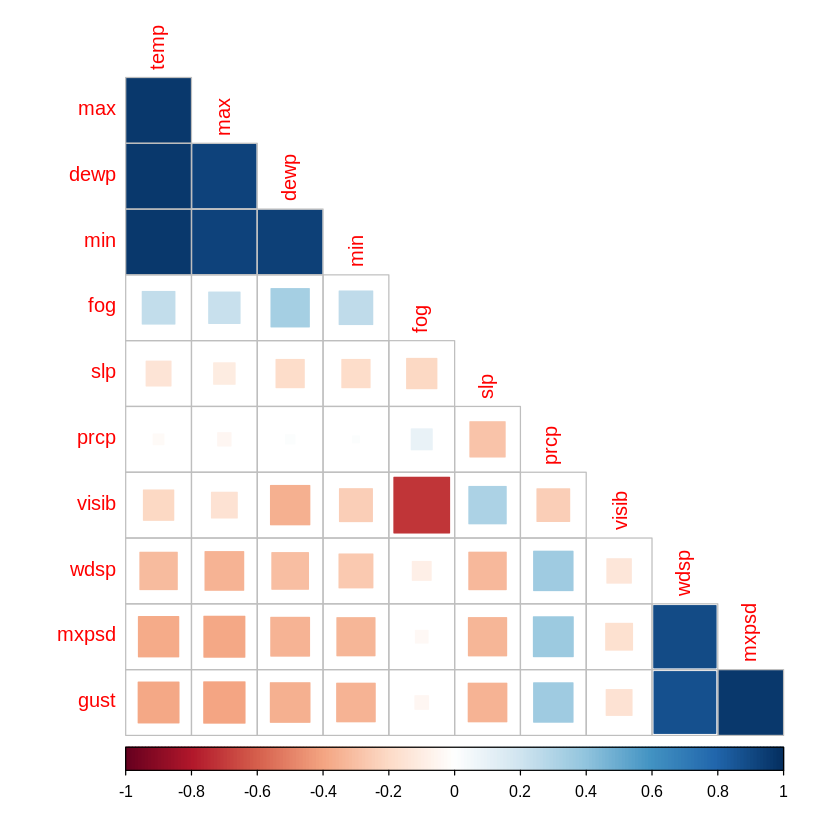

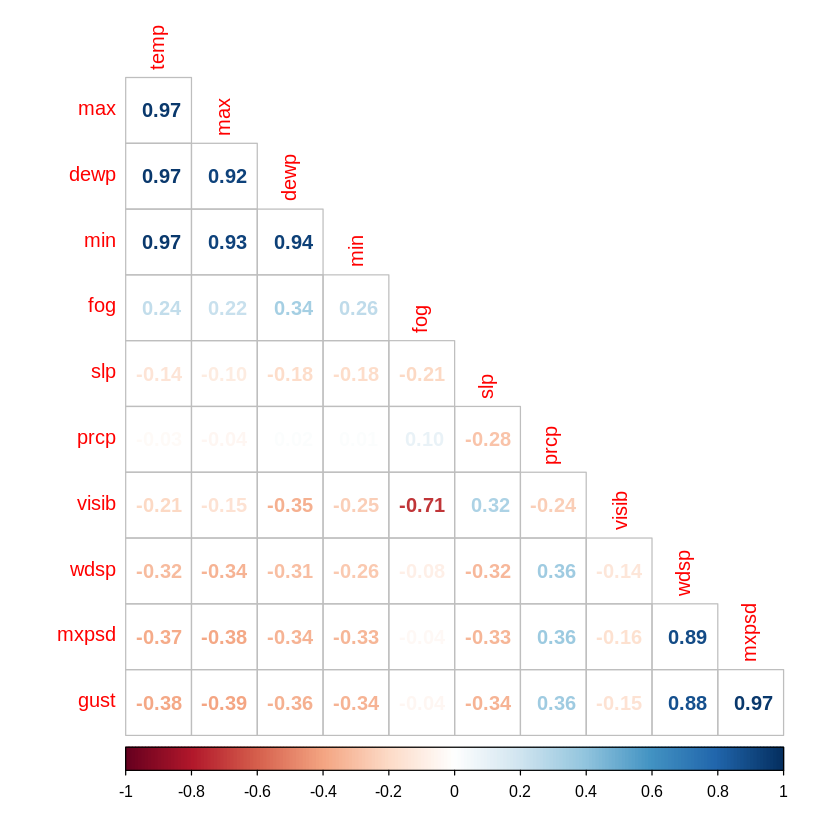

In [176]:
#checking correlation with weather variables - using correlation-matrix
weather_variables_v2 <- collision_data_rm_2020 %>%
  select(slp, temp, dewp, visib, wdsp, mxpsd, gust, max, min, prcp, fog)

# remove 'NA' values for now.
weather_variables_complete_v2 <- na.omit(weather_variables_v2)

# calculate correlation matrix
cor_matrix_v2 <- cor(weather_variables_complete_v2)

# Correlation matrix - weather relationships
corrplot(cor_matrix_v2, method = 'square', order = 'FPC', type = 'lower', diag = FALSE)

#numeric
corrplot(cor_matrix_v2, method = 'number', order = 'FPC', type = 'lower', diag = FALSE)

POSITIVE
- temp, max, min, dewp
- wdsp, mxpsd, gust

NEGATIVE
- visib, fog

### Wind Elements

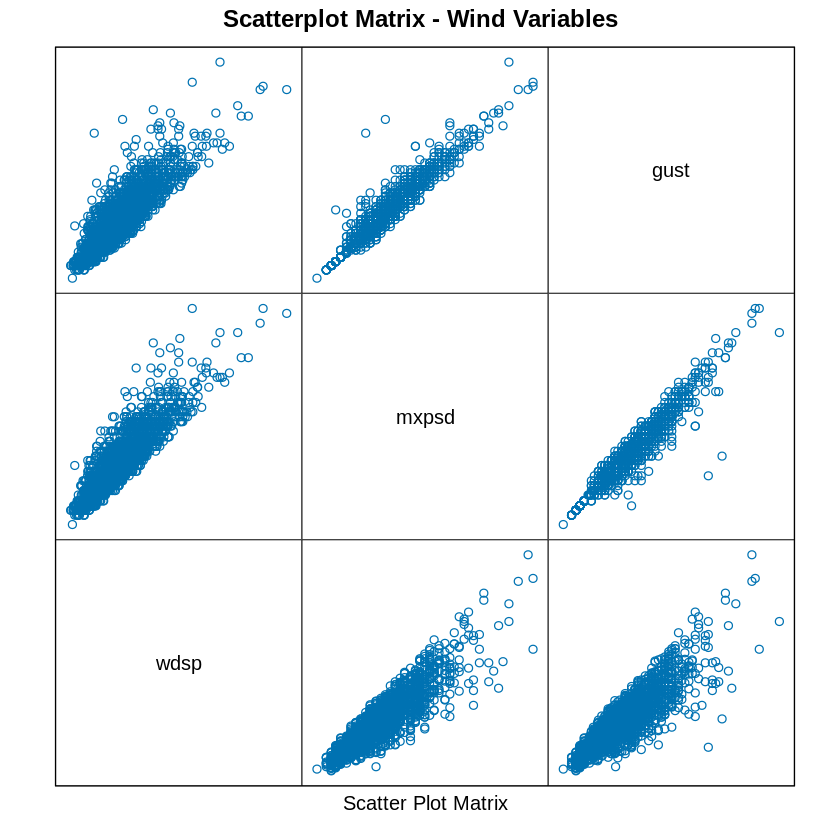

In [177]:
# subset - includes wind variables.
wind_variables <- collision_data_rm_2020[, c("wdsp", "mxpsd", "gust")]

#create scatterplot to show visual display
splom(~wind_variables,
  data = collision_data_NA,
  main = "Scatterplot Matrix - Wind Variables",
  axis.line.tck=0, axis.text.alpha=0, aspect=1
)

In [178]:
# Closer look at the relationship with 'wind' elements.
cor(collision_data_rm_2020$mxpsd, collision_data_rm_2020$gust,  use = "complete.obs")
cor(collision_data_rm_2020$mxpsd, collision_data_rm_2020$wdsp,  use = "complete.obs")
cor(collision_data_rm_2020$gust, collision_data_rm_2020$wdsp,  use = "complete.obs")

[1] 0.9685551

[1] 0.8915472

[1] 0.876014

In [179]:
# initial collision_data - Number of Collisions
cor(collision_data$wdsp, collision_data$NUM_COLLISIONS,  use = "complete.obs")
cor(collision_data$mxpsd, collision_data$NUM_COLLISIONS,  use = "complete.obs")
cor(collision_data$gust, collision_data$NUM_COLLISIONS,  use = "complete.obs")

[1] -0.008040703

[1] 0.0210856

[1] 0.003728972

In [180]:
# rm_2020 - clean version - Number of collisions
cor(collision_data_rm_2020$wdsp, collision_data_rm_2020$NUM_COLLISIONS,  use = "complete.obs")
cor(collision_data_rm_2020$mxpsd, collision_data_rm_2020$NUM_COLLISIONS,  use = "complete.obs")
cor(collision_data_rm_2020$gust, collision_data_rm_2020$NUM_COLLISIONS,  use = "complete.obs")

[1] -0.01195551

[1] -0.03440489

[1] -0.03801725

Very low correlation between number of collisions and wind elements.

### Temperature Elements

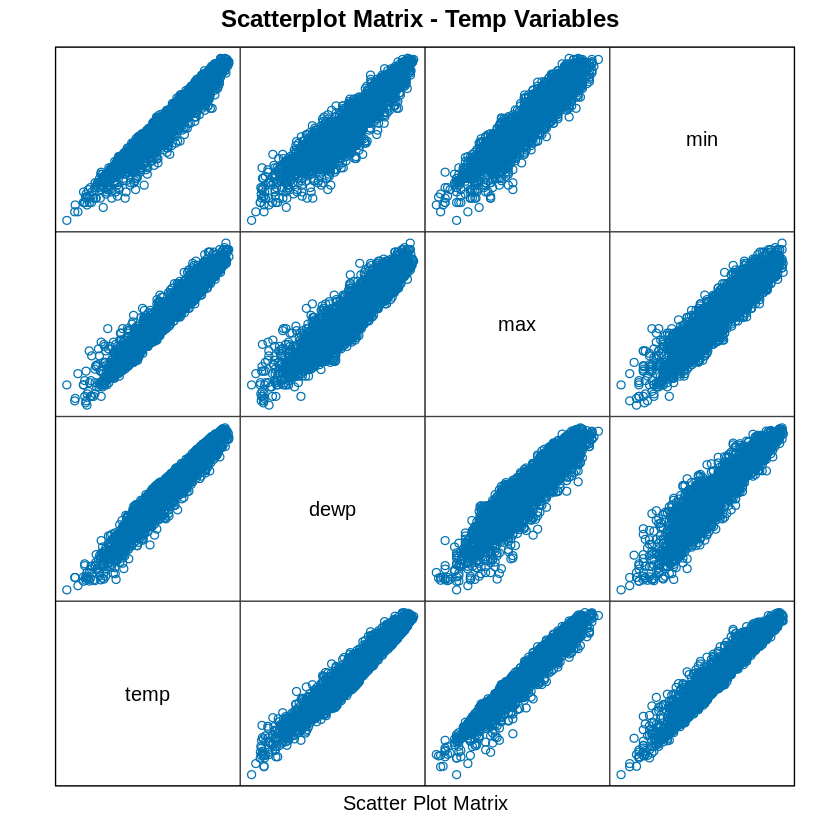

In [181]:
# subset - includes temp variables.
temp_variables <- collision_data_rm_2020[, c("temp", "dewp", "max", "min")]

#create scatterplot to show visual display
splom(~temp_variables,
  data = collision_data_rm_2020,
  main = "Scatterplot Matrix - Temp Variables",
  axis.line.tck=0, axis.text.alpha=0, aspect=1
)

In [182]:
# Closer look at the relationship with 'wind' elements.
cor(collision_data_rm_2020$temp, collision_data_rm_2020$dewp,  use = "complete.obs")
cor(collision_data_rm_2020$temp, collision_data_rm_2020$max,  use = "complete.obs")
cor(collision_data_rm_2020$temp, collision_data_rm_2020$min,  use = "complete.obs")

[1] 0.9675536

[1] 0.9694077

[1] 0.9650337

In [183]:
cor(collision_data$temp, collision_data$NUM_COLLISIONS,  use = "complete.obs")
cor(collision_data$dewp, collision_data$NUM_COLLISIONS,  use = "complete.obs")
cor(collision_data$max, collision_data$NUM_COLLISIONS,  use = "complete.obs")
cor(collision_data$min, collision_data$NUM_COLLISIONS,  use = "complete.obs")

[1] 0.07496931

[1] 0.01563553

[1] 0.08157732

[1] 0.06899076

In [184]:
cor(collision_data_rm_2020$temp, collision_data_rm_2020$NUM_COLLISIONS,  use = "complete.obs")
cor(collision_data_rm_2020$dewp, collision_data_rm_2020$NUM_COLLISIONS,  use = "complete.obs")
cor(collision_data_rm_2020$max, collision_data_rm_2020$NUM_COLLISIONS,  use = "complete.obs")
cor(collision_data_rm_2020$min, collision_data_rm_2020$NUM_COLLISIONS,  use = "complete.obs")

[1] 0.2025514

[1] 0.1965247

[1] 0.2035655

[1] 0.1977518

10% increase in correlation between temp variables and number of collisions.

### Visib and Fog

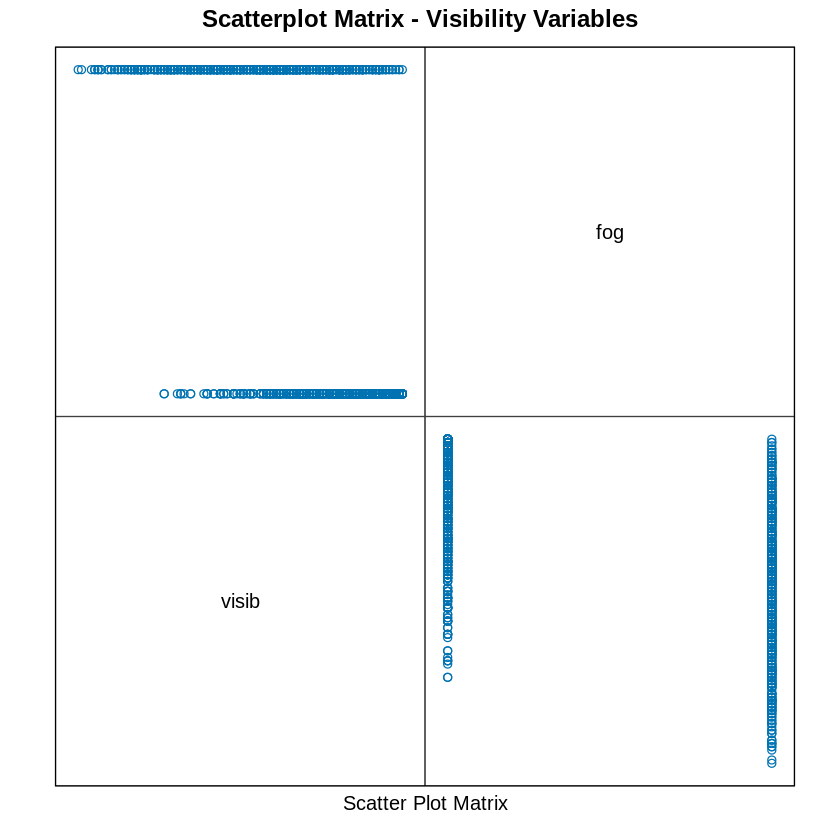

In [185]:
# subset - includes temp variables.
visib_variables <- collision_data_rm_2020[, c("visib", "fog")]

#create scatterplot to show visual display
splom(~visib_variables,
  data = collision_data_rm_2020,
  main = "Scatterplot Matrix - Visibility Variables",
  axis.line.tck=0, axis.text.alpha=0, aspect=1
)

In [186]:
cor(collision_data_rm_2020$visib, collision_data_rm_2020$fog,  use = "complete.obs")

[1] -0.7121667

If fog is recorded then visibility is low, which is too be expected.

In [187]:
# inital dataset
cor(collision_data$visib, collision_data$NUM_COLLISIONS,  use = "complete.obs")
cor(collision_data$fog, collision_data$NUM_COLLISIONS,  use = "complete.obs")

[1] -0.03990319

[1] 0.03252911

In [188]:
# (NA) Missing values
cor(collision_data_NA$visib, collision_data_NA$NUM_COLLISIONS,  use = "complete.obs")
cor(collision_data_NA$fog, collision_data_NA$NUM_COLLISIONS,  use = "complete.obs")

[1] -0.04048169

[1] 0.03254808

In [189]:
# 2020 removed -> dataset
cor(collision_data_rm_2020$visib, collision_data_rm_2020$NUM_COLLISIONS,  use = "complete.obs")
cor(collision_data_rm_2020$fog, collision_data_rm_2020$NUM_COLLISIONS,  use = "complete.obs")

[1] -0.06932003

[1] 0.0779111

Increase in correlation in terms of the fog vs. number of collisions.

More negative correlation for visib.

# Cleaned Data - Month [season]


In [267]:
#renaming dataset
month_data <- collision_data_rm_2020

In [268]:
# cor check - month, number of collisions
cor(cleaned_data$mo, cleaned_data$NUM_COLLISIONS)

[1] 0.1511082

`geom_smooth()` using formula = 'y ~ x'


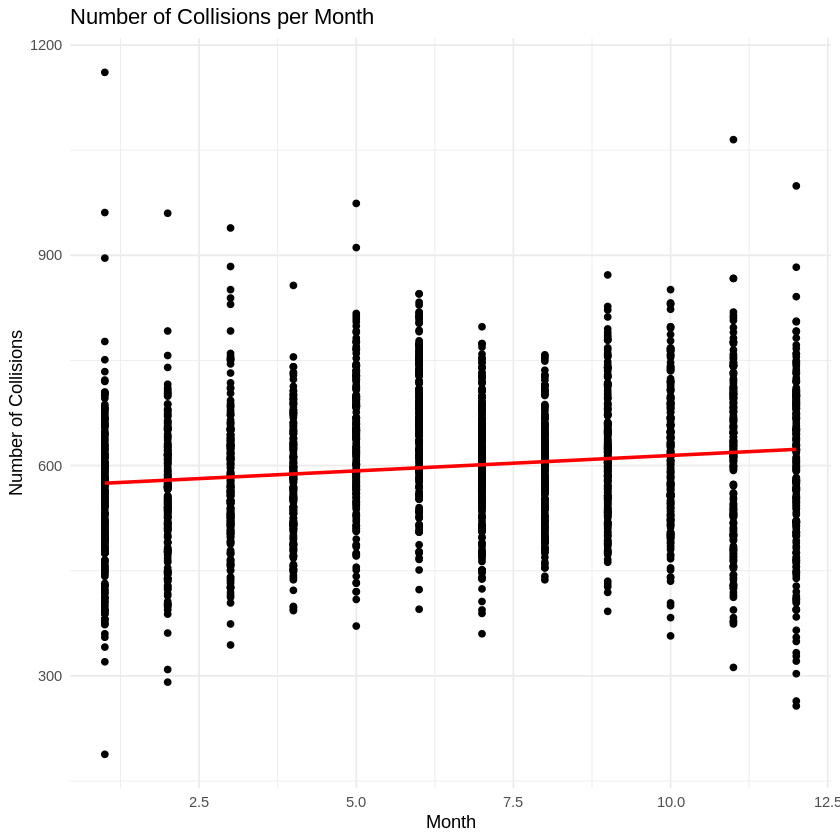

In [269]:
# visual display
ggplot(cleaned_data, aes(x = mo, y = NUM_COLLISIONS)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(title = "Number of Collisions per Month", x ="Month", y = "Number of Collisions") +
  theme_minimal()

End of the year (Oct, Nov, Dec) seems to have the highest variance in terms of number of collisions. Which could be discussed alongside temp values being lower, alongside other variables when temp is lower in the these months.

# Cleaned Data - Day of the week

Check the linear relationship with day vs. number of collisions.

In [190]:
# renaming dataset.
cleaned_data <- collision_data_rm_2020

In [191]:
# cor check - day of week, number of collisions
cor(cleaned_data$day, cleaned_data$NUM_COLLISIONS)

[1] -0.2935767

`geom_smooth()` using formula = 'y ~ x'


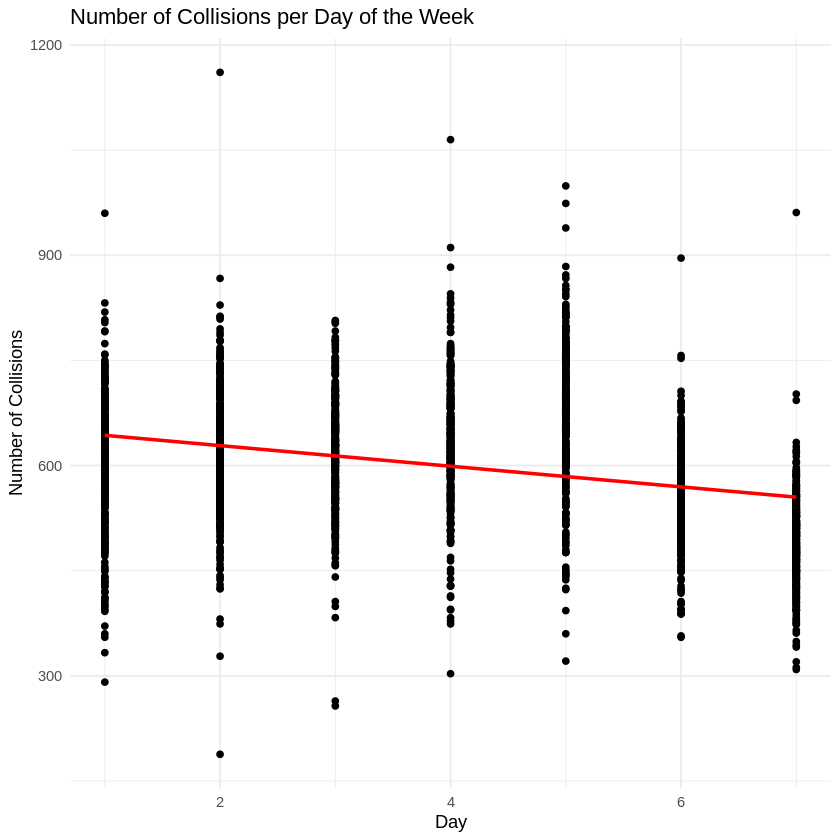

In [192]:
# visual display
ggplot(cleaned_data, aes(x = day, y = NUM_COLLISIONS)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(title = "Number of Collisions per Day of the Week", x ="Day", y = "Number of Collisions") +
  theme_minimal()

If we moved Sunday (7) to the front of the list. The Linear regression would be improved.

In [193]:
# change sunday 7 = 1,
# increment other days by 1
cleaned_data_v2 <- cleaned_data %>%
  mutate( day = case_when(
    day == 7 ~ 1, # Change Sunday from 7 to 1
    TRUE ~ day + 1 # Increment all other days by 1
  ))

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


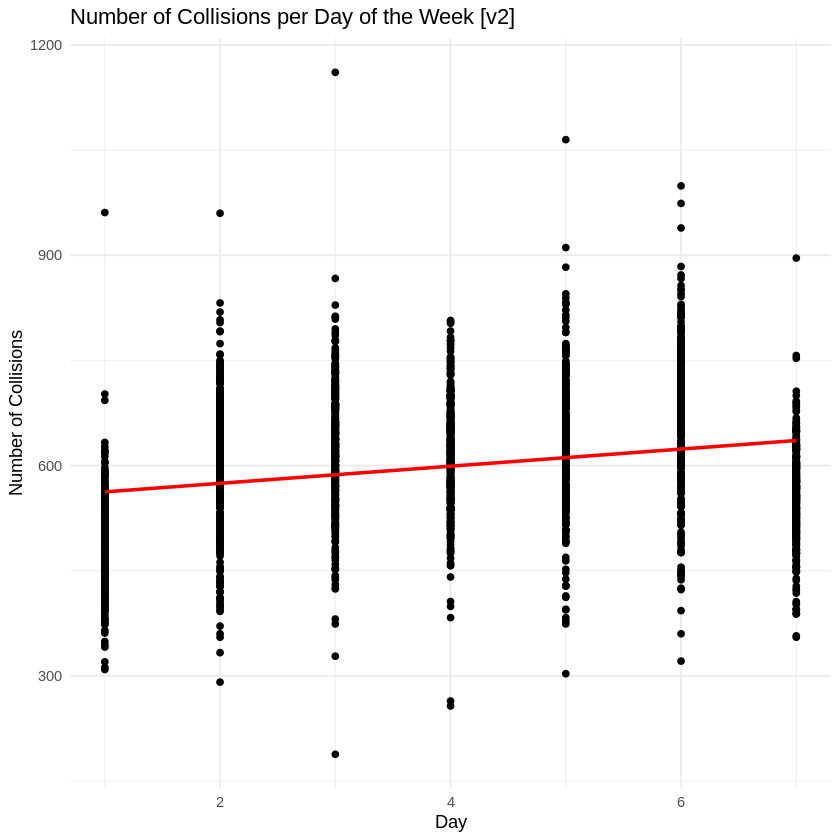

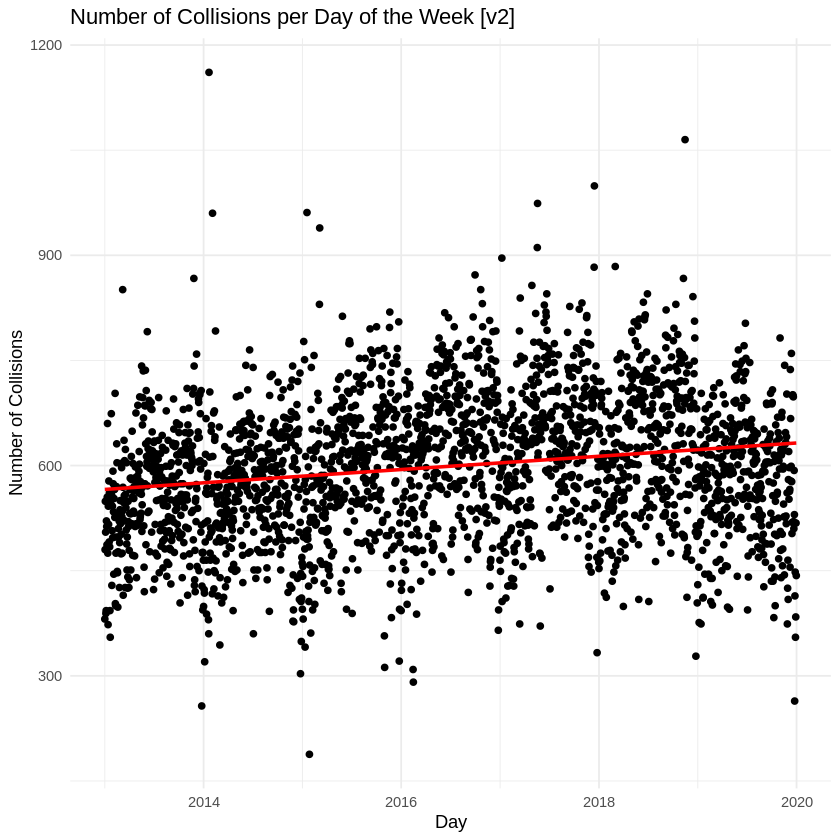

In [194]:
# display the newer version - day of the week has been updated.
# sunday = 1, other days + 1
ggplot(cleaned_data_v2, aes(x = day, y = NUM_COLLISIONS)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(title = "Number of Collisions per Day of the Week [v2]", x = "Day", y = "Number of Collisions") +
  theme_minimal()

# date
ggplot(cleaned_data_v2, aes(x = collision_date, y = NUM_COLLISIONS)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(title = "Number of Collisions per Day of the Week [v2]", x = "Day", y = "Number of Collisions") +
  theme_minimal()

In [195]:
# compared correlation between datasets
cor(cleaned_data$day, cleaned_data$NUM_COLLISIONS, use = "complete.obs")
cor(cleaned_data_v2$day, cleaned_data_v2$NUM_COLLISIONS, use = "complete.obs")

[1] -0.2935767

[1] 0.2436748

Now the linear regression is positive. Compared to the cleaned_data dataframe.

In [196]:
#rename dataframe.
cleaned_data_final <- cleaned_data_v2

In [197]:
# final checks - before model prep
summary(cleaned_data_final)
head(cleaned_data_final)

      day             year            mo               da       
 Min.   :1.000   Min.   :2013   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.997   Mean   :2016   Mean   : 6.518   Mean   :15.73  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2019   Max.   :12.000   Max.   :31.00  
 collision_date            temp            dewp            slp        
 Min.   :2013-01-01   Min.   : 5.80   Min.   :-6.70   Min.   : 989.5  
 1st Qu.:2014-09-30   1st Qu.:40.40   1st Qu.:32.10   1st Qu.:1012.2  
 Median :2016-07-03   Median :52.00   Median :45.30   Median :1016.7  
 Mean   :2016-07-01   Mean   :51.47   Mean   :44.15   Mean   :1016.8  
 3rd Qu.:2018-04-01   3rd Qu.:63.90   3rd Qu.:58.50   3rd Qu.:1021.8  
 Max.   :2019-12-31   Max.   :77.50   Max.   :74.10   Max.   :1044.2  
     visib             wdsp           mxpsd     

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust max min 
1 3   2018 1   2 2018-01-02     14.7  2.0 1024.9 10.0  12.9 20.0  31.1 18   5.0
2 2   2018 1   1 2018-01-01      9.5 -0.5 1022.2 10.0  15.0 18.1  25.1 21   5.0
3 6   2014 1  24 2014-01-24     14.8 -0.5 1022.4 10.0  11.8 15.9  22.9 23   9.0
4 4   2015 1   7 2015-01-07     22.6 10.2 1011.8  9.4  12.1 26.0  35.9 27  17.1
5 7   2018 1   6 2018-01-06     13.2 -0.2 1013.5 10.0  22.4 28.0  39.0 27  10.9
6 5   2015 1   8 2015-01-08     13.1 -2.4 1022.7  9.9  14.8 21.0  29.9 27   6.1
  prcp fog NUM_COLLISIONS
1 0    0   654           
2 0    0   453           
3 0    0   705           
4 0    0   538           
5 0    0   599           
6 0    0   573

Next, look at [years] individually.

In [198]:
# Using the cleaned dataset -> subset each year
c_y2013 <- cleaned_data_final %>%
  filter(year == 2013)
c_y2014 <- cleaned_data_final %>%
  filter(year == 2014)
c_y2015 <- cleaned_data_final %>%
  filter(year == 2015)
c_y2016 <- cleaned_data_final %>%
  filter(year == 2016)
c_y2017 <- cleaned_data_final %>%
  filter(year == 2017)
c_y2018 <- cleaned_data_final %>%
  filter(year == 2018)
c_y2019 <- cleaned_data_final %>%
  filter(year == 2019)

`geom_smooth()` using formula = 'y ~ x'


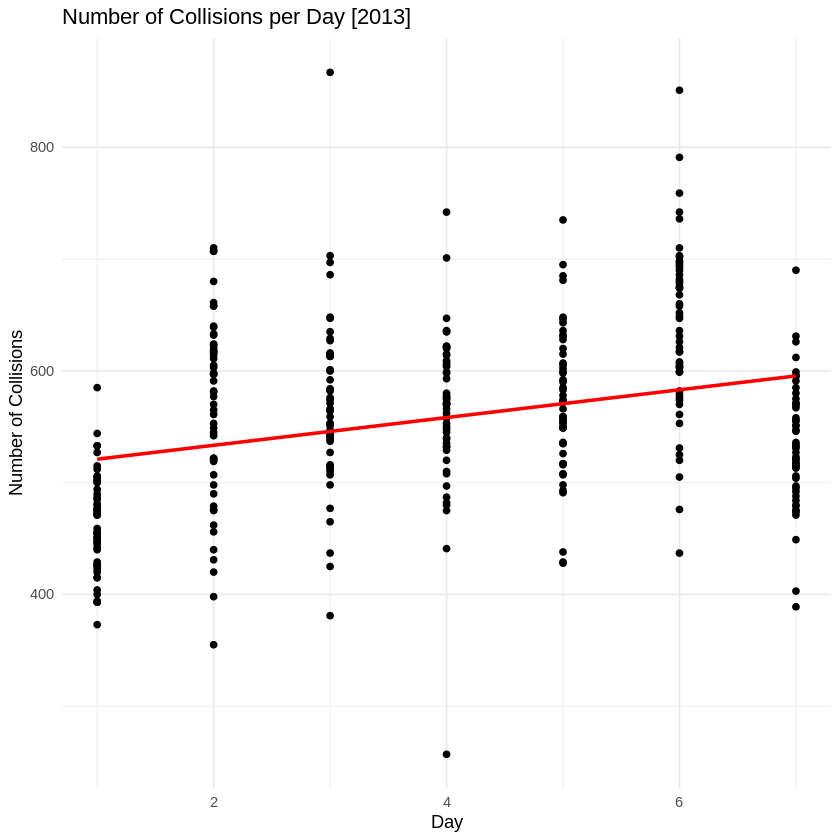

In [199]:
# visual display - 2013
ggplot(c_y2013, aes(x = day, y = NUM_COLLISIONS)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(title = "Number of Collisions per Day [2013]", x = "Day", y = "Number of Collisions") +
  theme_minimal()

In [200]:
cor(c_y2013$day, c_y2013$NUM_COLLISIONS)

[1] 0.2981806

In [201]:
# Correlations - each year - day vs. number of collisions
cor(c_y2014$day, c_y2014$NUM_COLLISIONS)
cor(c_y2015$day, c_y2015$NUM_COLLISIONS)
cor(c_y2016$day, c_y2016$NUM_COLLISIONS)
cor(c_y2017$day, c_y2017$NUM_COLLISIONS)
cor(c_y2018$day, c_y2018$NUM_COLLISIONS)
cor(c_y2019$day, c_y2019$NUM_COLLISIONS)


[1] 0.2397558

[1] 0.1537081

[1] 0.2833907

[1] 0.278403

[1] 0.2861909

[1] 0.265492

2013 has the highest positive correlation with number of collisions. 2015 seems to have the lowest correlation.

There also seems to be a slight dip from 2013 to 2014 and then an even greater dip in 2015.

2016 and onwards has similar results.


Call:
lm(formula = day ~ NUM_COLLISIONS, data = c_y2013)

Residuals:
   Min     1Q Median     3Q    Max 
-3.209 -1.731 -0.089  1.298  4.215 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.001323   0.679237  -0.002    0.998    
NUM_COLLISIONS  0.007163   0.001204   5.952 6.25e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.912 on 363 degrees of freedom
Multiple R-squared:  0.08891,	Adjusted R-squared:  0.0864 
F-statistic: 35.42 on 1 and 363 DF,  p-value: 6.252e-09


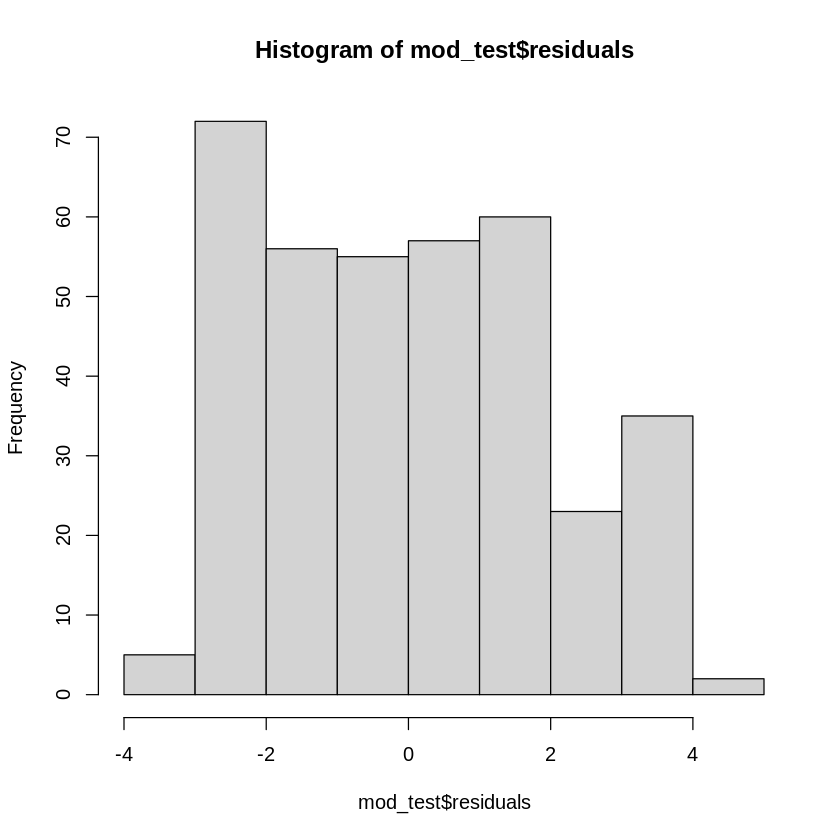

In [202]:
# check P vales, R2 values based around each year index.
mod_test <- lm(day ~ NUM_COLLISIONS, data = c_y2013)

#summary
summary(mod_test)

#histogram - viewing the residuals [spread]
hist(mod_test$residuals)

In [203]:
#small test on using predict()
c_y2013 %>%
  lm(day ~ NUM_COLLISIONS, data = .) %>%
  predict(data.frame(NUM_COLLISIONS = c(300, 600, 900))) %>%
  round()

# 1 _. predicts --> 2 Monday
# 2 _. predicts --> 4 Wednesday
# 3 _. predicts --> 6 Friday.

# This seems correct based on ggplot() displays. The higher number of collisions tends to be later in the week. (Thursdsay, Friday)
# Since Friday is the highest average, then the model predicts (6) Friday.

1 2 3 
2 4 6


Call:
lm(formula = day ~ NUM_COLLISIONS, data = cleaned_data_final)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7565 -1.8026 -0.1088  1.4453  4.1890 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.0855686  0.2327338   4.664 3.25e-06 ***
NUM_COLLISIONS 0.0048605  0.0003832  12.685  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.941 on 2549 degrees of freedom
Multiple R-squared:  0.05938,	Adjusted R-squared:  0.05901 
F-statistic: 160.9 on 1 and 2549 DF,  p-value: < 2.2e-16


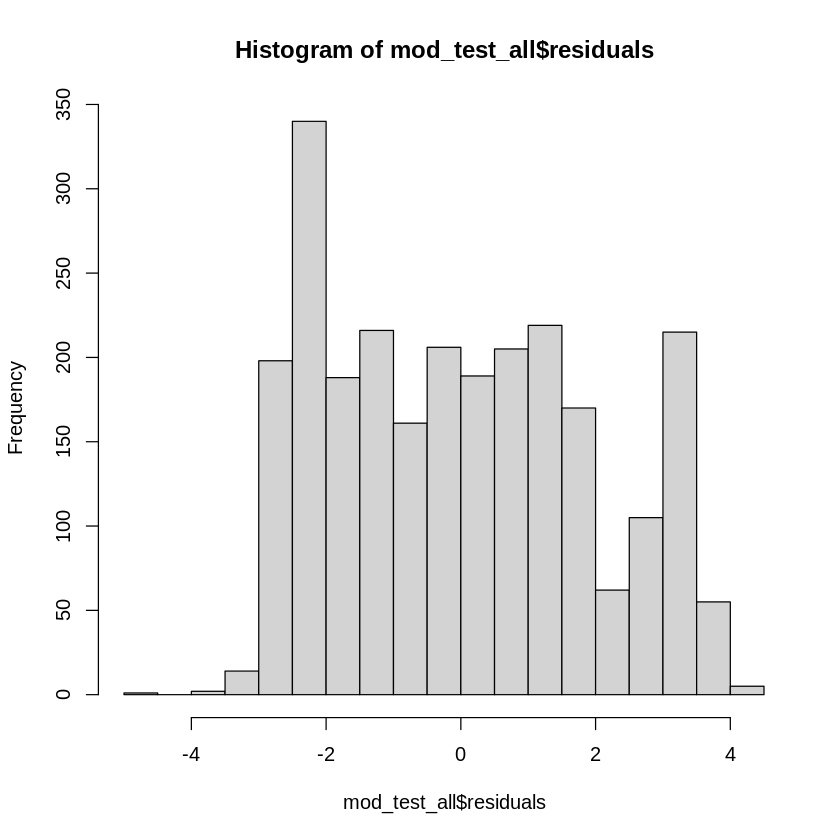

In [204]:
# check P vales, R2 values -- full dataset (all years)
mod_test_all <- lm(day ~ NUM_COLLISIONS, data = cleaned_data_final)

#summary
summary(mod_test_all)

#histogram - viewing the residuals [spread]
hist(mod_test_all$residuals)

In [205]:
#small test on using predict()
# mod1 -> more variance
mod1 <- cleaned_data_final %>%
  lm(day ~ NUM_COLLISIONS, data = .) %>%
  predict(data.frame(NUM_COLLISIONS = c(300, 600, 900))) %>%
  round()

#mod2 - focused
mod2 <- cleaned_data_final %>%
  lm(day ~ NUM_COLLISIONS, data = .) %>%
  predict(data.frame(NUM_COLLISIONS = c(350, 450, 550))) %>%
  round()

#mod3 - lower
mod3 <- cleaned_data_final %>%
  lm(day ~ NUM_COLLISIONS, data = .) %>%
  predict(data.frame(NUM_COLLISIONS = c(150, 250, 350))) %>%
  round()


#mod4 - zero +
mod4 <- cleaned_data_final %>%
  lm(day ~ NUM_COLLISIONS, data = .) %>%
  predict(data.frame(NUM_COLLISIONS = c(0, 50, 100))) %>%
  round()

mod1 # more variance
mod2 # more focused
mod3 # lower
mod4 # zero +

1 2 3 
3 4 5

1 2 3 
3 3 4

1 2 3 
2 2 3

1 2 3 
1 1 2

**Result:**

The higher the number of collisions is, the more chance for the test lm() models to predict later days in the week (Thursday, Friday)

lower numbers, predicts start of week (Sunday, Monday)

`geom_smooth()` using formula = 'y ~ x'


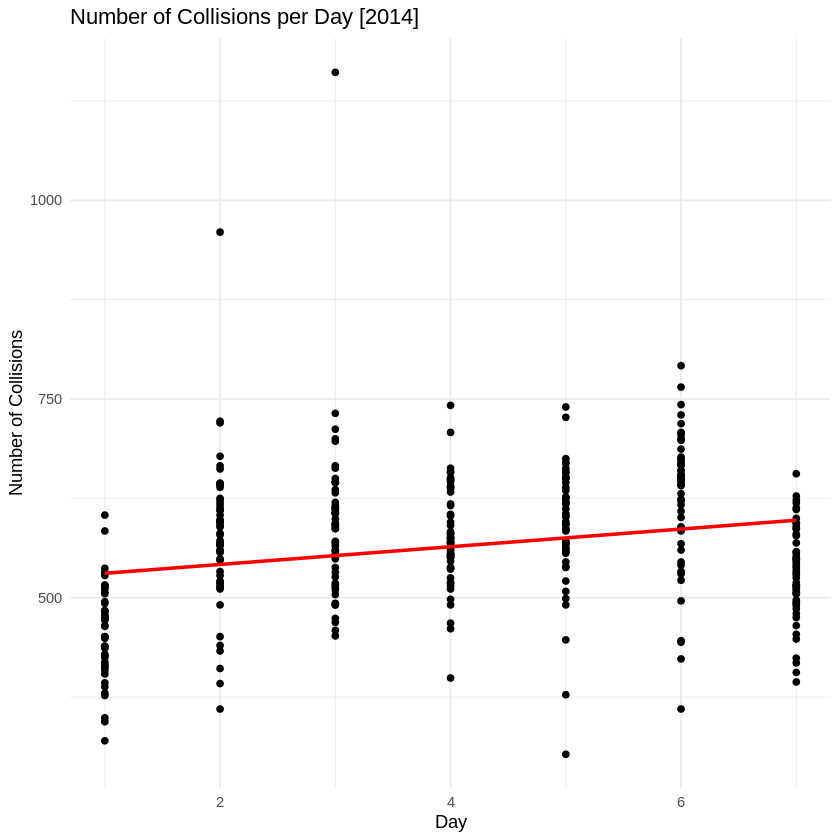

In [206]:
# visual display - 2014
ggplot(c_y2014, aes(x = day, y = NUM_COLLISIONS)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(title = "Number of Collisions per Day [2014]", x = "Day", y = "Number of Collisions") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


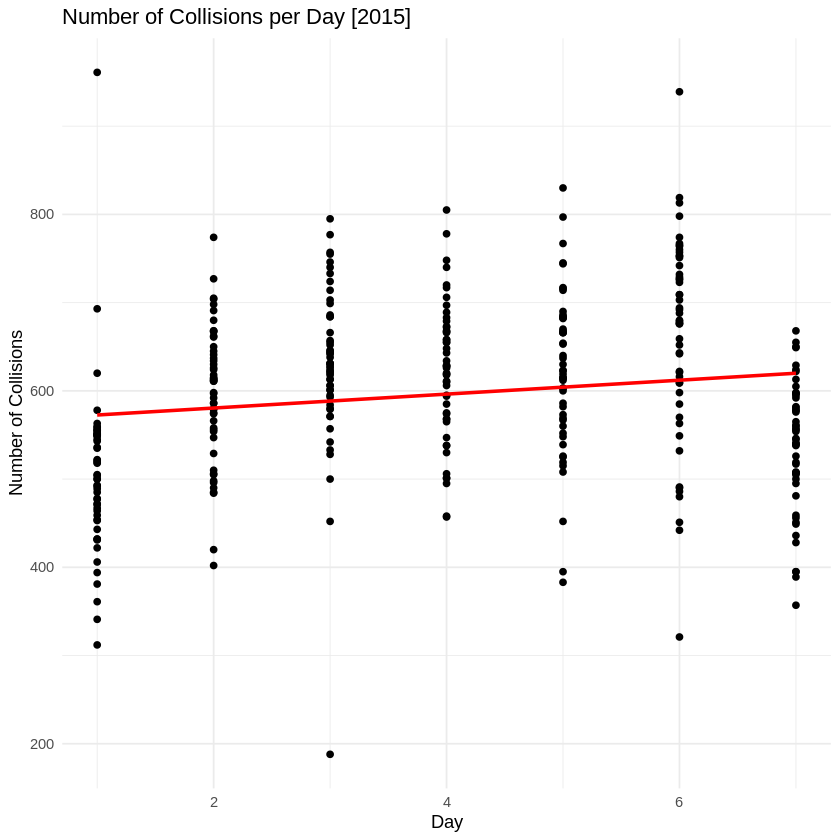

In [207]:
# visual display - 2015
ggplot(c_y2015, aes(x = day, y = NUM_COLLISIONS)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(title = "Number of Collisions per Day [2015]", x = "Day", y = "Number of Collisions") +
  theme_minimal()

Based on the plots - there are certain outliers which would affect the cor() results.

`geom_smooth()` using formula = 'y ~ x'


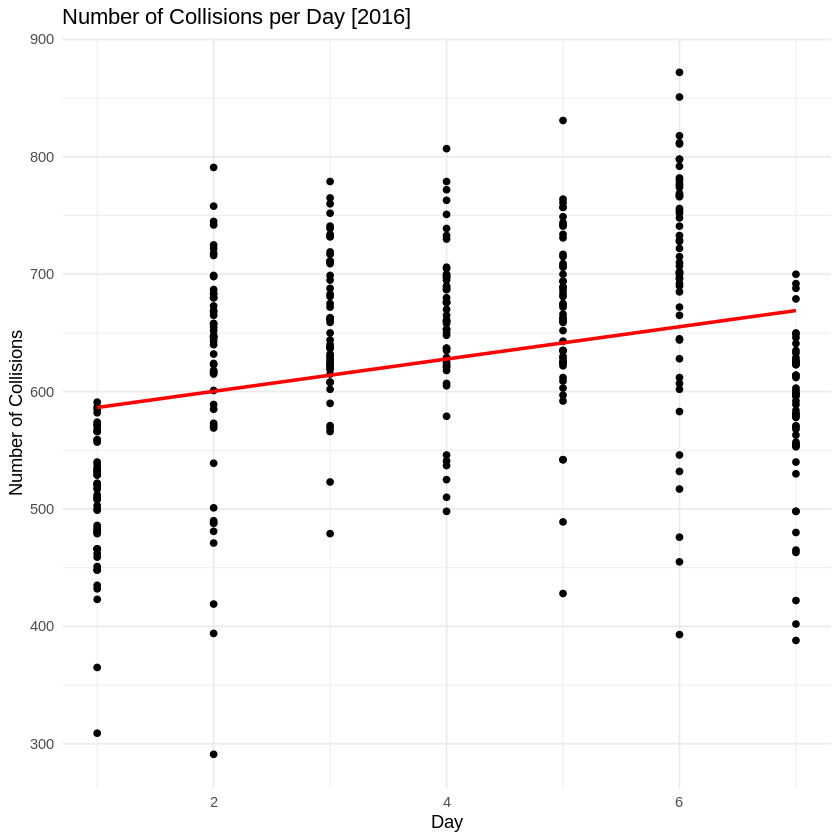

In [208]:
# visual display - 2016
ggplot(c_y2016, aes(x = day, y = NUM_COLLISIONS)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(title = "Number of Collisions per Day [2016]", x = "Day", y = "Number of Collisions") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


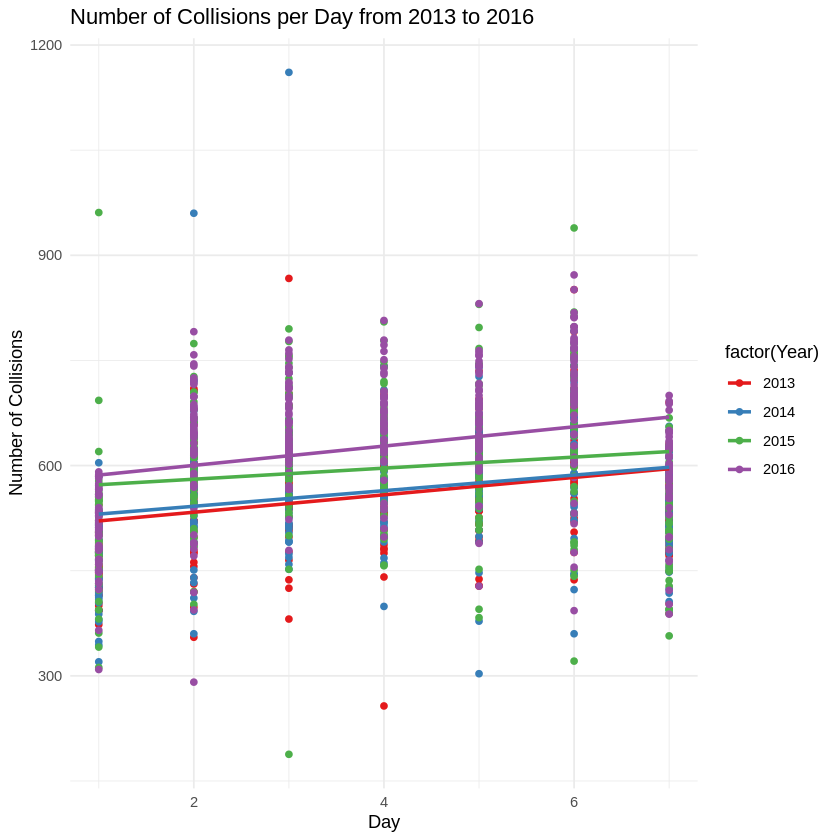

In [209]:
# combine years 2013 -> 2016
# View differences in visual plots()
combined_years <- bind_rows(
  c_y2013 %>% mutate(Year = 2013),
  c_y2014 %>% mutate(Year = 2014),
  c_y2015 %>% mutate(Year = 2015),
  c_y2016 %>% mutate(Year = 2016)
)

# Create the scatterplot
ggplot(combined_years, aes(x = day, y = NUM_COLLISIONS, color = factor(Year))) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Number of Collisions per Day from 2013 to 2016",
       x = "Day",
       y = "Number of Collisions") +
  scale_color_brewer(palette = "Set1") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


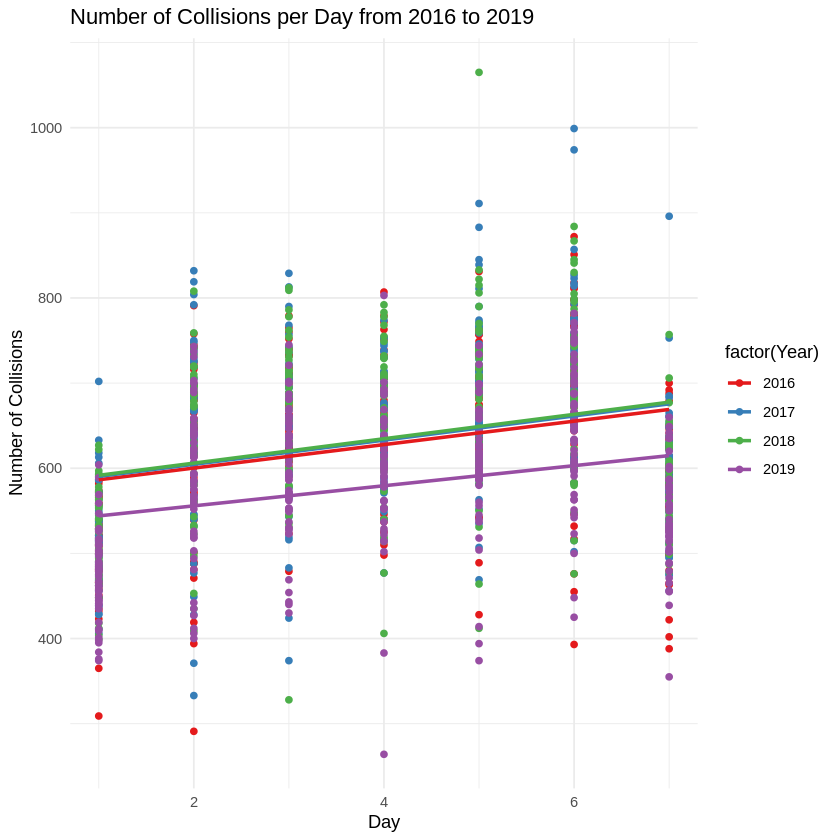

In [210]:
# combine years 2016 -> 2019
# visual display
combined_years_v2 <- bind_rows(
  c_y2016 %>% mutate(Year = 2016),
  c_y2017 %>% mutate(Year = 2017),
  c_y2018 %>% mutate(Year = 2018),
  c_y2019 %>% mutate(Year = 2019)
)

# Create the scatterplot
ggplot(combined_years_v2, aes(x = day, y = NUM_COLLISIONS, color = factor(Year))) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Number of Collisions per Day from 2016 to 2019",
       x = "Day",
       y = "Number of Collisions") +
  scale_color_brewer(palette = "Set1") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


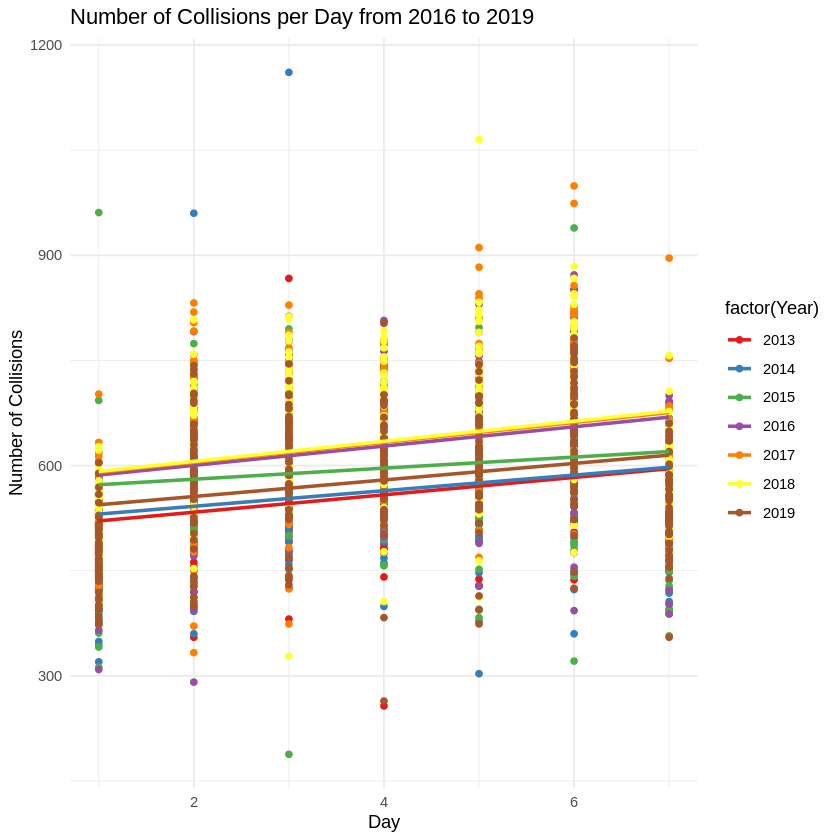

In [211]:
# combine all years
combined_years_all <- bind_rows(
  c_y2013 %>% mutate(Year = 2013),
  c_y2014 %>% mutate(Year = 2014),
  c_y2015 %>% mutate(Year = 2015),
  c_y2016 %>% mutate(Year = 2016),
  c_y2017 %>% mutate(Year = 2017),
  c_y2018 %>% mutate(Year = 2018),
  c_y2019 %>% mutate(Year = 2019)
)

# Create the scatterplot
ggplot(combined_years_all, aes(x = day, y = NUM_COLLISIONS, color = factor(Year))) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Number of Collisions per Day from 2016 to 2019",
       x = "Day",
       y = "Number of Collisions") +
  scale_color_brewer(palette = "Set1") +
  theme_minimal()

There is a positive linear trend from Sunday to Saturday.

This means that Sundays usually have the least number of collisions, compared to the highest average on Fridays.

Next, models will be created that consider weather variables also tied to the number of collisions (best correlations) and proceed with building models to help predict outcomes.

In [212]:
# write - cleaned data
# shows the difference between initial data loaded in,
# and the steps taken to create the cleaned dataset
write.csv(cleaned_data_final, file = '/content/cleaned_data_final.csv')

# Normalisation/Standardisation:

Using the built in R function scale() to standardise -

‘scale’ is generic function whose default method centers and/or
scales the columns of a numeric matrix.

Standardisation, also known as Z-score normalisation, is the process of rescaling the features so that they will have the properties of a standard normal distribution with μ = 0 and σ = 1, where μ is the mean (average), and σ is the standard deviation from the mean (Jaadi, 2019).

In [213]:
cleaned_data_final_b <- cleaned_data_final

In [214]:
standard_num_collisions <- as.data.frame(scale(cleaned_data_final_b$NUM_COLLISIONS))

In [215]:
summary(standard_num_collisions)

       V1          
 Min.   :-4.09776  
 1st Qu.:-0.67845  
 Median : 0.02934  
 Mean   : 0.00000  
 3rd Qu.: 0.65738  
 Max.   : 5.60192  

In [216]:
cleaned_data_final_b$NUM_COLLISIONS <- standard_num_collisions$V1

In [217]:
summary(cleaned_data_final_b$NUM_COLLISIONS)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.09776 -0.67845  0.02934  0.00000  0.65738  5.60192 

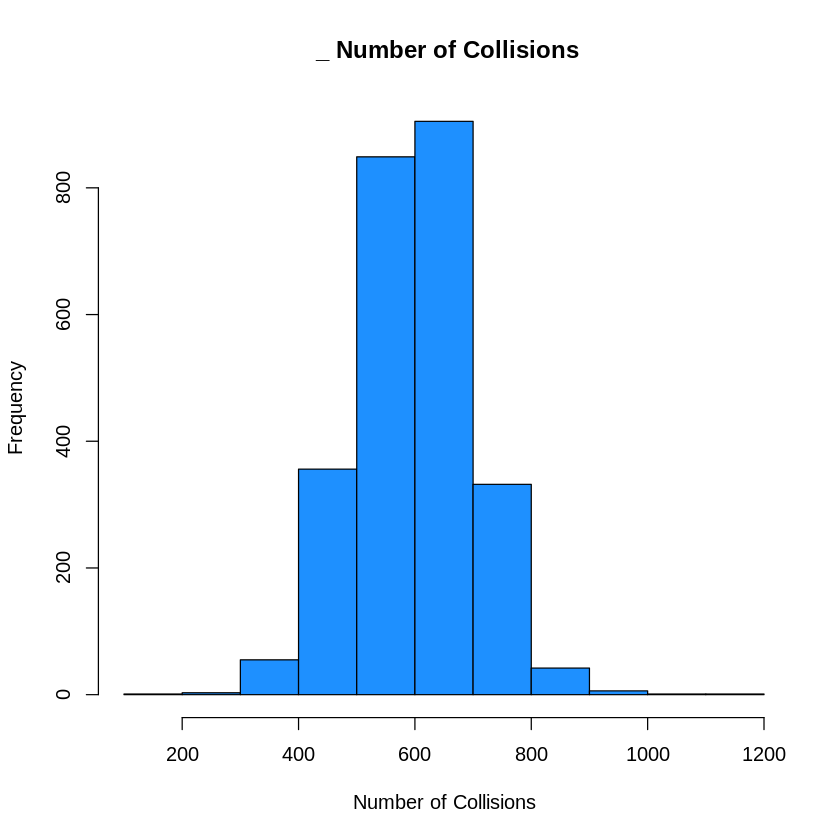

In [235]:
# Comapre un-standardised
hist(cleaned_data_final$NUM_COLLISIONS,
     col="dodgerblue1",
     main=" _ Number of Collisions",
     xlab="Number of Collisions"
)

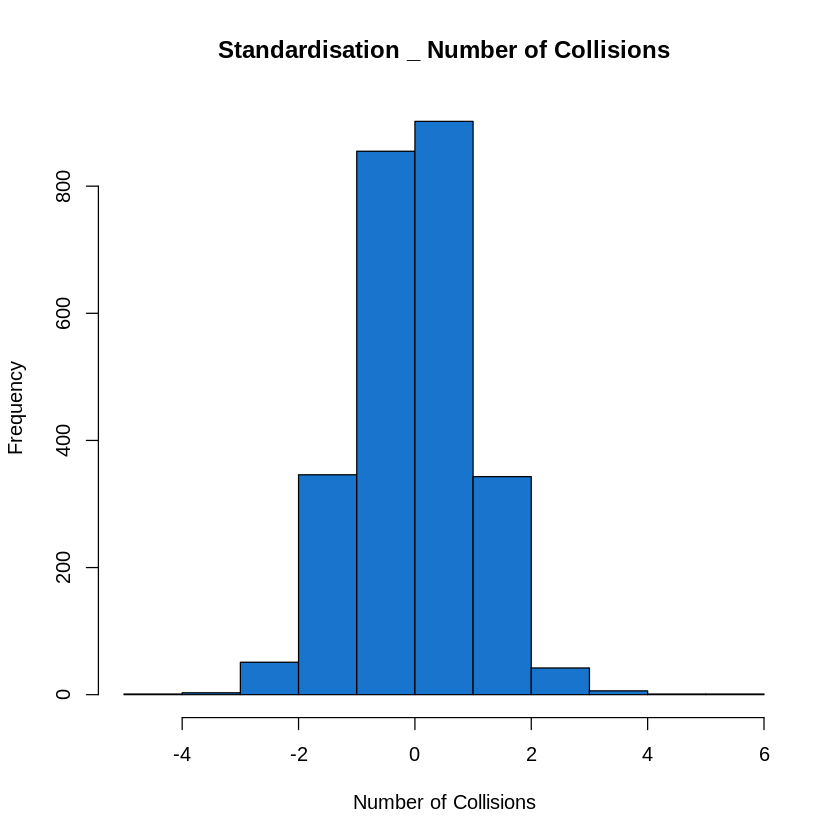

In [231]:
# Check the result of standardisation
hist(cleaned_data_final_b$NUM_COLLISIONS,
     col="dodgerblue3",
     main="Standardisation _ Number of Collisions",
     xlab="Number of Collisions")

Results show that standardisation has brought the NUM_COLLISIONS values to the same starting point (0). This ensures that there is a fair comparison between the variances.

# Linear Regression Model

Using lm() function -
created test examples of linear models which might be used for assessment 02.

**Reason:** <br>
Using the P Value and R2 Values from testing models. Can determine the success of using linear regression against the case study.

In [223]:
# testing lm() function models
test_lrm_day <- cleaned_data_final_b %>%
  lm(NUM_COLLISIONS ~ day, data = .)

#summary of test_model
summary(test_lrm_day)


Call:
lm(formula = NUM_COLLISIONS ~ day, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9763 -0.6638 -0.0031  0.6464  5.7234 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.486801   0.042914  -11.34   <2e-16 ***
day          0.121784   0.009601   12.69   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.97 on 2549 degrees of freedom
Multiple R-squared:  0.05938,	Adjusted R-squared:  0.05901 
F-statistic: 160.9 on 1 and 2549 DF,  p-value: < 2.2e-16


In [224]:
# testing lm() function models
test_lrm_v1 <- cleaned_data_final_b %>%
  lm(NUM_COLLISIONS ~ day + temp, data = .)

#summary of test_model
summary(test_lrm_v1)


Call:
lm(formula = NUM_COLLISIONS ~ day + temp, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6669 -0.6476 -0.0379  0.6396  6.0473 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.237224   0.080457  -15.38   <2e-16 ***
day          0.122917   0.009386   13.10   <2e-16 ***
temp         0.014491   0.001326   10.93   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9483 on 2548 degrees of freedom
Multiple R-squared:  0.1015,	Adjusted R-squared:  0.1008 
F-statistic: 143.9 on 2 and 2548 DF,  p-value: < 2.2e-16


In [225]:
# testing lm() function models
test_lrm_v2 <- cleaned_data_final_b %>%
  lm(NUM_COLLISIONS ~ day + temp + wdsp + visib + fog, data = .)

#summary of test_model
summary(test_lrm_v2)


Call:
lm(formula = NUM_COLLISIONS ~ day + temp + wdsp + visib + fog, 
    data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0563 -0.6500 -0.0266  0.6363  5.9983 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.467223   0.180347  -8.136 6.34e-16 ***
day          0.122209   0.009383  13.024  < 2e-16 ***
temp         0.015452   0.001453  10.633  < 2e-16 ***
wdsp         0.013565   0.004904   2.766  0.00572 ** 
visib        0.002872   0.012732   0.226  0.82156    
fog          0.057655   0.063721   0.905  0.36566    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9471 on 2545 degrees of freedom
Multiple R-squared:  0.1047,	Adjusted R-squared:  0.103 
F-statistic: 59.55 on 5 and 2545 DF,  p-value: < 2.2e-16


In [226]:
# testing lm() function models
test_lrm_v3 <- cleaned_data_final_b %>%
  lm(NUM_COLLISIONS ~ day + temp + dewp + slp + visib + wdsp + mxpsd + gust + max + min + prcp + fog, data = .)

#summary of test_model
summary(test_lrm_v3)


Call:
lm(formula = NUM_COLLISIONS ~ day + temp + dewp + slp + visib + 
    wdsp + mxpsd + gust + max + min + prcp + fog, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1535 -0.6465 -0.0310  0.6366  5.9196 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.6424209  2.9506722  -0.218   0.8277    
day          0.1224920  0.0094007  13.030   <2e-16 ***
temp         0.0054498  0.0112692   0.484   0.6287    
dewp         0.0008481  0.0057994   0.146   0.8838    
slp         -0.0007843  0.0028681  -0.273   0.7845    
visib       -0.0046614  0.0152301  -0.306   0.7596    
wdsp         0.0275292  0.0102362   2.689   0.0072 ** 
mxpsd       -0.0090254  0.0139716  -0.646   0.5184    
gust        -0.0011942  0.0092401  -0.129   0.8972    
max          0.0108570  0.0057173   1.899   0.0577 .  
min         -0.0021153  0.0051245  -0.413   0.6798    
prcp        -0.0347249  0.0638264  -0.544   0.5865    
fog          0.0422841  0.0644535   0.656   

The **p-value** is a statistical metric used in hypothesis testing to evaluate the strength of the results against the null hypothesis.

A p-value of 0.05 or less suggests strong evidence against the null hypothesis, leading to its rejection. Conversely, a p-value greater than 0.05 indicates that the data are consistent with the null hypothesis, suggesting that the observed effect could be due to chance (Dahiru, 2008).

---

The **R² value**, or **R-squared**, measures the proportion of variance in a dependent variable explained by independent variables in a regression model, serving as an indicator of model fit. An R² of 0 means the model explains none of the variability, while an R² of 1 explains all the variability. Generally, a higher R² indicates a better model fit (Hussain, 2019; Super Data Science, 2023)

---

All models lie around the 10% mark in terms of R-squared. The lowest (5%) being the first model which includes day and NUM_COLLISIONS.

In [236]:
head(cleaned_data_final_b)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust max min 
1 3   2018 1   2 2018-01-02     14.7  2.0 1024.9 10.0  12.9 20.0  31.1 18   5.0
2 2   2018 1   1 2018-01-01      9.5 -0.5 1022.2 10.0  15.0 18.1  25.1 21   5.0
3 6   2014 1  24 2014-01-24     14.8 -0.5 1022.4 10.0  11.8 15.9  22.9 23   9.0
4 4   2015 1   7 2015-01-07     22.6 10.2 1011.8  9.4  12.1 26.0  35.9 27  17.1
5 7   2018 1   6 2018-01-06     13.2 -0.2 1013.5 10.0  22.4 28.0  39.0 27  10.9
6 5   2015 1   8 2015-01-08     13.1 -2.4 1022.7  9.9  14.8 21.0  29.9 27   6.1
  prcp fog NUM_COLLISIONS
1 0    0    0.5477199414 
2 0    0   -1.4560182696 
3 0    0    1.0561311292 
4 0    0   -0.6086662899 
5 0    0   -0.0005666338 
6 0    0   -0.2597566511

In [241]:
lrm_data_time <- cleaned_data_final_b[, c(1, 3, 17)]

In [242]:
head(lrm_data_time)

day mo NUM_COLLISIONS
1 3   1   0.5477199414 
2 2   1  -1.4560182696 
3 6   1   1.0561311292 
4 4   1  -0.6086662899 
5 7   1  -0.0005666338 
6 5   1  -0.2597566511

In [270]:
# based weather correlations - best results
lrm_data1 <- cleaned_data_final_b[, c(1, 3, 6, 17)]

In [271]:
head(lrm_data1)

day mo temp NUM_COLLISIONS
1 3   1  14.7  0.5477199414 
2 2   1   9.5 -1.4560182696 
3 6   1  14.8  1.0561311292 
4 4   1  22.6 -0.6086662899 
5 7   1  13.2 -0.0005666338 
6 5   1  13.1 -0.2597566511

In [243]:
lrm_data2 <- cleaned_data_final_b[, c(1, 6, 9, 10, 16, 17)]

In [244]:
head(lrm_data2)

day temp visib wdsp fog NUM_COLLISIONS
1 3   14.7 10.0  12.9 0    0.5477199414 
2 2    9.5 10.0  15.0 0   -1.4560182696 
3 6   14.8 10.0  11.8 0    1.0561311292 
4 4   22.6  9.4  12.1 0   -0.6086662899 
5 7   13.2 10.0  22.4 0   -0.0005666338 
6 5   13.1  9.9  14.8 0   -0.2597566511

In [247]:
lrm_data3 <- cleaned_data_final_b[, c(1, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17)]

In [248]:
head(lrm_data3)

day mo temp dewp slp    visib wdsp mxpsd gust max min  prcp fog
1 3   1  14.7  2.0 1024.9 10.0  12.9 20.0  31.1 18   5.0 0    0  
2 2   1   9.5 -0.5 1022.2 10.0  15.0 18.1  25.1 21   5.0 0    0  
3 6   1  14.8 -0.5 1022.4 10.0  11.8 15.9  22.9 23   9.0 0    0  
4 4   1  22.6 10.2 1011.8  9.4  12.1 26.0  35.9 27  17.1 0    0  
5 7   1  13.2 -0.2 1013.5 10.0  22.4 28.0  39.0 27  10.9 0    0  
6 5   1  13.1 -2.4 1022.7  9.9  14.8 21.0  29.9 27   6.1 0    0  
  NUM_COLLISIONS
1  0.5477199414 
2 -1.4560182696 
3  1.0561311292 
4 -0.6086662899 
5 -0.0005666338 
6 -0.2597566511

NUM_COLLSIONS [default]
- lrm_data_time : day of the week, month
- lrm_data1 : day, month, +temp (best performing correlation)
- lrm_data2 : temp, visib, wdsp, fog (different variety of variables)
- lrm_data3 : day, month, [all weather variables]

In [272]:
# write .csv files - linear models for assessment 02
write.csv(lrm_data_time, file = '/content/lrm_data_time.csv')
write.csv(lrm_data1, file = '/content/lrm_data1.csv')
write.csv(lrm_data2, file = '/content/lrm_data2.csv')
write.csv(lrm_data3, file = '/content/lrm_data3.csv')

# Deep Netural Network Model

**One-Hot Encoding:**

It involves converting categorical data into a numerical format that cannot be interpreted directly by the model. In one-hot encoding, each category value is transformed into a binary vector with all zeros except for a single one at the position of the category.

This helps remove the problem of ordinality, where a numerical value can be greater than and less than another value (Fawcett, 2021).

In [252]:
cleaned_data_final_dnn <- cleaned_data_final_b

In [253]:
cleaned_data_final_dnn$mo[cleaned_data_final_dnn$mo == 1] <- 'Jan'
cleaned_data_final_dnn$mo[cleaned_data_final_dnn$mo == 2] <- 'Feb'
cleaned_data_final_dnn$mo[cleaned_data_final_dnn$mo == 3] <- 'Mar'
cleaned_data_final_dnn$mo[cleaned_data_final_dnn$mo == 4] <- 'Apr'
cleaned_data_final_dnn$mo[cleaned_data_final_dnn$mo == 5] <- 'May'
cleaned_data_final_dnn$mo[cleaned_data_final_dnn$mo == 6] <- 'Jun'
cleaned_data_final_dnn$mo[cleaned_data_final_dnn$mo == 7] <- 'Jul'
cleaned_data_final_dnn$mo[cleaned_data_final_dnn$mo == 8] <- 'Aug'
cleaned_data_final_dnn$mo[cleaned_data_final_dnn$mo == 9] <- 'Sep'
cleaned_data_final_dnn$mo[cleaned_data_final_dnn$mo == 10] <- 'Oct'
cleaned_data_final_dnn$mo[cleaned_data_final_dnn$mo == 11] <- 'Nov'
cleaned_data_final_dnn$mo[cleaned_data_final_dnn$mo == 12] <- 'Dec'

In [254]:
cleaned_data_final_dnn$day[cleaned_data_final_dnn$day == 1] <- 'Sun'
cleaned_data_final_dnn$day[cleaned_data_final_dnn$day == 2] <- 'Mon'
cleaned_data_final_dnn$day[cleaned_data_final_dnn$day == 3] <- 'Tue'
cleaned_data_final_dnn$day[cleaned_data_final_dnn$day == 4] <- 'Wed'
cleaned_data_final_dnn$day[cleaned_data_final_dnn$day == 5] <- 'Thu'
cleaned_data_final_dnn$day[cleaned_data_final_dnn$day == 6] <- 'Fri'
cleaned_data_final_dnn$day[cleaned_data_final_dnn$day == 7] <- 'Sat'

In [256]:
# see results for categorised data -
# months, day variables changed.
head(cleaned_data_final_dnn)

day year mo  da collision_date temp dewp slp    visib wdsp mxpsd gust max
1 Tue 2018 Jan  2 2018-01-02     14.7  2.0 1024.9 10.0  12.9 20.0  31.1 18 
2 Mon 2018 Jan  1 2018-01-01      9.5 -0.5 1022.2 10.0  15.0 18.1  25.1 21 
3 Fri 2014 Jan 24 2014-01-24     14.8 -0.5 1022.4 10.0  11.8 15.9  22.9 23 
4 Wed 2015 Jan  7 2015-01-07     22.6 10.2 1011.8  9.4  12.1 26.0  35.9 27 
5 Sat 2018 Jan  6 2018-01-06     13.2 -0.2 1013.5 10.0  22.4 28.0  39.0 27 
6 Thu 2015 Jan  8 2015-01-08     13.1 -2.4 1022.7  9.9  14.8 21.0  29.9 27 
  min  prcp fog NUM_COLLISIONS
1  5.0 0    0    0.5477199414 
2  5.0 0    0   -1.4560182696 
3  9.0 0    0    1.0561311292 
4 17.1 0    0   -0.6086662899 
5 10.9 0    0   -0.0005666338 
6  6.1 0    0   -0.2597566511

In [257]:
# Apply (one-hot encoding) on Month
months <- model.matrix(~0+cleaned_data_final_dnn$mo)
head(months)

cleaned_data_final_dnn$moApr cleaned_data_final_dnn$moAug
1 0                            0                           
2 0                            0                           
3 0                            0                           
4 0                            0                           
5 0                            0                           
6 0                            0                           
  cleaned_data_final_dnn$moDec cleaned_data_final_dnn$moFeb
1 0                            0                           
2 0                            0                           
3 0                            0                           
4 0                            0                           
5 0                            0                           
6 0                            0                           
  cleaned_data_final_dnn$moJan cleaned_data_final_dnn$moJul
1 1                            0                           
2 1                            0                           
3 1                            0                           
4 1                            0                           
5 1                            0                           
6 1                            0                           
  cleaned_data_final_dnn$moJun cleaned_data_final_dnn$moMar
1 0                            0                           
2 0                            0                           
3 0                            0                           
4 0                            0                           
5 0                            0                           
6 0                            0                           
  cleaned_data_final_dnn$moMay cleaned_data_final_dnn$moNov
1 0                            0                           
2 0                            0                           
3 0                            0                           
4 0                            0                           
5 0                            0                           
6 0                            0                           
  cleaned_data_final_dnn$moOct cleaned_data_final_dnn$moSep
1 0                            0                           
2 0                            0                           
3 0                            0                           
4 0                            0                           
5 0                            0                           
6 0                            0

In [258]:
# rename colnames - readable
colnames(months) <- c("Apr", "Aug", "Dec", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep")
head(months)

Apr Aug Dec Feb Jan Jul Jun Mar May Nov Oct Sep
1 0   0   0   0   1   0   0   0   0   0   0   0  
2 0   0   0   0   1   0   0   0   0   0   0   0  
3 0   0   0   0   1   0   0   0   0   0   0   0  
4 0   0   0   0   1   0   0   0   0   0   0   0  
5 0   0   0   0   1   0   0   0   0   0   0   0  
6 0   0   0   0   1   0   0   0   0   0   0   0

In [259]:
# do the same with day of the week.
daysofweek <- model.matrix(~0+cleaned_data_final_dnn$day)
head(daysofweek)

cleaned_data_final_dnn$dayFri cleaned_data_final_dnn$dayMon
1 0                             0                            
2 0                             1                            
3 1                             0                            
4 0                             0                            
5 0                             0                            
6 0                             0                            
  cleaned_data_final_dnn$daySat cleaned_data_final_dnn$daySun
1 0                             0                            
2 0                             0                            
3 0                             0                            
4 0                             0                            
5 1                             0                            
6 0                             0                            
  cleaned_data_final_dnn$dayThu cleaned_data_final_dnn$dayTue
1 0                             1                            
2 0                             0                            
3 0                             0                            
4 0                             0                            
5 0                             0                            
6 1                             0                            
  cleaned_data_final_dnn$dayWed
1 0                            
2 0                            
3 0                            
4 1                            
5 0                            
6 0

In [260]:
# rename columns - readable
colnames(daysofweek) <- c("Fri", "Mon", "Sat", "Sun", "Thu", "Tue", "Wed")
head(daysofweek)

Fri Mon Sat Sun Thu Tue Wed
1 0   0   0   0   0   1   0  
2 0   1   0   0   0   0   0  
3 1   0   0   0   0   0   0  
4 0   0   0   0   0   0   1  
5 0   0   1   0   0   0   0  
6 0   0   0   0   1   0   0

In [261]:
# Here we create the DNN model - using the arrays (months, daysofweek, +)
# Including weather data to be tested,
# default [NUM_COLLISIONS]
dnn_data1 <- data.frame(
  months,
  daysofweek,
  cleaned_data_final_dnn$year,
  cleaned_data_final_dnn$temp,
  cleaned_data_final_dnn$visib,
  cleaned_data_final_dnn$wdsp,
  cleaned_data_final_dnn$fog,
  cleaned_data_final_dnn$NUM_COLLISIONS
  )

In [262]:
# rename colnames - readable data
colnames(dnn_data1)[which(names(dnn_data1) == "cleaned_data_final_dnn.year")] <- "year"
colnames(dnn_data1)[which(names(dnn_data1) == "cleaned_data_final_dnn.temp")] <- "temp"
colnames(dnn_data1)[which(names(dnn_data1) == "cleaned_data_final_dnn.visib")] <- "visib"
colnames(dnn_data1)[which(names(dnn_data1) == "cleaned_data_final_dnn.wdsp")] <- "wdsp"
colnames(dnn_data1)[which(names(dnn_data1) == "cleaned_data_final_dnn.fog")] <- "fog"
colnames(dnn_data1)[which(names(dnn_data1) == "cleaned_data_final_dnn.NUM_COLLISIONS")] <- "NUM_COLLISIONS"

In [263]:
# Check the results - dnn_data1
summary(dnn_data1)

      Apr               Aug               Dec               Feb         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.08232   Mean   :0.08506   Mean   :0.08467   Mean   :0.07722  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  
      Jan               Jul               Jun               Mar         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.08506   Mean   :0.08467   Mean   :0.08232   Mean   :0.08506  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.0000

In [264]:
head(dnn_data1)

Apr Aug Dec Feb Jan Jul Jun Mar May Nov ⋯ Sun Thu Tue Wed year temp visib
1 0   0   0   0   1   0   0   0   0   0   ⋯ 0   0   1   0   2018 14.7 10.0 
2 0   0   0   0   1   0   0   0   0   0   ⋯ 0   0   0   0   2018  9.5 10.0 
3 0   0   0   0   1   0   0   0   0   0   ⋯ 0   0   0   0   2014 14.8 10.0 
4 0   0   0   0   1   0   0   0   0   0   ⋯ 0   0   0   1   2015 22.6  9.4 
5 0   0   0   0   1   0   0   0   0   0   ⋯ 0   0   0   0   2018 13.2 10.0 
6 0   0   0   0   1   0   0   0   0   0   ⋯ 0   1   0   0   2015 13.1  9.9 
  wdsp fog NUM_COLLISIONS
1 12.9 0    0.5477199414 
2 15.0 0   -1.4560182696 
3 11.8 0    1.0561311292 
4 12.1 0   -0.6086662899 
5 22.4 0   -0.0005666338 
6 14.8 0   -0.2597566511

In [265]:
write.csv(dnn_data1, file = '/content/dnn_data1.csv')

# Conclusion

To conclude, the report analysed weather variables against the number of collisions within New York. The overall findings suggested that weather did not correlate highly with the amount of collisions.

Temperature elements (temp, dewp, max, min) had the highest correlation, whereas visibility had the lowest. For further analysis, both metrics have been included in linear and deep neural network models.

Results show that collisions tend to increase towards the end of the week, with Fridays having the highest numbers based on a linear trend.

The year 2020 was omitted from the final data frame due to the massive drop in recorded collisions due to the impact of COVID-19.

The findings indicate a seasonal pattern in the data, with a noticeable difference in variance between the summer months (June and August) and the winter months. Specifically, the data had less variation or fluctuation during the summer, while the winter exhibited a higher degree of variation.

It should be noted that weather alone cannot account for the number of collisions that occurred in New York between 2013 and 2019. Other factors like traffic flow, road conditions, and temporal factors like holidays or events could be considered an extensive study beyond this point.

---

---

[WORD COUNT - 3738]

---

# References

---

Adame, E. (2020). The Difference Between Wind Speed and Wind Gusts. [online] ny1.com. Available at: https://ny1.com/nyc/all-boroughs/weather/2020/08/07/all-wind-is-not-created-equal [Accessed 15 Apr. 2024].

---

Becker, N., Rust, H.W. and Ulbrich, U. (2022). Weather impacts on various types of road crashes: a quantitative analysis using generalized additive models. European Transport Research Review, 14(1). doi:https://doi.org/10.1186/s12544-022-00561-2. [Accessed 14 Apr. 2024].

---

Dahiru, T. (2008). P - value, a true test of statistical significance? A cautionary note. Annals of Ibadan postgraduate medicine, [online] 6(1), pp.21–6. Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4111019/ [Accessed 17 Apr. 2024].

---

Fawcett, A. (2021). Data Science in 5 Minutes: What is One Hot Encoding? [online] Educative: Interactive Courses for Software Developers. Available at: https://www.educative.io/blog/one-hot-encoding [Accessed 18 Apr. 2024].

---

Hussain, H. (2019). Data Science: Explaining R2 in Statistics. [online] Medium. Available at: https://towardsdatascience.com/data-science-explaining-r%C2%B2-in-statistics-6f34e7f0a9bb [Accessed 17 Apr. 2024].

---

Jaadi, Z. (2019). When and Why to Standardize Your Data? [online] Built In. Available at: https://builtin.com/data-science/when-and-why-standardize-your-data [Accessed 17 Apr. 2024].

---

Liveris, A., Stone, M.E., Markel, H., Agriantonis, G., Bukur, M., Melton, S., Roudnitsky, V., Chao, E., Reddy, S.H., Teperman, S.H. and Meltzer, J.A. (2021). When New York City Was the COVID-19 Pandemic Epicenter. Journal of Trauma and Acute Care Surgery, Publish Ahead of Print. doi:https://doi.org/10.1097/ta.0000000000003460. [Accessed 15 Apr. 2024].

---

NOAA (2023). Air Pressure. [online] www.noaa.gov. Available at: https://www.noaa.gov/jetstream/atmosphere/air-pressure#:~:text=The%20standard%20pressure%20at%20sea. [Accessed 15 Apr. 2024].

---

Super Data Science (2023). R Squared Explained in 5 minutes. YouTube. Available at: https://www.youtube.com/watch?v=-7U10N8PvlQ [Accessed 17 Apr. 2024].

---

Theofilatos, A. and Yannis, G. (2014). A review of the effect of traffic and weather characteristics on road safety. Accident Analysis & Prevention, 72, pp.244–256. doi:https://doi.org/10.1016/j.aap.2014.06.017. [Accessed 14 Apr. 2024].

---

US Department of Commerce, NOAA, National Weather Service (2019). Dew Point vs Humidity. [online] Weather.gov. Available at: https://www.weather.gov/arx/why_dewpoint_vs_humidity. [Accessed 16 Apr. 2024].

---

Wikipedia Contributors (2018). Dew point. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Dew_point. [Accessed 15 Apr. 2024].

---

Yadav, P. (2020). Gust vs Wind: Difference and Comparison. [online] askanydifference.com. Available at: https://askanydifference.com/difference-between-gust-and-wind/ [Accessed 15 Apr. 2024].

---